유튜브에서 공개한 주요 요인들을 보면,

View count  (many)

The rate of growth in views (급격하게)

Where views are coming from (including outside of YouTube)-(다양한 장소에서)

The age of the video (최신)

들이 있는데 최근에 급격하게 비디오 뷰가 상승하는 것이 트렌드 비디오가 되는 강력한 요인이 될것으로 가정할수 있다. 분석을 통해 이 가정이 옳은지 확인해보자.

In [1]:
# Import our libraries we are going to use for our data analysis.
#import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('./US(subscriber).csv')
df_origin=df.copy()

us_videos_categories = pd.read_json('./US_category_id.json')
# Map Category IDs using the supporting file: US_category_id.json
categories = {int(category['id']): category['snippet']['title'] for category in us_videos_categories['items']}

In [3]:
df.head(3)

channel_title   n     video_id trending_date  \
0     CaseyNeistat  95  2kyS6SvSYSE    11/14/2017   
1  LastWeekTonight  24  1ZAPwfrtAFY    11/14/2017   
2     Rudy Mancuso  74  5qpjK5DgCt4    11/14/2017   

                                               title  category_id  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           22   
1  The Trump Presidency: Last Week Tonight with J...           24   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           23   

       publish_time                                               tags  \
0  11/13/2017 17:13                                    SHANtell martin   
1   11/13/2017 7:30  last week tonight trump presidency"|"last week...   
2  11/12/2017 19:05  racist superman"|"rudy"|"mancuso"|"king"|"bach...   

     views   likes  ...  comments_disabled  ratings_disabled  \
0   748374   57527  ...              False             False   
1  2418783   97185  ...              False             False   
2  3191434  146033  ...              False             False   

  video_error_or_removed                                        description  \
0                  False  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
1                  False  One year after the presidential election, John...   
2                  False  WATCH MY PREVIOUS VIDEO <U+25B6> \n\nSUBSCRIBE...   

                 channel_id  subscribe           topic len_title  nword_title  \
0  UCtinbF-Q-fVthA0qrFQTgXQ   10460409  People & Blogs        34            7   
1  UC3XTzVzaHQEd30rQbuvCtTQ    6505413   Entertainment        62           10   
2  UC5jkXpfnBhlDjqh0ir5FsIQ    5487024          Comedy        53            8   

  n_tags  
0      1  
1      4  
2     22  

[3 rows x 23 columns]

In [4]:
# data 기간
df_origin.trending_date

0        11/14/2017
1        11/14/2017
2        11/14/2017
3        11/14/2017
4        11/14/2017
5        11/14/2017
6        11/14/2017
7        11/14/2017
8        11/14/2017
9        11/14/2017
10       11/14/2017
11       11/14/2017
12       11/14/2017
13       11/14/2017
14       11/14/2017
15       11/14/2017
16       11/14/2017
17       11/14/2017
18       11/14/2017
19       11/14/2017
20       11/14/2017
21       11/14/2017
22       11/14/2017
23       11/14/2017
24       11/14/2017
25       11/14/2017
26       11/14/2017
27       11/14/2017
28       11/14/2017
29       11/14/2017
            ...    
40919     6/14/2018
40920     6/14/2018
40921     6/14/2018
40922     6/14/2018
40923     6/14/2018
40924     6/14/2018
40925     6/14/2018
40926     6/14/2018
40927     6/14/2018
40928     6/14/2018
40929     6/14/2018
40930     6/14/2018
40931     6/14/2018
40932     6/14/2018
40933     6/14/2018
40934     6/14/2018
40935     6/14/2018
40936     6/14/2018
40937     6/14/2018


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 23 columns):
channel_title             40949 non-null object
n                         40949 non-null int64
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40371 non-null object
channel_id                39887 non-null object
subscribe                 40949 non-nul

In [6]:
# Category ID will be used to assign categories later, it is not a numeric variable.
df.category_id = df.category_id.astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 23 columns):
channel_title             40949 non-null object
n                         40949 non-null int64
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
category_id               40949 non-null object
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40371 non-null object
channel_id                39887 non-null object
subscribe                 40949 non-nu

In [7]:
df['category'] = [categories[cid] for cid in df.category_id]
df.drop('category_id',axis=1,inplace=True)
df.drop('topic',axis=1,inplace=True)
df

channel_title    n     video_id trending_date  \
0                                CaseyNeistat   95  2kyS6SvSYSE    11/14/2017   
1                             LastWeekTonight   24  1ZAPwfrtAFY    11/14/2017   
2                                Rudy Mancuso   74  5qpjK5DgCt4    11/14/2017   
3                       Good Mythical Morning  147  puqaWrEC7tY    11/14/2017   
4                                    nigahiga   89  d380meD0W0M    11/14/2017   
5                                    iJustine   99  gHZ1Qz0KiKM    11/14/2017   
6                         Saturday Night Live  175  39idVpFF7NQ    11/14/2017   
7                          CrazyRussianHacker  115  nc99ccSXST0    11/14/2017   
8                            20th Century Fox  135  jr9QtXwC9vc    11/14/2017   
9                                         Vox  193  TUmyygCMMGA    11/14/2017   
10                                        NFL  123  9wRQljFNDW8    11/14/2017   
11                                        amc   23  VifQlJit6A0    11/14/2017   
12                                 marshmello   12  5E4ZBSInqUU    11/14/2017   
13                              NowThis World    5  GgVmn66oK_A    11/14/2017   
14                            The king of DIY   12  TaTleo4cOs8    11/14/2017   
15                             BostonDynamics   55  kgaO45SyaO4    11/14/2017   
16                                    Cracked   26  ZAQs-ctOqXQ    11/14/2017   
17                                     TED-Ed  162  YVfyYrEmzgM    11/14/2017   
18                                PeterSripol    6  eNSN6qet1kE    11/14/2017   
19                                    SciShow  135  B5HORANmzHw    11/14/2017   
20                                Life Noggin  148  vU14JY3x81A    11/14/2017   
21                                     Tested   20  6VhU_T463sU    11/14/2017   
22                                  Tom Scott  159  _-aDHxoblr4    11/14/2017   
23                                 Refinery29   96  JBZTZZAcFTw    11/14/2017   
24                                Gus Johnson   68  lZ68j2J_GOM    11/14/2017   
25                            HellthyJunkFood  153  dRpNZV18N_g    11/14/2017   
26                                Numberphile   49  fcVjitaM3LY    11/14/2017   
27                         JerryRigEverything   43  qeWvgZLz9yU    11/14/2017   
28       Cleveland Cavaliers on cleveland.com    6  iIxy3JN3-jc    11/14/2017   
29                             FaeryInLoveInc    4  n30k5CwLhS4    11/14/2017   
...                                       ...  ...          ...           ...   
40919                       DidYouKnowGaming?   20  vDyYMcjf500     6/14/2018   
40920                           CAguileraVEVO   50  3Q2j5ApzSqs     6/14/2018   
40921                           BBCRadio1VEVO   46  GfxNGjfSKRY     6/14/2018   
40922  The Tonight Show Starring Jimmy Fallon  197  amtC28yfYCM     6/14/2018   
40923                        camelsandfriends   21  9NC2saE5MbQ     6/14/2018   
40924                             Matt Stonie   81  XdNOI-q70q4     6/14/2018   
40925                                   Diplo   54  QgOXIEhHU1Y     6/14/2018   
40926                      Tyler, The Creator   22  SQsPvrev_bQ     6/14/2018   
40927                                PBS Eons   54  _1LdMWlNYS4     6/14/2018   
40928                            Nat Geo WILD   22  AFbu21AGSho     6/14/2018   
40929                             MustardVEVO   20  hHaUQh6Gx-Q     6/14/2018   
40930                           American Idol   87  wI89nVn6LHk     6/14/2018   
40931                            Rudy Mancuso   74  oLDbO545aKQ     6/14/2018   
40932                               The Voice  121  tiF9SzzzX_o     6/14/2018   
40933                                 SciShow  135  Gs26bZTRkdU     6/14/2018   
40934                     Saturday Night Live  175  Qcj15vHJTtk     6/14/2018   
40935                        NickiMinajAtVEVO   40  2in8XqiElwc     6/14/2018   
40936                              miniminter   25  Xr2rgT9uEnA

In [8]:
total_num = df.isnull().sum().sort_values(ascending=False)

perc = df.isnull().sum()/df.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

In [9]:
top_mis = df_miss[df_miss["Percentage %"]>0]
top_mis.reset_index(inplace=True)
top_mis

index  Total Missing Values  Percentage %
0   channel_id                  1062          2.59
1  description                   578          1.41

In [10]:
df["description"] = df["description"].fillna(value="")

In [11]:
# Summary of numeric Variables
pd.options.display.float_format = "{:.2f}".format #display float type
df.describe()

n        views      likes   dislikes  comment_count   subscribe  \
count 40949.00     40949.00   40949.00   40949.00       40949.00    40949.00   
mean     61.50   2360784.64   74266.70    3711.40        8446.80  4547905.47   
std      53.94   7394113.76  228885.34   29029.71       37430.49  6126234.58   
min       1.00       549.00       0.00       0.00           0.00        0.00   
25%      17.00    242329.00    5424.00     202.00         614.00   657979.00   
50%      45.00    681861.00   18091.00     631.00        1856.00  2410407.00   
75%      95.00   1823157.00   55417.00    1938.00        5755.00  6175929.00   
max     203.00 225211923.00 5613827.00 1674420.00     1361580.00 67012147.00   

       len_title  nword_title   n_tags  
count   40949.00     40949.00 40949.00  
mean       48.58         8.12    19.73  
std        19.62         3.34    12.01  
min         3.00         1.00     1.00  
25%        34.00         6.00    10.00  
50%        46.00         8.00    19.00  
75%        61.00        10.00    29.00  
max       100.00        21.00    69.00

In [12]:
# Summary of Numeric Variables
df.describe(percentiles=[.05,.25,.5,.75,.95]).round(1)

n        views      likes   dislikes  comment_count   subscribe  \
count 40949.00     40949.00   40949.00   40949.00       40949.00    40949.00   
mean     61.50   2360784.60   74266.70    3711.40        8446.80  4547905.50   
std      53.90   7394113.80  228885.30   29029.70       37430.50  6126234.60   
min       1.00       549.00       0.00       0.00           0.00        0.00   
5%        5.00     30390.00     316.00      22.00          49.00     1036.00   
25%      17.00    242329.00    5424.00     202.00         614.00   657979.00   
50%      45.00    681861.00   18091.00     631.00        1856.00  2410407.00   
75%      95.00   1823157.00   55417.00    1938.00        5755.00  6175929.00   
95%     180.00   9017287.00  307402.60   11807.80       30783.00 17082135.20   
max     203.00 225211923.00 5613827.00 1674420.00     1361580.00 67012147.00   

       len_title  nword_title   n_tags  
count   40949.00     40949.00 40949.00  
mean       48.60         8.10    19.70  
std        19.60         3.30    12.00  
min         3.00         1.00     1.00  
5%         20.00         3.00     2.00  
25%        34.00         6.00    10.00  
50%        46.00         8.00    19.00  
75%        61.00        10.00    29.00  
95%        86.00        14.00    40.00  
max       100.00        21.00    69.00

In [13]:
# Summary of Object Variables
df.describe(include=[np.object])

channel_title video_id trending_date  \
count          40949    40949         40949   
unique          2207     6282           205   
top             ESPN   #NAME?      3/5/2018   
freq             203      397           200   

                                             title     publish_time    tags  \
count                                        40949            40949   40949   
unique                                        6455             5678    6055   
top     WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/10/2018 12:00  [none]   
freq                                            30               71    1535   

                                        thumbnail_link description  \
count                                            40949       40949   
unique                                            6352        6901   
top     https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg               
freq                                                30         578   

                      channel_id       category  
count                      39887          40949  
unique                      2093             16  
top     UCiWLfSweyRNmLpgEHekhoAg  Entertainment  
freq                         201           9964

In [14]:
df.groupby('category').count().sort_values('views', ascending=False)

channel_title     n  video_id  trending_date  title  \
category                                                                     
Entertainment                   9964  9964      9964           9964   9964   
Music                           6472  6472      6472           6472   6472   
Howto & Style                   4146  4146      4146           4146   4146   
Comedy                          3457  3457      3457           3457   3457   
People & Blogs                  3210  3210      3210           3210   3210   
News & Politics                 2487  2487      2487           2487   2487   
Science & Technology            2401  2401      2401           2401   2401   
Film & Animation                2345  2345      2345           2345   2345   
Sports                          2174  2174      2174           2174   2174   
Education                       1656  1656      1656           1656   1656   
Pets & Animals                   920   920       920            920    920   
Gaming                           817   817       817            817    817   
Travel & Events                  402   402       402            402    402   
Autos & Vehicles                 384   384       384            384    384   
Nonprofits & Activism             57    57        57             57     57   
Shows                             57    57        57             57     57   

                       publish_time  tags  views  likes  dislikes  ...  \
category                                                           ...   
Entertainment                  9964  9964   9964   9964      9964  ...   
Music                          6472  6472   6472   6472      6472  ...   
Howto & Style                  4146  4146   4146   4146      4146  ...   
Comedy                         3457  3457   3457   3457      3457  ...   
People & Blogs                 3210  3210   3210   3210      3210  ...   
News & Politics                2487  2487   2487   2487      2487  ...   
Science & Technology           2401  2401   2401   2401      2401  ...   
Film & Animation               2345  2345   2345   2345      2345  ...   
Sports                         2174  2174   2174   2174      2174  ...   
Education                      1656  1656   1656   1656      1656  ...   
Pets & Animals                  920   920    920    920       920  ...   
Gaming                          817   817    817    817       817  ...   
Travel & Events                 402   402    402    402       402  ...   
Autos & Vehicles                384   384    384    384       384  ...   
Nonprofits & Activism            57    57     57     57        57  ...   
Shows                            57    57     57     57        57  ...   

                       thumbnail_link  comments_disabled  ratings_disabled  \
category                                                                     
Entertainment                    9964               9964              9964   
Music                            6472               6472              6472   
Howto & Style                    4146               4146              4146   
Comedy                           3457               3457              3457   
People & Blogs                   3210               3210              3210   
News & Politics                  2487               2487              2487   
Science & Technology             2401               2401              2401   
Film & Animation                 2345               2345              2345   
Sports                           2174               2174              2174   
Education                        1656               1656              1656   
Pets & Animals                    920                920               920   
Gaming                            817                817               817   
Travel & Events                   402                402               402   
Autos & Vehicles                  384                384               384   
Nonprofits & Activism              57

Clearly all categorical variables contain duplicates.
Row count is 40,949	 and unique values are < 7,000 for video_id, title, publich_time -- description.

In [15]:
# 아이디 당 비디오 개수 확인. 즉 n 은 트렌트 비디오에 오른 횟수를 의미한다. 
df[df.video_id == "GgVmn66oK_A"]

channel_title  n     video_id trending_date  \
13   NowThis World  5  GgVmn66oK_A    11/14/2017   
271  NowThis World  5  GgVmn66oK_A    11/15/2017   
507  NowThis World  5  GgVmn66oK_A    11/16/2017   
738  NowThis World  5  GgVmn66oK_A    11/17/2017   
983  NowThis World  5  GgVmn66oK_A    11/18/2017   

                                      title      publish_time  \
13   Which Countries Are About To Collapse?  11/12/2017 14:00   
271  Which Countries Are About To Collapse?  11/12/2017 14:00   
507  Which Countries Are About To Collapse?  11/12/2017 14:00   
738  Which Countries Are About To Collapse?  11/12/2017 14:00   
983  Which Countries Are About To Collapse?  11/12/2017 14:00   

                                                  tags   views  likes  \
13   nowthis"|"nowthis world"|"world news"|"nowthis...  544770   7848   
271  nowthis"|"nowthis world"|"world news"|"nowthis...  692631   9086   
507  nowthis"|"nowthis world"|"world news"|"nowthis...  727427   9459   
738  nowthis"|"nowthis world"|"world news"|"nowthis...  759217   9848   
983  nowthis"|"nowthis world"|"world news"|"nowthis...  789594  10203   

     dislikes  ...  comments_disabled ratings_disabled  \
13       1171  ...              False            False   
271      1406  ...              False            False   
507      1446  ...              False            False   
738      1511  ...              False            False   
983      1561  ...              False            False   

     video_error_or_removed  \
13                    False   
271                   False   
507                   False   
738                   False   
983                   False   

                                           description  \
13   The world at large is improving, but some coun...   
271  The world at large is improving, but some coun...   
507  The world at large is improving, but some coun...   
738  The world at large is improving, but some coun...   
983  The world at large is improving, but some coun...   

                   channel_id subscribe len_title  nword_title  n_tags  \
13   UCgRvm1yLFoaQKhmaTqXk9SA   1906349        38            6      25   
271  UCgRvm1yLFoaQKhmaTqXk9SA   1906349        38            6      25   
507  UCgRvm1yLFoaQKhmaTqXk9SA   1906350        38            6      25   
738  UCgRvm1yLFoaQKhmaTqXk9SA   1906350        38            6      25   
983  UCgRvm1yLFoaQKhmaTqXk9SA   1906350        38            6      25   

            category  
13   News & Politics  
271  News & Politics  
507  News & Politics  
738  News & Politics  
983  News & Politics  

[5 rows x 22 columns]

In [16]:
# All entries for top video_id's video
df[df.video_id == "j4KvrAUjn6c"]

channel_title   n     video_id trending_date  \
34550  Lucas and Marcus  43  j4KvrAUjn6c     5/14/2018   
34752  Lucas and Marcus  43  j4KvrAUjn6c     5/15/2018   
34901  Lucas and Marcus  43  j4KvrAUjn6c     5/15/2018   
34966  Lucas and Marcus  43  j4KvrAUjn6c     5/16/2018   
35180  Lucas and Marcus  43  j4KvrAUjn6c     5/17/2018   
35396  Lucas and Marcus  43  j4KvrAUjn6c     5/18/2018   
35600  Lucas and Marcus  43  j4KvrAUjn6c     5/19/2018   
35804  Lucas and Marcus  43  j4KvrAUjn6c     5/20/2018   
36035  Lucas and Marcus  43  j4KvrAUjn6c     5/21/2018   
36245  Lucas and Marcus  43  j4KvrAUjn6c     5/22/2018   
36453  Lucas and Marcus  43  j4KvrAUjn6c     5/23/2018   
36661  Lucas and Marcus  43  j4KvrAUjn6c     5/24/2018   
36868  Lucas and Marcus  43  j4KvrAUjn6c     5/25/2018   
37080  Lucas and Marcus  43  j4KvrAUjn6c     5/26/2018   
37291  Lucas and Marcus  43  j4KvrAUjn6c     5/27/2018   
37493  Lucas and Marcus  43  j4KvrAUjn6c     5/28/2018   
37694  Lucas and Marcus  43  j4KvrAUjn6c     5/29/2018   
37899  Lucas and Marcus  43  j4KvrAUjn6c     5/30/2018   
38108  Lucas and Marcus  43  j4KvrAUjn6c     5/31/2018   
38307  Lucas and Marcus  43  j4KvrAUjn6c      6/1/2018   
38510  Lucas and Marcus  43  j4KvrAUjn6c      6/2/2018   
38715  Lucas and Marcus  43  j4KvrAUjn6c      6/3/2018   
38918  Lucas and Marcus  43  j4KvrAUjn6c      6/4/2018   
39122  Lucas and Marcus  43  j4KvrAUjn6c      6/5/2018   
39326  Lucas and Marcus  43  j4KvrAUjn6c      6/6/2018   
39529  Lucas and Marcus  43  j4KvrAUjn6c      6/7/2018   
39731  Lucas and Marcus  43  j4KvrAUjn6c      6/8/2018   
39937  Lucas and Marcus  43  j4KvrAUjn6c      6/9/2018   
40146  Lucas and Marcus  43  j4KvrAUjn6c     6/10/2018   
40346  Lucas and Marcus  43  j4KvrAUjn6c     6/11/2018   

                                            title     publish_time  \
34550  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
34752  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
34901  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
34966  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
35180  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
35396  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
35600  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
35804  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
36035  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
36245  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
36453  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
36661  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
36868  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
37080  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
37291  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
37493  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
37694  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
37899  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
38108  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
38307  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
38510  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
38715  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
38918  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
39122  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
39326  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
39529  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
39731  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
39937  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
40146  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   
40346  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  5/13/2018 18:03   

                                        

In [17]:
# Most Frequent Category, Entertainment is
df[df['category']== 'Entertainment']

channel_title    n     video_id  \
1                              LastWeekTonight   24  1ZAPwfrtAFY   
3                        Good Mythical Morning  147  puqaWrEC7tY   
4                                     nigahiga   89  d380meD0W0M   
6                          Saturday Night Live  175  39idVpFF7NQ   
11                                         amc   23  VifQlJit6A0   
25                             HellthyJunkFood  153  dRpNZV18N_g   
31                                Amazon.co.uk    5  CBVGjS_EJok   
33                                  officer401    5  hz7ukDjuq4w   
46                          People are Awesome    9  ogYum4kWXgk   
49                                         FBE  149  DM-ni_LSOFE   
50                           Simply Nailogical   53  0PpNlNJ6Nng   
55                      The Graham Norton Show  102  8NHA23f7LvU   
59                                Jeremy Jahns   39  9xSx-5tmq44   
62                           YouTube Spotlight   18  1cgK-BIrXes   
65                                         IGN   56  6340tX9M_eM   
68                                     INSIDER  167  MNiweoKXwfg   
72                                 MeganBatoon   15  cccyOn99s4Y   
73                                 John Campea   55  abGCYPCk294   
75     Watch What Happens Live with Andy Cohen   95  k8NxqyGcZA4   
78        The Late Late Show with James Corden  163  cOc3tsFWoRs   
89                                  SUPERFRUIT   15  arJ5h2TY3I4   
91                      ABC Television Network   24  gEHCXl4J9Qo   
103                                        H&M    8  9oFP-pOMNwE   
106                               TheEllenShow  193  yuBqWcSKrCk   
117                                      Vogue  140  dW4wpGg64pE   
118                             Michelle Khare   78  2VP846QcA_4   
121         The Late Show with Stephen Colbert  187  Rq9-mW6HgQE   
133                                  Team Coco  106  X7flefV8tec   
135             Late Show with David Letterman    2  6nJw-jPQYVI   
139                                  poofables    1  vd4zwINEcLY   
...                                        ...  ...          ...   
40815                                  Netflix  193  97Gh0LRdKu4   
40825                            James Charles  118  MsQb18nU2hA   
40829       The Late Show with Stephen Colbert  187  5y0owYFTMno   
40831                                      A&E   10  2wJESCSvFU8   
40838                                Papa Jake   55  wW4JB9tjlik   
40839                     Britain's Got Talent   61  lBbSzQXQknw   
40840                           Michelle Khare   78  qhuKvMRqsk8   
40841                          HellthyJunkFood  153  vRWH9GQ2J90   
40843                         The Slow Mo Guys  122  n-DTjpde9-0   
40844                                  Sidemen   25  UTVpWVO4vZU   
40850                                      FBE  149  t_bnyOOFDNM   
40852                          devinsupertramp   13  a30K69hUJyo   
40864                                 The View   94  Qofj8MKO6mk   
40873                                       GQ   62  vfHd8MF0ExU   
40875                             FoxStarHindi   32  1J76wN0TPI4   
40877                    Entertainment Tonight   82  nLXCutcsoKQ   
40881                     Good Morning America   77  mHd8Ug4ljN4   
40883                               Markiplier   63  TfiTsqa2LB0   
40890                   Daily Dose Of Internet   46  m9sR3Z0vVOc   
40891                              Guava Juice   72  X9Qh8vsSE-c   
40892                           MatthewSantoro   58  Hh-YcWJTt7Y   
40895                          All Def Digital    3  X9fHoWLf1w0   
40904                                   DanTDM   34  9JBKuNrd5m8   
40916                                    WIRED  171  99t4EBwIAt8   
40924                              Matt Stonie   81  XdNOI-q70q4   
40930                            American Idol   87  wI89nVn6LHk   
40932                                The Voice  121  tiF9SzzzX_o   
40934                

In [18]:
# Most Frequent Category, 24 is
print(categories[24])

Entertainment


In [19]:
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [20]:
counter = 0
for k,v in categories.items():
    print('{:2d}: {:24}'.format(k,v),end=' ')
    counter += 1
    if counter % 4 == 0:
        print()
print('\n{} Categories in Total.'.format(counter))

 1: Film & Animation          2: Autos & Vehicles         10: Music                    15: Pets & Animals           
17: Sports                   18: Short Movies             19: Travel & Events          20: Gaming                   
21: Videoblogging            22: People & Blogs           23: Comedy                   24: Entertainment            
25: News & Politics          26: Howto & Style            27: Education                28: Science & Technology     
29: Nonprofits & Activism    30: Movies                   31: Anime/Animation          32: Action/Adventure         
33: Classics                 34: Comedy                   35: Documentary              36: Drama                    
37: Family                   38: Foreign                  39: Horror                   40: Sci-Fi/Fantasy           
41: Thriller                 42: Shorts                   43: Shows                    44: Trailers                 

32 Categories in Total.


In [21]:
# Summary of Boolean Variables
df.select_dtypes(include=[np.bool]).apply(pd.Series.value_counts,dropna=False)

comments_disabled  ratings_disabled  video_error_or_removed
False              40316             40780                   40926
True                 633               169                      23

True Flags are exceptionally rare.
It is tempting to drop observations marked True in any of these variables.
The variable video_error_or_removed is the most promissing filter for data clean-up

#### Data prepocessing

In [22]:
df

channel_title    n     video_id trending_date  \
0                                CaseyNeistat   95  2kyS6SvSYSE    11/14/2017   
1                             LastWeekTonight   24  1ZAPwfrtAFY    11/14/2017   
2                                Rudy Mancuso   74  5qpjK5DgCt4    11/14/2017   
3                       Good Mythical Morning  147  puqaWrEC7tY    11/14/2017   
4                                    nigahiga   89  d380meD0W0M    11/14/2017   
5                                    iJustine   99  gHZ1Qz0KiKM    11/14/2017   
6                         Saturday Night Live  175  39idVpFF7NQ    11/14/2017   
7                          CrazyRussianHacker  115  nc99ccSXST0    11/14/2017   
8                            20th Century Fox  135  jr9QtXwC9vc    11/14/2017   
9                                         Vox  193  TUmyygCMMGA    11/14/2017   
10                                        NFL  123  9wRQljFNDW8    11/14/2017   
11                                        amc   23  VifQlJit6A0    11/14/2017   
12                                 marshmello   12  5E4ZBSInqUU    11/14/2017   
13                              NowThis World    5  GgVmn66oK_A    11/14/2017   
14                            The king of DIY   12  TaTleo4cOs8    11/14/2017   
15                             BostonDynamics   55  kgaO45SyaO4    11/14/2017   
16                                    Cracked   26  ZAQs-ctOqXQ    11/14/2017   
17                                     TED-Ed  162  YVfyYrEmzgM    11/14/2017   
18                                PeterSripol    6  eNSN6qet1kE    11/14/2017   
19                                    SciShow  135  B5HORANmzHw    11/14/2017   
20                                Life Noggin  148  vU14JY3x81A    11/14/2017   
21                                     Tested   20  6VhU_T463sU    11/14/2017   
22                                  Tom Scott  159  _-aDHxoblr4    11/14/2017   
23                                 Refinery29   96  JBZTZZAcFTw    11/14/2017   
24                                Gus Johnson   68  lZ68j2J_GOM    11/14/2017   
25                            HellthyJunkFood  153  dRpNZV18N_g    11/14/2017   
26                                Numberphile   49  fcVjitaM3LY    11/14/2017   
27                         JerryRigEverything   43  qeWvgZLz9yU    11/14/2017   
28       Cleveland Cavaliers on cleveland.com    6  iIxy3JN3-jc    11/14/2017   
29                             FaeryInLoveInc    4  n30k5CwLhS4    11/14/2017   
...                                       ...  ...          ...           ...   
40919                       DidYouKnowGaming?   20  vDyYMcjf500     6/14/2018   
40920                           CAguileraVEVO   50  3Q2j5ApzSqs     6/14/2018   
40921                           BBCRadio1VEVO   46  GfxNGjfSKRY     6/14/2018   
40922  The Tonight Show Starring Jimmy Fallon  197  amtC28yfYCM     6/14/2018   
40923                        camelsandfriends   21  9NC2saE5MbQ     6/14/2018   
40924                             Matt Stonie   81  XdNOI-q70q4     6/14/2018   
40925                                   Diplo   54  QgOXIEhHU1Y     6/14/2018   
40926                      Tyler, The Creator   22  SQsPvrev_bQ     6/14/2018   
40927                                PBS Eons   54  _1LdMWlNYS4     6/14/2018   
40928                            Nat Geo WILD   22  AFbu21AGSho     6/14/2018   
40929                             MustardVEVO   20  hHaUQh6Gx-Q     6/14/2018   
40930                           American Idol   87  wI89nVn6LHk     6/14/2018   
40931                            Rudy Mancuso   74  oLDbO545aKQ     6/14/2018   
40932                               The Voice  121  tiF9SzzzX_o     6/14/2018   
40933                                 SciShow  135  Gs26bZTRkdU     6/14/2018   
40934                     Saturday Night Live  175  Qcj15vHJTtk     6/14/2018   
40935                        NickiMinajAtVEVO   40  2in8XqiElwc     6/14/2018   
40936                              miniminter   25  Xr2rgT9uEnA

In [23]:
# Transform trending_date to datetime date format

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%m/%d/%Y').dt.date
df.trending_date.value_counts().sort_index(inplace=True)
df.head()

channel_title    n     video_id trending_date  \
0           CaseyNeistat   95  2kyS6SvSYSE    2017-11-14   
1        LastWeekTonight   24  1ZAPwfrtAFY    2017-11-14   
2           Rudy Mancuso   74  5qpjK5DgCt4    2017-11-14   
3  Good Mythical Morning  147  puqaWrEC7tY    2017-11-14   
4               nigahiga   89  d380meD0W0M    2017-11-14   

                                               title      publish_time  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE  11/13/2017 17:13   
1  The Trump Presidency: Last Week Tonight with J...   11/13/2017 7:30   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  11/12/2017 19:05   
3                   Nickelback Lyrics: Real or Fake?  11/13/2017 11:00   
4                           I Dare You: GOING BALD!?  11/12/2017 18:01   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency"|"last week...  2418783   97185   
2  racist superman"|"rudy"|"mancuso"|"king"|"bach...  3191434  146033   
3  rhett and link"|"gmm"|"good mythical morning"|...   343168   10172   
4  ryan"|"higa"|"higatv"|"nigahiga"|"i dare you"|...  2095731  132235   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0      2966  ...              False            False                   False   
1      6146  ...              False            False                   False   
2      5339  ...              False            False                   False   
3       666  ...              False            False                   False   
4      1989  ...              False            False                   False   

                                         description  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
1  One year after the presidential election, John...   
2  WATCH MY PREVIOUS VIDEO <U+25B6> \n\nSUBSCRIBE...   
3  Today we find out if Link is a Nickelback amat...   
4  I know it's been a while since we did this sho...   

                 channel_id subscribe len_title  nword_title  n_tags  \
0  UCtinbF-Q-fVthA0qrFQTgXQ  10460409        34            7       1   
1  UC3XTzVzaHQEd30rQbuvCtTQ   6505413        62           10       4   
2  UC5jkXpfnBhlDjqh0ir5FsIQ   5487024        53            8      22   
3  UC4PooiX37Pld1T8J5SYT-SQ  14395362        32            5      27   
4  UCSAUGyc_xA8uYzaIVG6MESQ  21284569        24            5      14   

         category  
0  People & Blogs  
1   Entertainment  
2          Comedy  
3   Entertainment  
4   Entertainment  

[5 rows x 22 columns]

In [24]:
# Dataset is sorted by trending_date
pd.Index(df.trending_date).is_monotonic

True

In [25]:
# Transforming publish_time to datetime
publish_time = pd.to_datetime(df.publish_time, format='%m/%d/%Y %H:%M')
# Create Variable publish_date
df['publish_date'] = publish_time.dt.date



In [26]:
# Drop publish_time
df.drop('publish_time',axis=1,inplace=True)

In [27]:
# Create New Variable Counting Days to Achieving Trending Status
df['days_to_trending'] = (df.trending_date - df.publish_date).dt.days

In [28]:
df.days_to_trending.describe()

count   40949.00
mean       16.81
std       146.01
min         0.00
25%         3.00
50%         5.00
75%         9.00
max      4215.00
Name: days_to_trending, dtype: float64

In [29]:
#Create Meaningful Data Frame Index
df.set_index(['trending_date','video_id'],inplace=True)
df.head()

channel_title    n  \
trending_date video_id                                  
2017-11-14    2kyS6SvSYSE           CaseyNeistat   95   
              1ZAPwfrtAFY        LastWeekTonight   24   
              5qpjK5DgCt4           Rudy Mancuso   74   
              puqaWrEC7tY  Good Mythical Morning  147   
              d380meD0W0M               nigahiga   89   

                                                                       title  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
              1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
              puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
              d380meD0W0M                           I Dare You: GOING BALD!?   

                                                                        tags  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                                    SHANtell martin   
              1ZAPwfrtAFY  last week tonight trump presidency"|"last week...   
              5qpjK5DgCt4  racist superman"|"rudy"|"mancuso"|"king"|"bach...   
              puqaWrEC7tY  rhett and link"|"gmm"|"good mythical morning"|...   
              d380meD0W0M  ryan"|"higa"|"higatv"|"nigahiga"|"i dare you"|...   

                             views   likes  dislikes  comment_count  \
trending_date video_id                                                
2017-11-14    2kyS6SvSYSE   748374   57527      2966          15954   
              1ZAPwfrtAFY  2418783   97185      6146          12703   
              5qpjK5DgCt4  3191434  146033      5339           8181   
              puqaWrEC7tY   343168   10172       666           2146   
              d380meD0W0M  2095731  132235      1989          17518   

                                                           thumbnail_link  \
trending_date video_id                                                      
2017-11-14    2kyS6SvSYSE  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
              1ZAPwfrtAFY  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
              5qpjK5DgCt4  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
              puqaWrEC7tY  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
              d380meD0W0M  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

                           comments_disabled  ...  video_error_or_removed  \
trending_date video_id                        ...                           
2017-11-14    2kyS6SvSYSE              False  ...                   False   
              1ZAPwfrtAFY              False  ...                   False   
              5qpjK5DgCt4              False  ...                   False   
              puqaWrEC7tY              False  ...                   False   
              d380meD0W0M              False  ...                   False   

                                                                 description  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE  SHANTELL'S CHANNEL - https://www.youtube.com/s...   
              1ZAPwfrtAFY  One year after the presidential election, John...   
              5qpjK5DgCt4  WATCH MY PREVIOUS VIDEO <U+25B6> \n\nSUBSCRIBE...   
              puqaWrEC7tY  Today we find out if Link is a Nickelback amat...   
              d380meD0W0M  I know it's been a while since we did this sho...   

                                         channel_id subscribe  len_title  \
trending_date video_id                                                     
2017-11-14    2kyS6SvSYSE  UCtinbF-Q-fVthA0qrFQTgXQ  10460409         34   
              1ZAPwfrtAFY  UC3XTzVzaHQEd30rQbuvCtTQ   6505413         62   
              5qpjK5DgCt4  UC5jkXpfnBhlDjqh0ir5FsIQ   5487024         

In [30]:
# make like, dislike percentage
df['like_percentage'] = df['likes'] / (df['dislikes'] + df['likes'])
df['dislike_percentage'] = df['dislikes'] / (df['dislikes'] + df['likes'])
df.head()

channel_title    n  \
trending_date video_id                                  
2017-11-14    2kyS6SvSYSE           CaseyNeistat   95   
              1ZAPwfrtAFY        LastWeekTonight   24   
              5qpjK5DgCt4           Rudy Mancuso   74   
              puqaWrEC7tY  Good Mythical Morning  147   
              d380meD0W0M               nigahiga   89   

                                                                       title  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE   
              1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...   
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...   
              puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?   
              d380meD0W0M                           I Dare You: GOING BALD!?   

                                                                        tags  \
trending_date video_id                                                         
2017-11-14    2kyS6SvSYSE                                    SHANtell martin   
              1ZAPwfrtAFY  last week tonight trump presidency"|"last week...   
              5qpjK5DgCt4  racist superman"|"rudy"|"mancuso"|"king"|"bach...   
              puqaWrEC7tY  rhett and link"|"gmm"|"good mythical morning"|...   
              d380meD0W0M  ryan"|"higa"|"higatv"|"nigahiga"|"i dare you"|...   

                             views   likes  dislikes  comment_count  \
trending_date video_id                                                
2017-11-14    2kyS6SvSYSE   748374   57527      2966          15954   
              1ZAPwfrtAFY  2418783   97185      6146          12703   
              5qpjK5DgCt4  3191434  146033      5339           8181   
              puqaWrEC7tY   343168   10172       666           2146   
              d380meD0W0M  2095731  132235      1989          17518   

                                                           thumbnail_link  \
trending_date video_id                                                      
2017-11-14    2kyS6SvSYSE  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
              1ZAPwfrtAFY  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
              5qpjK5DgCt4  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
              puqaWrEC7tY  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
              d380meD0W0M  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

                           comments_disabled  ...                channel_id  \
trending_date video_id                        ...                             
2017-11-14    2kyS6SvSYSE              False  ...  UCtinbF-Q-fVthA0qrFQTgXQ   
              1ZAPwfrtAFY              False  ...  UC3XTzVzaHQEd30rQbuvCtTQ   
              5qpjK5DgCt4              False  ...  UC5jkXpfnBhlDjqh0ir5FsIQ   
              puqaWrEC7tY              False  ...  UC4PooiX37Pld1T8J5SYT-SQ   
              d380meD0W0M              False  ...  UCSAUGyc_xA8uYzaIVG6MESQ   

                           subscribe len_title nword_title  n_tags  \
trending_date video_id                                               
2017-11-14    2kyS6SvSYSE   10460409        34           7       1   
              1ZAPwfrtAFY    6505413        62          10       4   
              5qpjK5DgCt4    5487024        53           8      22   
              puqaWrEC7tY   14395362        32           5      27   
              d380meD0W0M   21284569        24           5      14   

                                 category  publish_date  days_to_trending  \
trending_date video_id                                                      
2017-11-14    2kyS6SvSYSE  People & Blogs    2017-11-13                 1   
              1ZAPwfrtAFY   Entertainment    2017-11-13                 1   
              5qpjK5DgCt4          Comedy    2017-11-12                 2   
              puqaWrEC7tY   Entertainment    

In [31]:
df['dislike_percentage'].describe()

count   40779.00
mean        0.07
std         0.10
min         0.00
25%         0.02
50%         0.03
75%         0.07
max         1.00
Name: dislike_percentage, dtype: float64

In [32]:
# let's show 'video_error_or_removed' == True
print(df[df.video_error_or_removed])

                                    channel_title   n  \
trending_date video_id                                  
2017-11-25    RK_B4Ez4_5Q                 Verizon   7   
2018-02-01    kZete48ZtsY          Midnight Video   4   
2018-02-02    kZete48ZtsY  DaHoopSpot Productions   6   
2018-02-03    kZete48ZtsY  DaHoopSpot Productions   6   
2018-04-23    q8v9MvManKE           googledoodles  12   
2018-04-24    q8v9MvManKE           googledoodles  12   
2018-04-25    q8v9MvManKE           googledoodles  12   
2018-04-26    q8v9MvManKE           googledoodles  12   
2018-04-27    q8v9MvManKE           googledoodles  12   
2018-04-28    q8v9MvManKE           googledoodles  12   
2018-04-29    q8v9MvManKE           googledoodles  12   
2018-04-30    q8v9MvManKE           googledoodles  12   
2018-05-01    q8v9MvManKE           googledoodles  12   
2018-05-02    q8v9MvManKE           googledoodles  12   
2018-05-03    q8v9MvManKE           googledoodles  12   
2018-05-04    q8v9MvManKE      

In [33]:
# video_error_or_removed's dislike ratio
df[df.video_error_or_removed].dislike_percentage.describe()

count   23.00
mean     0.09
std      0.16
min      0.01
25%      0.02
50%      0.03
75%      0.05
max      0.60
Name: dislike_percentage, dtype: float64


how should we interpret 'video_error_or_removed' == True ?

By looking at dislike variable, We can see that 'video_error_or_removed' is true didn't mean the customer didn't like it.

But, looking at these two Deleted video video,

2018-02-02    kZete48ZtsY                                      Deleted video   
2018-02-03    kZete48ZtsY                                      Deleted video   

 
                              views   likes  dislikes  comment_count  \
trending_date video_id                                                 
2017-11-25    RK_B4Ez4_5Q   2618344   45197      2315           3332   
2018-02-01    kZete48ZtsY     60262    4804       122            736   
2018-02-02    kZete48ZtsY      2611       8        12              5   
2018-02-03    kZete48ZtsY      2620       8        12              5   

                         publish_date  days_to_trending  like_percentage  \
trending_date video_id                                                      
2017-11-25    RK_B4Ez4_5Q   2017-11-23                 2             0.95   
2018-02-01    kZete48ZtsY   2018-01-29                 3             0.98   
2018-02-02    kZete48ZtsY   2017-12-16                48             0.40   
2018-02-03    kZete48ZtsY   2017-12-16                49             0.40   

                           dislike_percentage  
trending_date video_id                         
2017-11-25    RK_B4Ez4_5Q                0.05  
2018-02-01    kZete48ZtsY                0.02  
2018-02-02    kZete48ZtsY                0.60  
2018-02-03    kZete48ZtsY                0.60  

we can see less view and comment, more dislikes than likes, longer days to be treding video.
We can assume the reasons for the removed.

In [34]:
#Data Clean Up
#Drop Unreliable Observations
df = df[~df.video_error_or_removed]

In [35]:
# Video Level Stats Using First Occurence Values (by view) :각 video_id의 처음 트렌딩에 뽑힌 비디오를 view 순으로
video_level = df.groupby(level=1).first()
video_level['freq'] = df['title'].groupby(level=1).count()
# video_level['category'] = [categories[cid] for cid in video_level.category_id]
# video_level.drop('category_id',axis=1,inplace=True)
video_level.sort_values(by=['views'],ascending=False,inplace=True)
video_level['views_ratio'] = round(df['views'].groupby(level=1).last() / video_level.views,2)
video_level['views_differ'] = round((df['views'].groupby(level=1).last() - video_level.views)/video_level['freq'])
views_min_dt = pd.Series([t[0] for t in df['views'].groupby(level=1).idxmin()],index=video_level.index)
video_level['views_min_dt'] = views_min_dt
video_level.head(10)

channel_title    n  \
video_id                                        
7C2z4GqqS5E                      ibighit   80   
i0p1bmr0EmE             jypentertainment   64   
6ZfuNTqbHE8         Marvel Entertainment  125   
2Vv-BfVoq4g                   Ed Sheeran   47   
VYOjWnS4cMY          ChildishGambinoVEVO   25   
u9Mv98Gr5pY  Sony Pictures Entertainment   88   
FlsCjmMhFmw            YouTube Spotlight   18   
U9BwWKXjVaI                    DrakeVEVO   14   
1J76wN0TPI4                 FoxStarHindi   32   
BhIEIO0vaBE                 Kylie Jenner   10   

                                                         title  \
video_id                                                         
7C2z4GqqS5E  BTS (<U+BC29><U+D0C4><U+C18C><U+B144><U+B2E8>)...   
i0p1bmr0EmE                            TWICE What is Love? M/V   
6ZfuNTqbHE8  Marvel Studios' Avengers: Infinity War Officia...   
2Vv-BfVoq4g        Ed Sheeran - Perfect (Official Music Video)   
VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
u9Mv98Gr5pY                      VENOM - Official Trailer (HD)   
FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
U9BwWKXjVaI                              Drake - Nice For What   
1J76wN0TPI4  Sanju | Official Trailer | Ranbir Kapoor | Raj...   
BhIEIO0vaBE                                    To Our Daughter   

                                                          tags     views  \
video_id                                                                   
7C2z4GqqS5E  BIGHIT"|"<U+BE45><U+D788><U+D2B8>"|"<U+BC29><U...  39349927   
i0p1bmr0EmE  TWICE What is Love"|"TWICE What is Love?"|"TWI...  38873543   
6ZfuNTqbHE8  marvel"|"comics"|"comic books"|"nerdy"|"geeky"...  37736281   
2Vv-BfVoq4g  edsheeran"|"ed sheeran"|"acoustic"|"live"|"cov...  33523622   
VYOjWnS4cMY  Childish Gambino"|"Rap"|"This Is America"|"mcD...  31648454   
u9Mv98Gr5pY  Venom"|"Venom Movie"|"Venom (2018)"|"Marvel"|"...  27973210   
FlsCjmMhFmw  Rewind"|"Rewind 2017"|"youtube rewind 2017"|"#...  24782158   
U9BwWKXjVaI  Drake"|"Nice"|"For"|"What"|"Young"|"Money"|"Hi...  24421448   
1J76wN0TPI4  Sanju"|"Official Trailer"|"sanju official trai...  23758250   
BhIEIO0vaBE  Kylie Jenner"|"Kylie"|"Travis Scott"|"Baby"|"A...  20921796   

               likes  dislikes  comment_count  \
video_id                                        
7C2z4GqqS5E  3880071     72707         692305   
i0p1bmr0EmE  1111592     96407         206632   
6ZfuNTqbHE8  1735895     21969         241237   
2Vv-BfVoq4g  1634124     21082          85067   
VYOjWnS4cMY  1405355     51547         149473   
u9Mv98Gr5pY   850362     26541          96767   
FlsCjmMhFmw  1149185    483924         462103   
U9BwWKXjVaI   641546     16517          42949   
1J76wN0TPI4   587326     18799          43728   
BhIEIO0vaBE        0         0              0   

                                             thumbnail_link  \
video_id                                                      
7C2z4GqqS5E  https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg   
i0p1bmr0EmE  https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg   
6ZfuNTqbHE8  https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg   
2Vv-BfVoq4g  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
VYOjWnS4cMY  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg   
u9Mv98Gr5pY  https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg   
FlsCjmMhFmw  https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg   
U9BwWKXjVaI  https://i.ytimg.com/vi/U9BwWKXjVaI/default.jpg   
1J76wN0TPI4  https://i.ytimg.com/vi/1J76wN0TPI4/default.jpg   
BhIEIO0vaBE  https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg   

             comments_disabled  ...  n_tags        category publish_date  \
video_id                        ...                                        
7C2z4GqqS5E              False  ...       6           Music   2018-05-18   
i0p1bmr0EmE              False  ...      35           Music   2018-04-09   
6ZfuNTqbHE8              False  ...      11   Entertainment   2017-11-29   
2Vv-Bf

In [36]:
# Video Level Stats Using first Occurence Values (by freq) :각 video_id의 처음 트렌딩에 뽑힌 비디오를 트렌드비디오 많이 된 순으로
video_level = df.groupby(level=1).first()
video_level['freq'] = df['title'].groupby(level=1).count()
# video_level['category'] = [categories[cid] for cid in video_level.category_id]
# video_level.drop('category_id',axis=1,inplace=True)
video_level.sort_values(by=['n'],ascending=False,inplace=True)
video_level['views_ratio'] = round(df['views'].groupby(level=1).last() / video_level.views,2)
video_level['views_differ'] = round((df['views'].groupby(level=1).last() - video_level.views)/video_level['freq'])
views_min_dt = pd.Series([t[0] for t in df['views'].groupby(level=1).idxmin()],index=video_level.index)
video_level['views_min_dt'] = views_min_dt
video_level.head(10)

channel_title    n  \
video_id                         
qK11sSjEM3c          ESPN  203   
hGAA98YZBZw          ESPN  203   
mkz1zoo15zI          ESPN  203   
1HBvOZlvj_w          ESPN  203   
YGOesyoKLI4          ESPN  203   
JYmejM38vKs          ESPN  203   
1C9STKF0Lv4          ESPN  203   
VY_77F8TXe8          ESPN  203   
6VJYkH1WfKc          ESPN  203   
5cKQHtO6wyk          ESPN  203   

                                                         title  \
video_id                                                         
qK11sSjEM3c  Russell Westbrook pushes away Denver Nuggets f...   
hGAA98YZBZw  Jon Gruden on Raiders job: There's a good chan...   
mkz1zoo15zI  Richard Jefferson and Tracy McGrady have stron...   
1HBvOZlvj_w  First Take makes predictions for Warriors vs. ...   
YGOesyoKLI4  Marcellus Wiley has officially lost it after t...   
JYmejM38vKs  Full sequence: LeBron James blocks Victor Olad...   
1C9STKF0Lv4  Cristiano Ronaldo's ridiculous bicycle kick vs...   
VY_77F8TXe8  Stephen A.: Kyrie Irving was tired of being tr...   
6VJYkH1WfKc  All the best reactions to James Harden's nasty...   
5cKQHtO6wyk  Stephen A. Smith on the 2018 NBA All-Star Game...   

                                                          tags    views  \
video_id                                                                  
qK11sSjEM3c  gary harris"|"gary harris 3"|"gary harris game...   538104   
hGAA98YZBZw  espn"|"espn live"|"jon"|"gruden"|"raiders"|"jo...    22200   
mkz1zoo15zI  espn"|"espn live"|"dwane casey"|"raptors"|"tor...   472999   
1HBvOZlvj_w  espn"|"espn live"|"warriors vs rockets game 5"...   316915   
YGOesyoKLI4  espn"|"espn live"|"marcellus"|"wiley"|"officia...    50348   
JYmejM38vKs  espn"|"espn live"|"full"|"sequence"|"lebron"|"...   945920   
1C9STKF0Lv4  ronaldo"|"espn"|"espn live"|"bicycle kick"|"ro...  2248120   
VY_77F8TXe8  espn"|"espn live"|"espn first"|"first take"|"f...   392828   
6VJYkH1WfKc  james harden wesley johnson"|"james harden vs ...   390622   
5cKQHtO6wyk  espn"|"espn live"|"first take"|"espn first"|"f...   715779   

             likes  dislikes  comment_count  \
video_id                                      
qK11sSjEM3c   1971       155            934   
hGAA98YZBZw    218        19             60   
mkz1zoo15zI   3505       163           1511   
1HBvOZlvj_w   2690       136           1478   
YGOesyoKLI4    840        21            223   
JYmejM38vKs   7559       349           2351   
1C9STKF0Lv4  31981       685           1980   
VY_77F8TXe8   3332      1089           2266   
6VJYkH1WfKc   3322       367            755   
5cKQHtO6wyk   6298       319           1527   

                                             thumbnail_link  \
video_id                                                      
qK11sSjEM3c  https://i.ytimg.com/vi/qK11sSjEM3c/default.jpg   
hGAA98YZBZw  https://i.ytimg.com/vi/hGAA98YZBZw/default.jpg   
mkz1zoo15zI  https://i.ytimg.com/vi/mkz1zoo15zI/default.jpg   
1HBvOZlvj_w  https://i.ytimg.com/vi/1HBvOZlvj_w/default.jpg   
YGOesyoKLI4  https://i.ytimg.com/vi/YGOesyoKLI4/default.jpg   
JYmejM38vKs  https://i.ytimg.com/vi/JYmejM38vKs/default.jpg   
1C9STKF0Lv4  https://i.ytimg.com/vi/1C9STKF0Lv4/default.jpg   
VY_77F8TXe8  https://i.ytimg.com/vi/VY_77F8TXe8/default.jpg   
6VJYkH1WfKc  https://i.ytimg.com/vi/6VJYkH1WfKc/default.jpg   
5cKQHtO6wyk  https://i.ytimg.com/vi/5cKQHtO6wyk/default.jpg   

             comments_disabled  ...  n_tags  category publish_date  \
video_id                        ...                                  
qK11sSjEM3c              False  ...      25    Sports   2018-02-02   
hGAA98YZBZw              False  ...      11    Sports   2018-01-03   
mkz1zoo15zI              False  ...      21    Sports   2018-05-11   
1HBvOZlvj_w              False  ...      34    Sports   2018-05-24   
YGOesyoKLI4              False  ...      23    Sports   2018-01-30   
JYmejM38vKs              False  ...      34    Sports   2018-04-26   
1C9STKF0Lv4              Fa

#### Quick Stats for Top 10 Videos

In [37]:
from IPython.display import HTML, display

# First Occurrence of the 10 Frequect videos on list and first views count
tmp = video_level.sort_values(by=['views','freq'],ascending=False).head(10)
#
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Top 10 Videos with high initial views and often selected for trends</h1><table>'

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th>'
table += '<th>Days Trending</th><th>Views</th><th>views_ratio</th><th>views_differ</th>'
table += '</tr>'

max_title_length = 50

for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{publish_date}</td>'.format(**row)
    table += '<td>{freq}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '<td>{views_ratio:3}</td>'.format(**row)
    table += '<td>{views_differ:11}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))

#### Question: Are Video Trending Days Consecutive? Mostly True

In [38]:
tmp = video_level[['n','freq','days_to_trending']]
days_to_trending_max = df.groupby(level=1)[['days_to_trending']].last()
tmp = tmp.join(days_to_trending_max,how='left',rsuffix='_max')
tmp['MaxContinuousDays'] = tmp.days_to_trending_max - tmp.days_to_trending + 1 
print('{:.2%}'.format(sum([a==b for a,b in zip(tmp.freq,tmp.MaxContinuousDays)]) / len(tmp.index)))
tmp[tmp.MaxContinuousDays != tmp.freq].head(20)

91.30%


n  freq  days_to_trending  days_to_trending_max  \
video_id                                                         
mkz1zoo15zI  203     3                 4                     5   
p-W9SnUM7u8  203     2                 1                     7   
R9YYmoJjBxI  197     4                 1                     5   
j1v2A5pyGlY  197     8                 1                    11   
7bfS6seiLhk  193     6                 2                    13   
E21NATEP9QI  193    13                 1                    25   
42FRgdjveGU  193     9                 1                    15   
efNXlVeeLIw  193     7                 3                    12   
1RZYOeQeIXE  193     3                 1                     2   
0XuOkYlUWIs  193     5                 2                     7   
DZJod5hUqx4  187     7                 2                     9   
bDkmVRppq8I  187     4                 3                    10   
sqVuypJD7zo  186     6                 1                    10   
xe6o4ex7-YA  186     5                 1                    12   
qCSu-X_aEvo  183    14                 2                    17   
1XY8dPnIORc  182    14                 1                    15   
suqecwk9pdw  181     3                 1                     5   
exjMt3v81tA  181     5                 1                    13   
3Zew8pLSlwQ  181     5                 1                     6   
juTa0fPI22M  181     3                 1                     9   

             MaxContinuousDays  
video_id                        
mkz1zoo15zI                  2  
p-W9SnUM7u8                  7  
R9YYmoJjBxI                  5  
j1v2A5pyGlY                 11  
7bfS6seiLhk                 12  
E21NATEP9QI                 25  
42FRgdjveGU                 15  
efNXlVeeLIw                 10  
1RZYOeQeIXE                  2  
0XuOkYlUWIs                  6  
DZJod5hUqx4                  8  
bDkmVRppq8I                  8  
sqVuypJD7zo                 10  
xe6o4ex7-YA                 12  
qCSu-X_aEvo                 16  
1XY8dPnIORc                 15  
suqecwk9pdw                  5  
exjMt3v81tA                 13  
3Zew8pLSlwQ                  6  
juTa0fPI22M                  9

### What are the biggest Youtube channels?

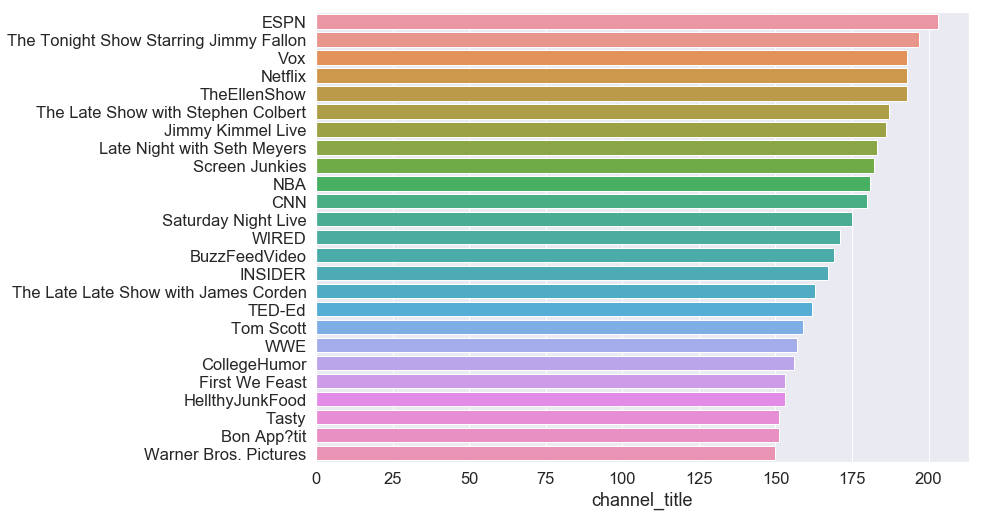

In [39]:
# top 25 channels for the highest number of videos

sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df.channel_title.value_counts()[:25]
_ = sns.barplot(y=tmp.index,x=tmp)

In [40]:
df_c= df.groupby('channel_title')['subscribe'].median().sort_values (ascending=False).head(25)
df_c


channel_title
PewDiePie           67012002.50
5-Minute Crafts     37501506.50
Dude Perfect        35518241.00
Ed Sheeran          34813732.00
WWE                 34778537.00
Katy Perry          31600328.00
Taylor Swift        31336004.00
TheEllenShow        28527031.00
TaylorSwiftVEVO     28061089.00
YouTube Spotlight   27144795.50
Ariana Grande`      26692179.00
KatyPerryVEVO       26652224.00
EminemVEVO          26623460.00
Smosh               23579690.00
Markiplier          22022397.00
nigahiga            21284716.00
Marshmello          20921090.00
marshmello          20919497.00
jacksepticeye       20555990.00
DanTDM              20427761.00
Ozuna               19981613.00
Selena Gomez        19850798.00
shakiraVEVO         19655158.00
ArianaGrandeVevo    19157021.00
WatchMojo.com       18945586.50
Name: subscribe, dtype: float64

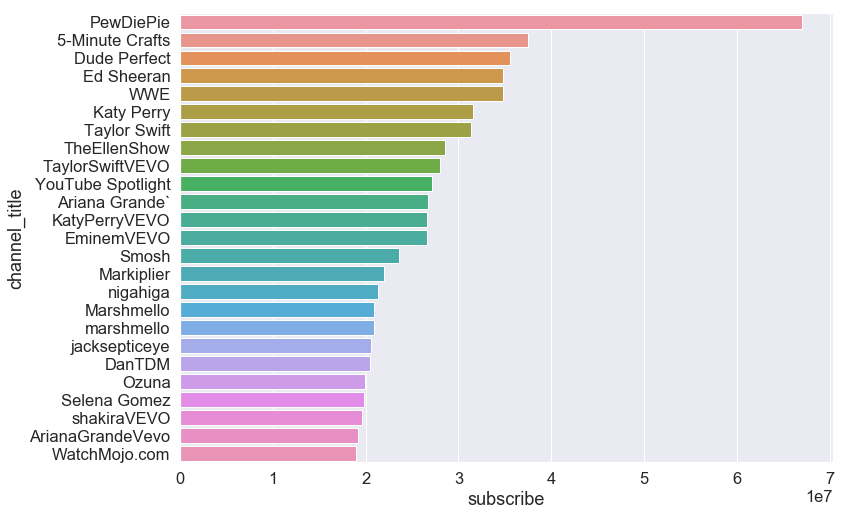

In [41]:
# top 20 channels for the highest number of subscribers

sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df_c[:25]
_ = sns.barplot(y=tmp.index,x=tmp)

First of all, I looked up for the top 20 channels which have the highest number of videos and subscribers. As you can see above, the two lists of the channels are different from each other. Most of the channels with lots of videos are for TV shows, broadcasts or organizations, like Tonight Show, Vox, The Ellen Show, and Netflix. On the other hand, those with lots of subscribers are music channels, like Ed Sheeran, Taylor Swift, Eminem, KatyPerry and Ariana Grande.

### What is the hottest topic on Youtube?
Let’s go deeper with topics this time. There are 16 types of topics and I counted the number of videos and channels for each topic. Which one is your favorite topic on Youtube? What are the hot and competitive topics?



Text(0.5, 1.0, 'The Number of trend videos in US per Topic')

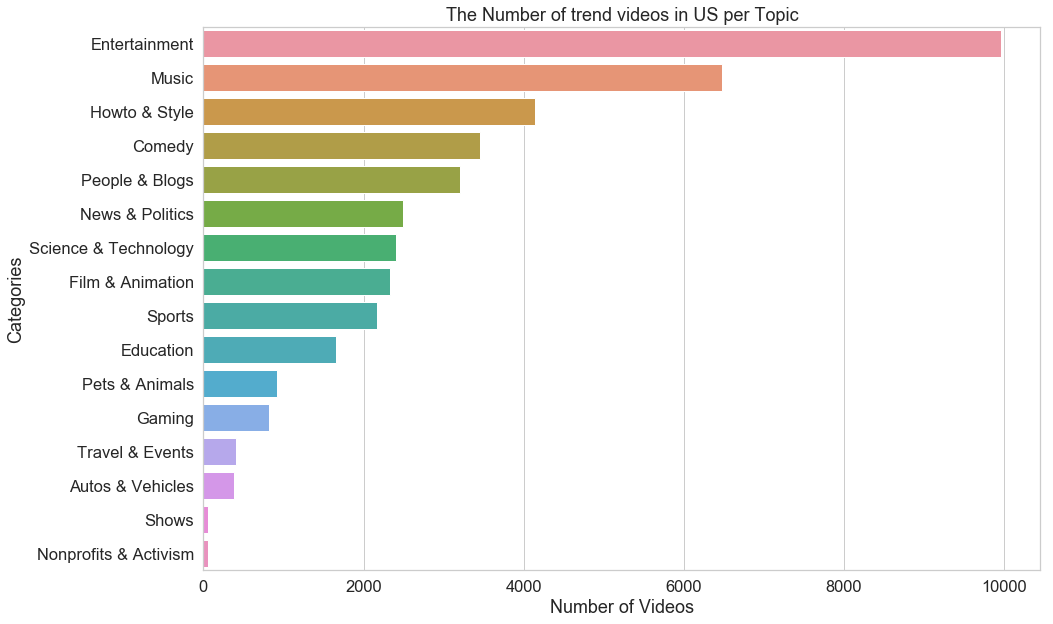

In [42]:
cat_df_us = df['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("The Number of trend videos in US per Topic")


In [43]:
df['category'].value_counts()

Entertainment            9956
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2332
Sports                   2172
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category, dtype: int64

In [44]:
df['category']

trending_date  video_id   
2017-11-14     2kyS6SvSYSE          People & Blogs
               1ZAPwfrtAFY           Entertainment
               5qpjK5DgCt4                  Comedy
               puqaWrEC7tY           Entertainment
               d380meD0W0M           Entertainment
               gHZ1Qz0KiKM    Science & Technology
               39idVpFF7NQ           Entertainment
               nc99ccSXST0    Science & Technology
               jr9QtXwC9vc        Film & Animation
               TUmyygCMMGA         News & Politics
               9wRQljFNDW8                  Sports
               VifQlJit6A0           Entertainment
               5E4ZBSInqUU                   Music
               GgVmn66oK_A         News & Politics
               TaTleo4cOs8          Pets & Animals
               kgaO45SyaO4    Science & Technology
               ZAQs-ctOqXQ                  Comedy
               YVfyYrEmzgM               Education
               eNSN6qet1kE    Science & Technology
    

In [45]:
# df[['category','channel_title']].groupby('category').count().reset_index()


#### The Number of Channels in US per Topic

In [46]:
 df[['channel_title','category']].groupby('category')['channel_title'].nunique().reset_index()

category  channel_title
0        Autos & Vehicles             58
1                  Comedy            146
2               Education             67
3           Entertainment            477
4        Film & Animation            140
5                  Gaming             65
6           Howto & Style            190
7                   Music            443
8         News & Politics            112
9   Nonprofits & Activism             13
10         People & Blogs            257
11         Pets & Animals             57
12   Science & Technology            166
13                  Shows              2
14                 Sports            131
15        Travel & Events             34

Text(0.5, 1.0, 'The Number of Channels in US per Topic')

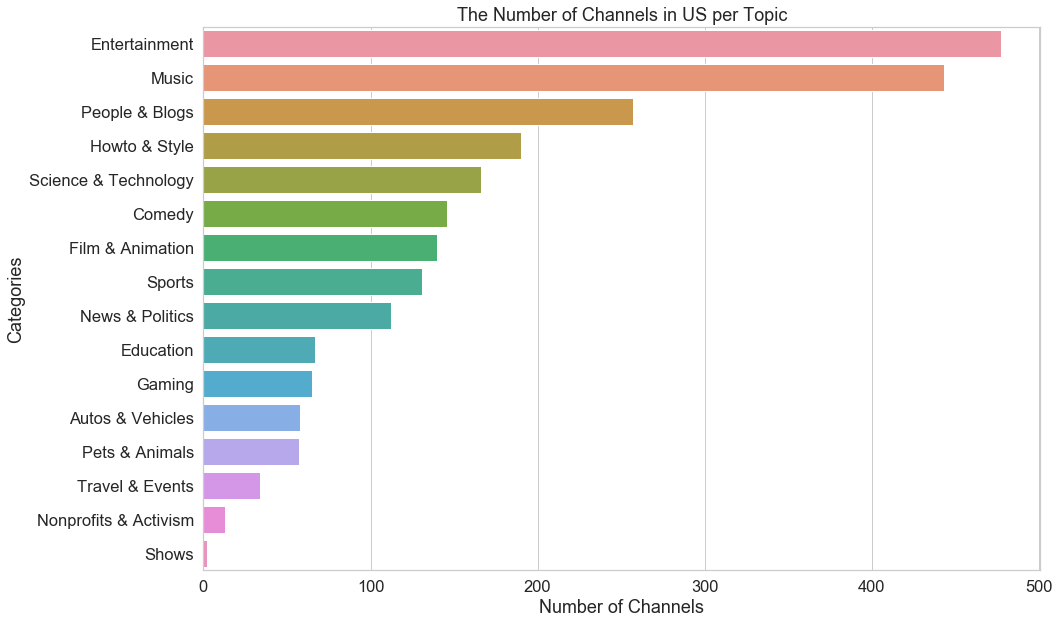

In [47]:
cat_df_us2 = df[['channel_title','category']].groupby('category')['channel_title'].nunique().reset_index().sort_values(by='channel_title', ascending=False)

plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us2['category'],x=cat_df_us2['channel_title'], data=cat_df_us2,orient='h')
plt.xlabel("Number of Channels")
plt.ylabel("Categories")
plt.title("The Number of Channels in US per Topic")

The distributions of the video and channel number show different patterns. Entertainment is at the top in both plots. Music, People & Blog, Howto & Style, and Science & Technology have a large number of channels. Can it be inferred that they are the most popular topics?

In [48]:
# Most Infuential Creators(channels)
# top 50 channel
df['channel_title'].value_counts().head(50)

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
Netflix                                   193
TheEllenShow                              193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
First We Feast                            153
HellthyJunkFood                   

In [49]:
df_2=df['category'].value_counts().reset_index()
df_2

index  category
0           Entertainment      9956
1                   Music      6472
2           Howto & Style      4146
3                  Comedy      3457
4          People & Blogs      3210
5         News & Politics      2487
6    Science & Technology      2401
7        Film & Animation      2332
8                  Sports      2172
9               Education      1656
10         Pets & Animals       920
11                 Gaming       817
12        Travel & Events       402
13       Autos & Vehicles       384
14                  Shows        57
15  Nonprofits & Activism        57

In [50]:
df_1=df[['channel_title','category']].groupby('category')['channel_title'].nunique().reset_index()
df_1.rename(columns={"category":"index"}, inplace = True)
df_1

index  channel_title
0        Autos & Vehicles             58
1                  Comedy            146
2               Education             67
3           Entertainment            477
4        Film & Animation            140
5                  Gaming             65
6           Howto & Style            190
7                   Music            443
8         News & Politics            112
9   Nonprofits & Activism             13
10         People & Blogs            257
11         Pets & Animals             57
12   Science & Technology            166
13                  Shows              2
14                 Sports            131
15        Travel & Events             34

In [51]:
df_3=pd.merge(df_1, df_2)
df_3

index  channel_title  category
0        Autos & Vehicles             58       384
1                  Comedy            146      3457
2               Education             67      1656
3           Entertainment            477      9956
4        Film & Animation            140      2332
5                  Gaming             65       817
6           Howto & Style            190      4146
7                   Music            443      6472
8         News & Politics            112      2487
9   Nonprofits & Activism             13        57
10         People & Blogs            257      3210
11         Pets & Animals             57       920
12   Science & Technology            166      2401
13                  Shows              2        57
14                 Sports            131      2172
15        Travel & Events             34       402

In [52]:
#df['category'].value_counts().reset_index().sort_values(by='index')['category']
#df[['channel_title','category']].groupby('category')['channel_title'].nunique().reset_index().sort_values(by='category')['channel_title']
#df['category'].value_counts().reset_index().sort_values(by='index')['category']/ df[['channel_title','category']].groupby('category')['channel_title'].nunique().reset_index().sort_values(by='category')['channel_title']


In [53]:
# 각 케테고리 마다 경쟁률 (1: X)
df_3['competition_rate']=df_3['category']/df_3['channel_title']
df_3=df_3.sort_values(by='competition_rate',ascending=False)
df_3

index  channel_title  category  competition_rate
13                  Shows              2        57             28.50
2               Education             67      1656             24.72
1                  Comedy            146      3457             23.68
8         News & Politics            112      2487             22.21
6           Howto & Style            190      4146             21.82
3           Entertainment            477      9956             20.87
4        Film & Animation            140      2332             16.66
14                 Sports            131      2172             16.58
11         Pets & Animals             57       920             16.14
7                   Music            443      6472             14.61
12   Science & Technology            166      2401             14.46
5                  Gaming             65       817             12.57
10         People & Blogs            257      3210             12.49
15        Travel & Events             34       402             11.82
0        Autos & Vehicles             58       384              6.62
9   Nonprofits & Activism             13        57              4.38

Text(0.5, 1.0, 'The competition_rate in US per Topic')

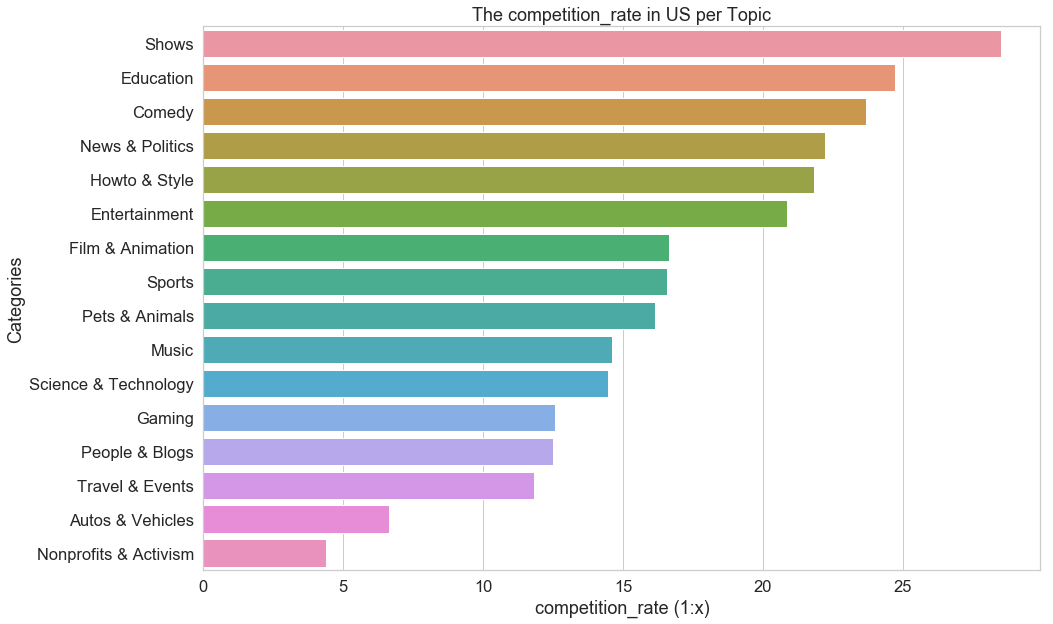

In [54]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=df_3['index'],x=df_3['competition_rate'], data=df_3,orient='h')
plt.xlabel("competition_rate (1:x)")
plt.ylabel("Categories")
plt.title("The competition_rate in US per Topic")

The plot with the number of videos and channels can tell you which topic has many competitors. The more channels a topic has, the more competitions there are in order to get an attention from people. On the other hand, the plots showing the number of videos or views can tell you which topic is the hottest. They can tell you what are the main interests of people.

신규 유튜버의 비디오가 트렌드 비디오에 올라기기 위해선 경쟁력이 낮은 토픽에 진입하는것을 추천한다.
뒤에서 어떤 요인이 트렌드 비디오를 만드는지 분석할것이다.

### count the median number of subscribe, views, likes, dislikes, and comments for each topic.

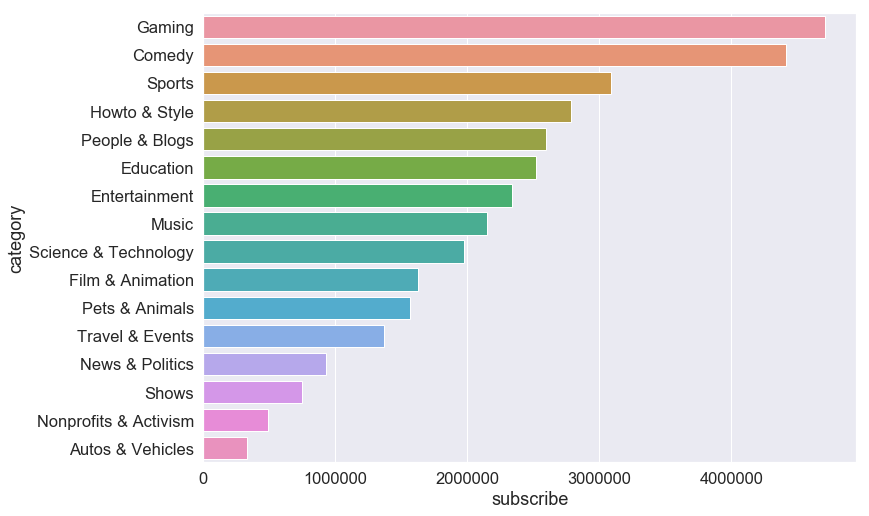

In [55]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df.groupby('category')['subscribe'].median().sort_values (ascending=False).head(25)
_ = sns.barplot(y=tmp.index,x=tmp)

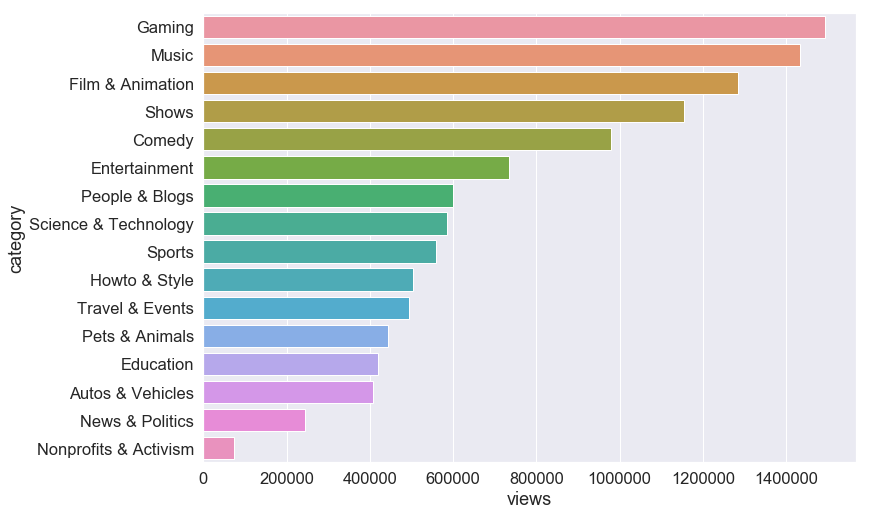

In [56]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df.groupby('category')['views'].median().sort_values (ascending=False).head(25)
_ = sns.barplot(y=tmp.index,x=tmp)

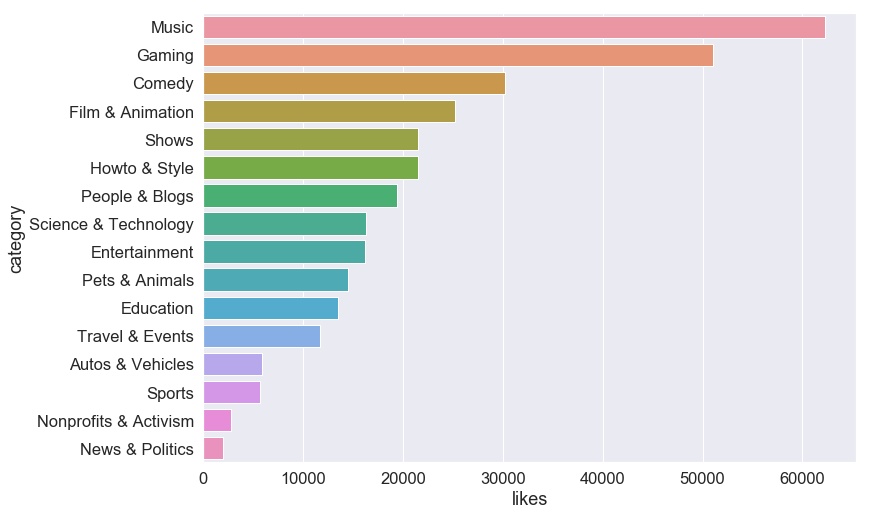

In [57]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df.groupby('category')['likes'].median().sort_values (ascending=False).head(25)
_ = sns.barplot(y=tmp.index,x=tmp)

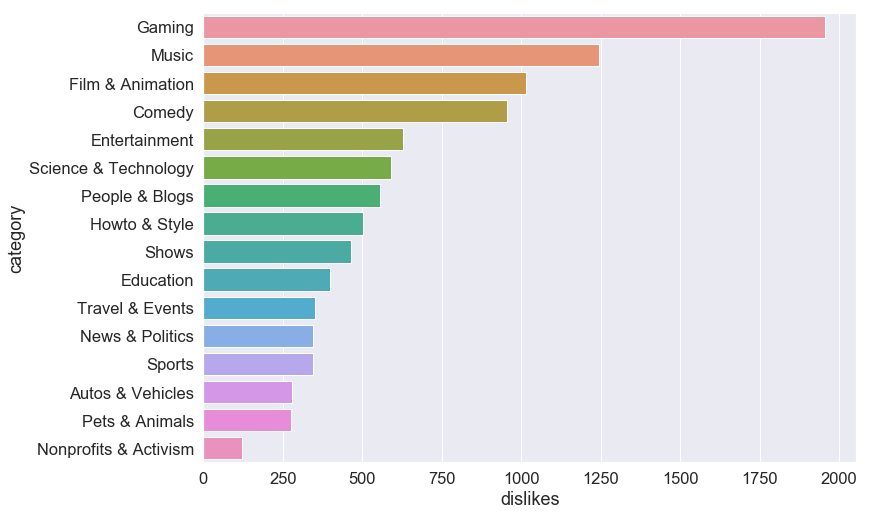

In [58]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df.groupby('category')['dislikes'].median().sort_values (ascending=False).head(25)
_ = sns.barplot(y=tmp.index,x=tmp)

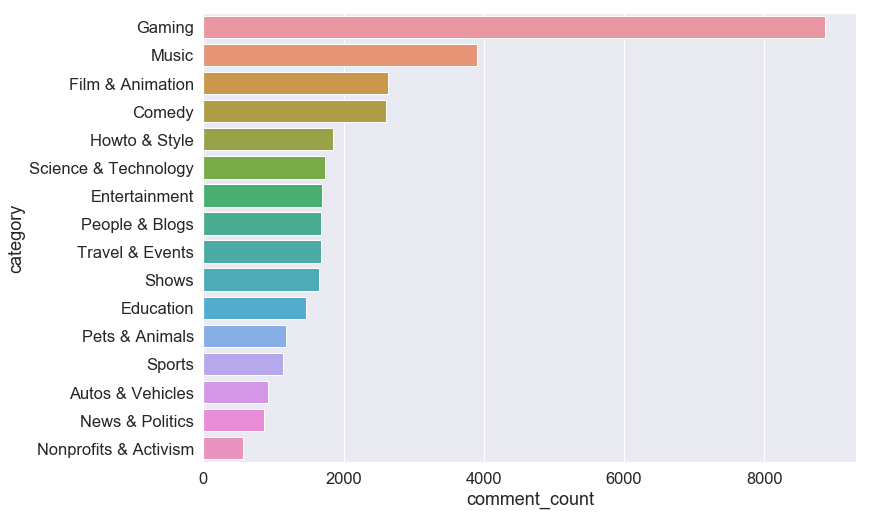

In [59]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
tmp = df.groupby('category')['comment_count'].median().sort_values (ascending=False).head(25)
_ = sns.barplot(y=tmp.index,x=tmp)

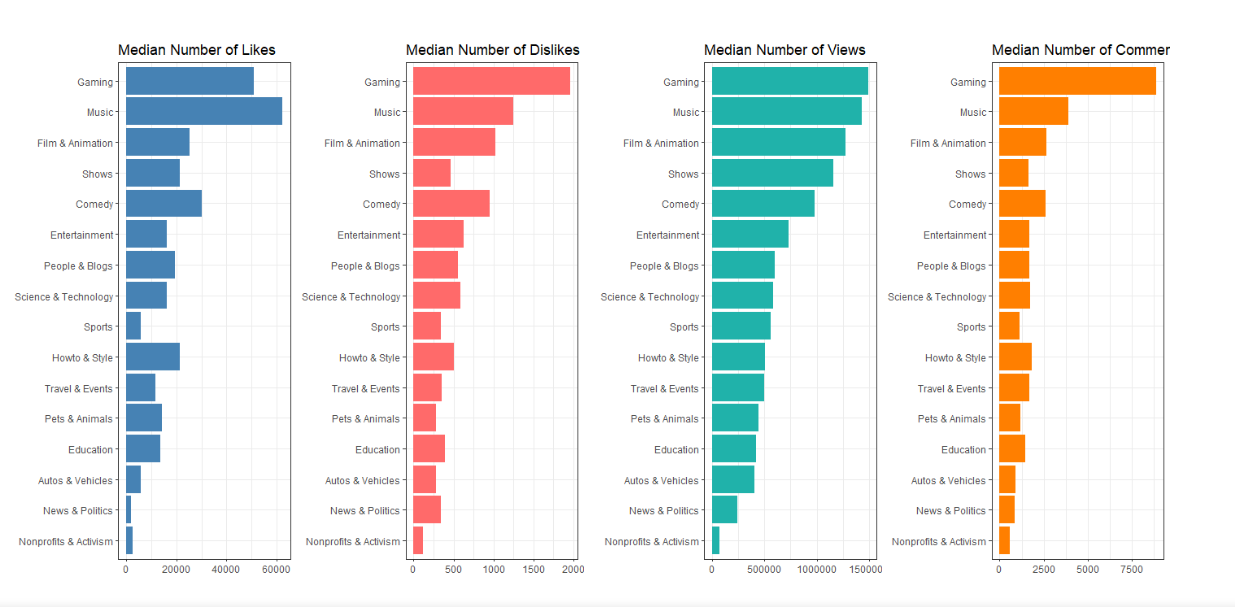

counted the median number of likes, dislikes, views, and comments for each topic. The order of topics on the y-axis is all same again, so you can easily compare the four counts. 

The plots of likes, dislikes and comments count show a similar distribution. Interestingly, Gaming is the hottest channel considering it has a relatively small number of channels and videos at the previous plot.

You can also find the response level of users with likes and dislikes, comment counts for each topic. For example, Entertainment or People & Blog are at the high rank for the number of videos and subscribers, but the response rate of them is lower than expected.

#### What about the time response?
The response rate can be also said in view of a time period. How long does it take to be a trending video? The subscribers for each topic will have different promptness and activeness so we can expect different patterns in time analysis.

In [60]:
df

channel_title    n  \
trending_date video_id                                                   
2017-11-14    2kyS6SvSYSE                            CaseyNeistat   95   
              1ZAPwfrtAFY                         LastWeekTonight   24   
              5qpjK5DgCt4                            Rudy Mancuso   74   
              puqaWrEC7tY                   Good Mythical Morning  147   
              d380meD0W0M                                nigahiga   89   
              gHZ1Qz0KiKM                                iJustine   99   
              39idVpFF7NQ                     Saturday Night Live  175   
              nc99ccSXST0                      CrazyRussianHacker  115   
              jr9QtXwC9vc                        20th Century Fox  135   
              TUmyygCMMGA                                     Vox  193   
              9wRQljFNDW8                                     NFL  123   
              VifQlJit6A0                                     amc   23   
              5E4ZBSInqUU                              marshmello   12   
              GgVmn66oK_A                           NowThis World    5   
              TaTleo4cOs8                         The king of DIY   12   
              kgaO45SyaO4                          BostonDynamics   55   
              ZAQs-ctOqXQ                                 Cracked   26   
              YVfyYrEmzgM                                  TED-Ed  162   
              eNSN6qet1kE                             PeterSripol    6   
              B5HORANmzHw                                 SciShow  135   
              vU14JY3x81A                             Life Noggin  148   
              6VhU_T463sU                                  Tested   20   
              _-aDHxoblr4                               Tom Scott  159   
              JBZTZZAcFTw                              Refinery29   96   
              lZ68j2J_GOM                             Gus Johnson   68   
              dRpNZV18N_g                         HellthyJunkFood  153   
              fcVjitaM3LY                             Numberphile   49   
              qeWvgZLz9yU                      JerryRigEverything   43   
              iIxy3JN3-jc    Cleveland Cavaliers on cleveland.com    6   
              n30k5CwLhS4                          FaeryInLoveInc    4   
...                                                           ...  ...   
2018-06-14    vDyYMcjf500                       DidYouKnowGaming?   20   
              3Q2j5ApzSqs                           CAguileraVEVO   50   
              GfxNGjfSKRY                           BBCRadio1VEVO   46   
              amtC28yfYCM  The Tonight Show Starring Jimmy Fallon  197   
              9NC2saE5MbQ                        camelsandfriends   21   
              XdNOI-q70q4                             Matt Stonie   81   
              QgOXIEhHU1Y                                   Diplo   54   
              SQsPvrev_bQ                      Tyler, The Creator   22   
              _1LdMWlNYS4                                PBS Eons   54   
              AFbu21AGSho                            Nat Geo WILD   22   
              hHaUQh6Gx-Q                             MustardVEVO   20   
              wI89nVn6LHk                           American Idol   87   
              oLDbO545aKQ                            Rudy Mancuso   74   
              tiF9SzzzX_o                               The Voice  121   
              Gs26bZTRkdU                                 SciShow  135   
              Qcj15vHJTtk                     Saturday Night Live  175   
              2in8XqiElwc                        NickiMinajAtVEVO   40   
              Xr2rgT9uEnA                              miniminter   25   
              v7H_Or9Nr5I                        Lucas the Spider   72   
              n_W54baizX8                            Daddy Yankee   25   
              pcJo0tIWybY                                 SZAVEVO   41   
              _QWZvU7VCn8                  The Graham No

In [61]:
import plotly.offline as py 
import plotly.figure_factory as ff 
import plotly.graph_objs as go 
from plotly import tools 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 
py.init_notebook_mode(connected= True)


data1= []
for i in df["category"].unique():
    data1.append(go.Box(y = df[(df["category"]==i)&(df["days_to_trending"]<20)]["days_to_trending"], name = i)) # 조건 2개
    
layout = go.Layout(title = 'Days To Be Trending', 
                   xaxis = dict(title = 'topic'), 
                   yaxis = dict(title = 'days'))
fig = dict(data = data1, layout = layout)
py.iplot(fig)

In [62]:
data2= []
for i in df["category"].unique():
    data2.append(go.Box(y = df[(df["category"]==i)&(df["days_to_trending"]<2)]["subscribe"], name = i)) # 조건 2개
    
layout = go.Layout(title = 'the subscriber numbers of trendy videos by topic (be trendy within a day)', 
                   xaxis = dict(title = 'topic'), 
                   yaxis = dict(title = 'number of subscribe'))
fig = dict(data = data2, layout = layout)
py.iplot(fig)

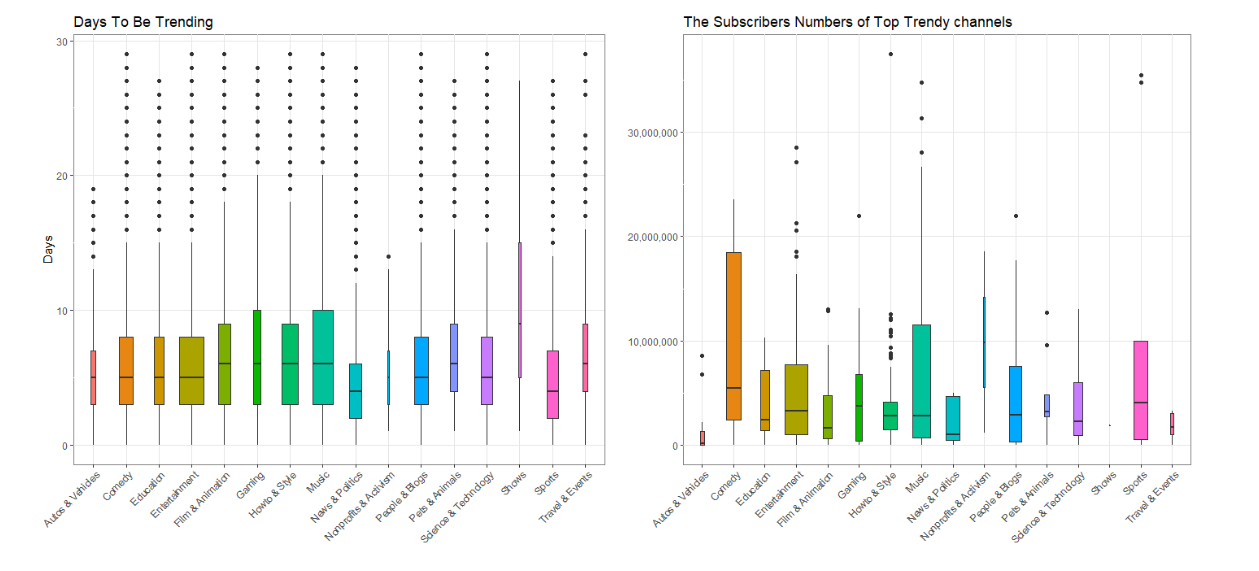


The plot on the left shows the number of days needs to be trendy for each topic. Most topics have similar distribution but News & Politics and Sports have the shortest whereas shows has the largest range of the period. The plot on the right shows the subscriber number of videos which get trendy in a day. We can easily expect that it will require lots of subscribers to be trendy in a day, however, it comes out with a broad range of the values. This could be inferred that subscriber numbers are not an absolute factor for the views.

The size of the boxes here indicates the size of the data. Therefore the Shows whose videos got attention in the day are few in our data, whereas trendy Entertainment or Music videos are a lot. This can be perceived more easily with the bar plot below. The video numbers being trendy in a day are shown and this is exactly the same with what the size of the box is telling us.



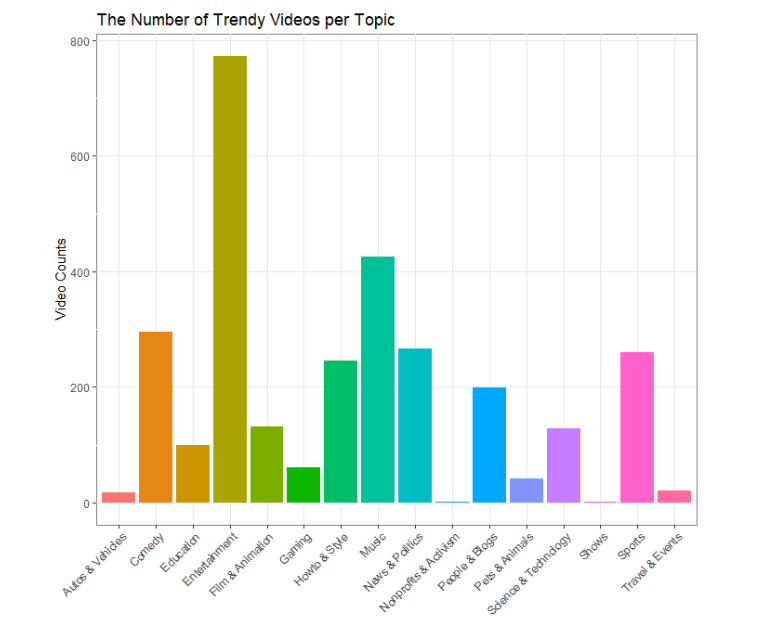

As a conclusion, the reaction rate of videos is different among topics. We can say that people who enjoy watching Gaming show their opinion and response actively. Videos conveying up-to-date news like News & Politics and Sports have a short period of time. Entertainment and Music keep appearing at the top of the list so far. But remember. Lots of popularity, lots of competitors.

### What title is suggested to get an attention?
There is a limitation in our perception when we give a glimpse to text. So the length of the title and the number of words in titles are important factors for eye-catching. Does the title length have an effect on the views? How many words are adequate to be contained in titles? Let’s check the answers from below.

In [63]:
# word = "공백을 제외한 " \
#        "글자수만을 세는 코드 테스트"

# print(len([i for i in word if i != ' ']))

In [64]:
data = []
for i in range(len(df['title'])):
    print(len(df['title'][i]))
    a = len(df['title'][i])
    data.append(a)

34
62
53
32
24
21
41
35
65
53
86
78
42
38
24
16
48
52
26
40
32
50
50
67
28
38
36
47
100
23
60
43
42
31
54
20
46
57
33
50
17
65
51
75
75
48
65
50
54
55
85
58
57
60
72
71
48
98
27
29
40
94
38
34
58
53
45
39
68
45
43
54
56
74
51
61
64
66
45
76
33
33
80
98
26
42
83
76
48
39
30
47
33
32
55
48
50
59
45
44
39
57
54
55
55
42
55
38
34
33
40
29
17
33
73
54
43
40
56
70
44
66
38
41
13
48
42
45
34
46
41
36
43
87
67
36
32
48
27
16
32
38
41
35
38
31
53
77
61
19
21
37
65
68
43
36
46
43
70
45
38
77
43
44
84
22
46
32
78
23
46
24
37
89
58
35
38
28
29
48
39
60
46
35
84
74
55
43
35
38
52
43
18
93
88
62
93
51
45
48
54
36
44
43
21
57
46
27
34
16
32
67
63
31
56
79
65
34
48
49
63
62
38
21
72
65
37
40
89
36
51
32
52
25
42
34
66
32
53
50
100
46
53
28
72
50
52
24
34
94
42
78
17
85
84
35
53
49
48
100
41
66
50
26
41
60
99
51
59
57
24
38
66
55
72
54
48
36
54
40
50
67
41
47
95
45
33
98
31
54
43
58
38
35
68
42
37
21
42
58
100
33
27
20
23
75
48
41
41
39
60
85
50
99
55
57
58
53
52
72
48
29
38
34
40
45
53
39
98
45
76
51


32
28
62
47
68
39
32
54
32
90
57
37
64
65
53
47
31
31
46
95
35
23
66
32
11
29
56
88
32
18
26
51
54
72
26
45
45
53
22
48
52
79
35
39
24
91
22
90
51
49
48
23
45
99
68
29
43
48
54
47
51
58
47
54
36
61
44
21
34
30
83
57
37
31
71
22
50
30
46
54
65
39
12
52
36
64
80
25
58
69
57
21
74
59
30
31
78
42
74
33
50
17
49
63
74
56
38
73
36
76
30
61
55
47
40
48
21
27
56
66
27
67
58
85
47
41
79
21
46
32
61
74
59
55
56
59
80
61
86
37
50
88
48
21
42
71
77
15
26
35
34
47
43
38
91
49
25
65
40
46
50
49
36
33
27
27
27
22
35
26
54
27
34
77
98
80
26
59
95
40
72
73
59
49
63
50
59
31
66
33
53
49
41
18
24
53
50
56
144
81
67
57
55
31
66
43
99
89
69
74
61
34
43
56
89
16
44
45
28
71
43
78
6
77
47
26
32
64
25
55
30
47
38
44
50
42
49
18
54
41
53
66
51
26
72
79
45
58
52
71
64
48
50
51
52
66
22
38
45
68
22
26
62
45
45
91
51
67
35
44
38
34
77
24
52
38
23
98
54
90
49
47
80
99
71
73
29
39
72
99
58
30
51
48
72
80
47
12
54
66
46
21
44
30
61
37
30
31
69
62
50
57
30
65
36
36
52
45
39
54
22
64
49
17
59
47
63
25
38
57
21
51
33
8

93
32
21
42
45
34
46
50
72
39
14
43
49
37
19
61
47
55
37
63
71
26
74
34
71
31
74
43
46
72
59
69
91
39
59
34
28
52
54
39
87
47
60
59
35
27
63
51
43
37
28
48
62
45
48
27
67
62
50
58
60
26
17
87
69
16
47
43
42
17
53
27
39
60
90
73
29
29
64
54
68
34
29
51
47
39
48
29
55
80
51
17
48
27
40
42
46
65
78
52
49
86
50
70
40
55
41
72
86
24
70
55
27
71
64
22
59
21
99
47
63
62
81
66
32
80
37
31
30
31
63
50
30
48
28
9
35
44
31
61
62
30
34
22
83
45
32
47
54
69
45
59
35
27
30
34
38
40
48
52
46
43
50
90
96
22
39
57
65
26
24
70
42
85
60
51
60
33
33
69
48
55
62
54
33
32
50
70
36
27
44
49
87
28
62
51
43
52
59
39
61
78
46
43
64
48
37
15
56
26
19
50
63
14
28
14
53
65
37
64
24
93
69
56
42
78
42
51
63
43
42
40
74
68
31
34
50
81
46
51
52
51
57
59
39
60
59
55
32
39
28
49
34
87
33
59
67
41
60
47
37
65
42
72
43
51
69
60
58
27
62
39
28
50
69
48
45
37
62
90
27
63
17
67
42
68
52
99
58
44
37
34
42
70
47
87
50
16
60
60
55
40
53
86
34
17
65
60
43
29
77
58
66
71
73
67
68
33
27
47
80
29
39
64
29
17
48
78
73
14
52
40
50
70

96
50
59
75
86
37
50
24
46
50
86
21
82
50
48
28
94
100
70
94
48
36
79
88
30
22
125
100
96
42
29
28
51
70
21
54
73
26
31
27
65
42
48
92
30
50
57
32
41
55
38
32
36
19
34
63
58
21
18
51
33
52
49
76
41
53
88
22
94
40
25
46
42
75
45
74
61
30
72
38
43
67
17
51
59
43
95
78
63
27
44
37
23
31
74
65
31
37
35
46
21
95
54
66
26
79
36
39
58
69
47
68
18
28
68
67
24
44
67
61
42
67
55
49
24
12
21
77
41
47
28
75
49
71
42
71
40
69
56
90
42
59
51
50
55
29
60
17
26
49
22
51
68
25
17
49
75
23
53
20
71
54
67
18
64
60
64
40
34
54
19
52
33
40
66
49
44
43
134
27
38
43
43
36
63
45
47
95
32
160
53
56
39
48
69
37
54
35
24
62
32
48
47
85
36
45
45
27
43
39
59
24
49
99
32
32
41
50
27
96
36
50
59
24
75
86
50
75
37
48
46
50
21
82
52
22
21
28
31
86
94
70
100
55
48
36
88
79
94
30
22
125
96
42
29
100
28
51
21
54
73
26
31
27
65
42
48
92
30
50
57
32
41
55
38
32
36
19
34
63
58
21
18
51
52
49
76
53
41
88
22
94
46
25
42
75
74
72
30
38
43
67
17
51
59
95
43
78
63
27
44
37
23
31
74
65
31
35
37
46
21
95
54
26
66
79
36
39
58
69
47

93
71
39
57
33
62
30
29
25
43
64
19
61
38
60
22
31
58
35
39
39
33
34
23
46
40
41
51
39
49
57
25
54
38
44
54
69
38
67
14
25
38
21
49
56
23
42
37
36
50
23
75
65
90
30
54
47
43
27
24
47
90
54
56
35
36
42
51
48
23
42
23
42
30
34
40
23
19
48
64
39
23
54
56
33
19
59
48
43
60
76
62
16
25
68
53
89
39
26
77
92
17
42
21
29
34
25
27
47
35
55
57
72
30
85
50
71
59
49
42
72
56
85
72
34
34
46
22
48
23
41
21
38
27
27
53
27
15
60
30
30
42
58
27
54
46
56
64
43
62
35
59
33
46
50
44
18
34
71
68
57
50
76
78
91
69
76
33
13
36
62
44
25
72
80
56
81
77
49
63
29
62
18
53
25
47
47
91
86
42
50
40
79
42
77
34
47
32
65
36
33
103
54
34
75
58
53
37
21
34
59
40
56
45
74
34
62
20
45
41
53
67
58
57
39
43
84
24
65
68
41
44
73
30
56
69
75
93
13
25
64
25
58
32
51
61
72
93
61
46
39
71
14
33
62
30
77
43
29
64
61
19
60
38
22
31
58
48
39
35
44
45
33
41
38
34
46
39
49
51
49
39
57
25
38
69
54
67
44
54
14
49
82
21
38
38
56
25
42
23
37
50
23
65
75
36
47
30
90
27
72
90
43
24
35
47
56
54
36
42
51
23
48
64
42
42
34
40
23
19
48
39
23


54
51
44
88
15
57
46
34
65
26
41
71
49
63
72
50
55
40
35
23
40
40
91
68
28
54
45
45
59
24
39
72
28
68
97
42
39
21
43
42
51
89
49
74
66
92
21
100
34
61
49
56
87
55
27
39
47
33
38
36
78
63
35
48
53
45
44
29
30
42
24
61
32
39
97
55
71
99
48
74
79
88
43
13
78
51
97
43
49
28
23
58
16
80
64
76
59
19
22
32
63
43
29
64
28
57
63
38
69
84
43
47
43
65
65
56
36
39
60
95
78
48
39
95
43
98
68
32
32
43
41
41
46
38
58
71
62
54
59
45
59
47
52
57
46
39
49
55
75
38
66
99
68
40
77
94
46
54
36
72
59
30
56
63
81
28
36
56
35
60
73
51
22
43
41
42
23
14
48
52
33
67
38
28
50
34
44
70
28
51
43
34
58
96
54
18
31
47
90
39
93
69
51
53
57
51
36
51
26
15
44
54
88
41
34
57
48
71
46
65
29
29
49
23
63
40
55
72
50
35
46
87
51
40
40
43
68
59
28
45
72
97
54
91
24
39
28
45
42
71
68
44
57
39
188
42
63
27
49
42
99
61
21
39
74
89
49
97
35
100
39
92
66
34
50
47
56
36
55
33
88
38
23
29
78
35
48
53
64
17
45
63
30
32
24
61
55
58
67
74
48
71
43
79
13
78
84
57
97
51
64
80
23
38
16
49
28
43
28
43
22
43
65
29
19
59
63
43
65
76
47
36
5

66
86
92
29
52
51
63
58
56
35
36
70
83
35
69
65
95
44
57
39
39
22
47
36
24
31
44
46
29
55
42
57
65
53
60
74
68
49
55
42
52
49
32
54
38
55
36
32
44
55
80
39
80
67
50
4
39
12
47
49
79
62
81
88
100
44
45
91
78
47
40
58
30
27
14
25
84
53
93
96
63
40
49
52
49
64
33
50
26
40
28
28
49
51
46
41
33
68
45
72
41
40
39
62
56
86
59
58
46
68
41
46
37
67
52
30
36
51
86
55
34
58
50
31
51
4
36
48
26
56
20
45
75
25
59
32
49
95
22
33
76
70
75
74
18
75
43
45
65
35
75
61
26
76
48
39
71
66
58
52
25
61
38
48
90
33
51
56
23
51
53
20
71
59
29
48
67
83
63
84
82
39
21
34
32
35
82
47
51
45
76
87
29
73
65
36
51
68
17
30
66
48
27
47
88
58
41
45
67
96
12
51
20
84
40
69
53
71
45
30
54
70
38
72
68
59
94
40
33
66
29
86
54
92
63
51
58
56
36
35
70
83
35
46
65
95
44
39
83
57
39
22
47
24
31
44
46
29
36
55
42
57
60
53
74
68
49
55
42
49
32
38
55
32
36
54
55
44
80
39
80
50
67
4
12
39
47
79
49
62
88
81
100
44
45
40
58
91
78
47
30
27
14
25
84
40
53
93
63
96
49
64
33
50
26
40
28
28
72
49
51
33
41
51
59
50
67
55
37
11
56
43
54
46

45
61
31
22
64
34
31
45
39
24
42
34
68
71
84
18
29
36
84
37
45
38
57
62
41
71
47
63
58
52
53
30
74
71
58
39
22
62
39
58
36
41
89
36
37
36
30
41
60
38
32
68
86
52
20
26
46
41
51
70
49
40
34
47
28
23
15
45
46
49
55
46
64
39
80
60
37
60
20
24
80
36
30
73
78
22
40
62
32
18
17
43
54
43
31
45
75
51
46
87
29
49
40
56
43
71
58
33
34
42
39
62
26
70
30
39
76
97
49
65
22
20
44
35
20
49
153
65
63
30
87
44
42
60
59
39
33
57
42
39
42
50
24
27
27
49
40
19
91
35
61
37
67
62
54
30
34
8
32
74
41
83
39
53
68
85
39
45
52
23
77
37
38
13
23
60
54
46
40
36
47
51
20
27
52
26
83
31
7
79
98
55
29
19
26
24
47
45
29
19
38
22
56
61
44
45
35
31
31
64
34
16
45
39
78
24
34
42
38
59
68
87
71
84
94
36
29
18
28
84
35
45
41
37
57
38
62
71
47
58
63
53
52
30
74
71
27
72
58
39
62
22
36
41
58
39
36
30
41
85
37
37
68
32
56
86
20
41
46
46
51
52
41
70
26
40
82
34
47
28
23
15
45
49
64
55
46
39
80
60
60
37
20
24
80
36
48
30
42
22
73
78
40
62
32
18
17
43
43
75
45
51
46
40
87
49
29
56
71
58
34
42
39
62
26
70
30
39
76
97
49
22
44
20

93
50
51
86
95
34
32
61
99
49
44
47
46
90
44
80
63
44
32
47
18
31
74
52
46
81
25
22
31
19
35
93
23
8
24
55
42
35
38
66
77
49
77
37
50
56
35
69
79
53
52
60
76
43
31
25
46
36
43
30
43
93
57
29
65
44
96
45
41
46
47
35
39
36
77
60
31
48
41
28
42
34
40
42
25
72
38
75
62
42
21
52
53
22
70
60
36
27
63
30
62
76
13
50
81
39
46
52
36
24
28
44
65
56
65
52
41
15
78
42
82
23
46
33
56
69
39
73
49
15
19
98
40
25
45
48
27
32
58
43
71
55
18
59
43
60
93
46
21
40
43
53
60
44
91
27
29
69
50
47
44
60
36
91
39
86
30
34
43
48
37
71
91
41
38
42
34
60
42
39
53
19
41
41
64
45
42
57
24
19
46
90
58
27
57
46
35
49
26
36
53
58
32
48
77
28
49
24
57
45
55
36
55
93
50
86
51
95
34
61
32
99
47
49
46
90
44
80
63
44
32
47
18
31
74
52
46
81
25
22
31
19
35
93
23
8
24
55
42
35
38
66
49
37
77
59
25
62
46
70
37
36
33
43
18
30
58
45
43
96
29
93
26
57
92
65
44
38
45
53
41
46
47
35
39
31
51
55
36
77
60
41
48
37
28
72
34
42
40
42
46
38
75
62
42
21
22
70
27
60
63
36
30
62
76
50
39
46
52
81
13
36
28
44
65
56
24
65
41
52
42
78
15
46


35
41
40
35
24
36
42
37
26
42
75
83
53
65
15
20
41
51
44
54
90
54
49
38
39
12
34
23
54
37
82
64
91
28
14
34
29
47
13
66
28
91
32
67
33
77
49
34
96
81
46
49
51
74
91
45
44
44
49
10
43
19
54
35
47
35
61
25
42
30
22
48
48
42
89
58
46
28
97
13
59
36
30
43
33
34
41
35
31
72
62
62
37
56
26
44
42
27
97
34
64
34
93
100
70
30
59
23
52
88
58
26
20
55
53
71
43
19
35
9
26
58
23
31
48
22
52
41
32
96
21
70
57
59
61
57
41
65
48
59
41
30
71
48
51
80
35
69
64
74
38
84
96
34
44
60
54
90
51
38
64
52
38
77
62
76
23
94
18
39
24
49
48
81
41
41
57
26
109
89
84
37
97
34
32
32
36
81
53
24
34
59
31
52
56
29
31
33
31
36
56
75
33
56
29
55
41
50
14
38
25
48
46
60
70
64
35
29
62
35
40
24
36
42
37
75
42
83
53
65
15
41
35
20
44
51
54
90
49
38
12
34
39
54
23
83
37
82
64
91
28
14
34
29
44
47
13
56
28
66
32
67
33
77
49
34
96
81
49
51
74
44
44
49
10
43
19
54
35
47
35
61
25
42
30
22
48
42
89
46
58
28
97
13
59
36
43
30
41
35
72
62
56
26
44
27
97
34
44
34
93
100
70
30
59
52
23
88
58
26
20
55
53
71
43
19
35
9
26
58
23
31
48


53
76
29
19
24
64
93
23
51
53
10
19
45
57
77
56
43
37
19
35
42
52
36
100
53
66
29
56
73
19
56
23
67
67
41
44
29
42
36
51
56
31
76
29
57
39
76
44
24
44
43
52
43
34
35
34
26
22
50
51
45
42
50
18
44
40
43
34
90
36
22
67
50
73
68
31
18
59
10
51
92
95
61
78
63
44
61
41
50
53
79
49
58
63
21
39
23
24
61
42
34
44
70
84
46
80
39
51
31
55
46
50
92
43
91
41
88
44
19
32
29
44
17
52
28
57
41
93
77
70
13
105
61
45
72
36
59
36
44
42
53
77
60
21
34
39
45
26
48
55
41
83
34
52
32
58
54
33
49
38
67
37
49
31
80
44
44
57
41
45
51
44
52
53
33
54
29
40
59
30
34
61
22
40
61
55
47
30
82
31
23
73
33
59
27
12
54
99
17
13
51
49
37
39
49
66
28
89
21
41
68
60
43
43
53
29
19
24
64
23
93
51
53
10
19
45
77
56
43
37
35
42
36
52
100
53
66
42
24
52
55
98
59
33
58
47
28
94
13
105
73
36
59
36
44
42
77
60
21
45
26
48
55
41
61
83
52
32
33
54
33
49
37
59
37
49
80
44
57
41
29
44
58
75
48
41
75
54
29
40
44
59
47
92
61
30
58
41
34
61
22
40
63
51
55
47
30
82
31
23
33
51
72
59
27
12
54
99
17
13
49
39
49
66
89
21
41
68
16
60
43
37


31
31
40
36
25
53
50
27
74
88
60
59
34
49
87
41
47
32
49
25
55
81
20
39
85
30
56
48
99
44
46
41
28
49
43
85
20
71
62
39
29
32
66
72
35
38
60
59
47
33
51
54
3
41
25
83
68
33
43
73
49
30
29
97
72
69
53
19
33
37
34
69
42
42
26
31
33
46
90
96
73
36
46
47
38
39
37
28
52
26
84
64
55
61
25
35
47
59
17
52
76
45
58
52
37
42
78
62
61
52
140
87
26
59
40
42
53
36
98
69
51
109
55
49
51
42
76
58
35
40
43
24
22
53
45
43
36
44
18
60
59
90
50
61
63
70
21
70
80
61
42
41
51
44
56
56
14
35
77
36
63
37
48
30
86
100
26
57
24
33
54
37
29
28
63
22
61
27
64
44
43
65
55
59
69
70
25
47
22
83
37
98
51
64
75
15
51
28
29
35
35
47
86
34
80
42
38
46
49
92
31
31
36
25
53
50
27
74
88
60
59
34
49
87
41
47
32
49
25
55
81
20
39
85
30
56
99
48
44
46
41
28
49
43
85
20
71
62
39
29
32
66
35
72
38
60
59
47
33
51
54
3
41
83
25
68
33
43
73
30
49
29
97
72
69
19
33
37
34
69
42
42
26
31
33
46
96
36
46
47
39
37
28
52
26
84
64
61
25
35
47
59
17
52
76
45
58
52
37
42
78
62
61
52
140
87
26
59
43
40
42
53
36
69
51
109
55
49
51
42
76
35
4

In [65]:
df['len_title']=data


In [66]:
data_n = []
data_w = []
for i in range(len(df['title'])): #한 row씩
        
        a = df['title'][i].split() #한행씩 단어를 담는다.
        data_n.append(a)
        
        b=sum(not word.isdigit() for word in df['title'][i].split())#한행씩 단어의 개수를 담는다
        
        data_w.append(b)
        

In [67]:
df['nword_title']= data_w
df['len_title']=df['len_title']-df['nword_title']+1 # 전체 길이에서 단어간 공백 제거하여 진짜 글자수만 뽑는다
df

channel_title    n  \
trending_date video_id                                                   
2017-11-14    2kyS6SvSYSE                            CaseyNeistat   95   
              1ZAPwfrtAFY                         LastWeekTonight   24   
              5qpjK5DgCt4                            Rudy Mancuso   74   
              puqaWrEC7tY                   Good Mythical Morning  147   
              d380meD0W0M                                nigahiga   89   
              gHZ1Qz0KiKM                                iJustine   99   
              39idVpFF7NQ                     Saturday Night Live  175   
              nc99ccSXST0                      CrazyRussianHacker  115   
              jr9QtXwC9vc                        20th Century Fox  135   
              TUmyygCMMGA                                     Vox  193   
              9wRQljFNDW8                                     NFL  123   
              VifQlJit6A0                                     amc   23   
              5E4ZBSInqUU                              marshmello   12   
              GgVmn66oK_A                           NowThis World    5   
              TaTleo4cOs8                         The king of DIY   12   
              kgaO45SyaO4                          BostonDynamics   55   
              ZAQs-ctOqXQ                                 Cracked   26   
              YVfyYrEmzgM                                  TED-Ed  162   
              eNSN6qet1kE                             PeterSripol    6   
              B5HORANmzHw                                 SciShow  135   
              vU14JY3x81A                             Life Noggin  148   
              6VhU_T463sU                                  Tested   20   
              _-aDHxoblr4                               Tom Scott  159   
              JBZTZZAcFTw                              Refinery29   96   
              lZ68j2J_GOM                             Gus Johnson   68   
              dRpNZV18N_g                         HellthyJunkFood  153   
              fcVjitaM3LY                             Numberphile   49   
              qeWvgZLz9yU                      JerryRigEverything   43   
              iIxy3JN3-jc    Cleveland Cavaliers on cleveland.com    6   
              n30k5CwLhS4                          FaeryInLoveInc    4   
...                                                           ...  ...   
2018-06-14    vDyYMcjf500                       DidYouKnowGaming?   20   
              3Q2j5ApzSqs                           CAguileraVEVO   50   
              GfxNGjfSKRY                           BBCRadio1VEVO   46   
              amtC28yfYCM  The Tonight Show Starring Jimmy Fallon  197   
              9NC2saE5MbQ                        camelsandfriends   21   
              XdNOI-q70q4                             Matt Stonie   81   
              QgOXIEhHU1Y                                   Diplo   54   
              SQsPvrev_bQ                      Tyler, The Creator   22   
              _1LdMWlNYS4                                PBS Eons   54   
              AFbu21AGSho                            Nat Geo WILD   22   
              hHaUQh6Gx-Q                             MustardVEVO   20   
              wI89nVn6LHk                           American Idol   87   
              oLDbO545aKQ                            Rudy Mancuso   74   
              tiF9SzzzX_o                               The Voice  121   
              Gs26bZTRkdU                                 SciShow  135   
              Qcj15vHJTtk                     Saturday Night Live  175   
              2in8XqiElwc                        NickiMinajAtVEVO   40   
              Xr2rgT9uEnA                              miniminter   25   
              v7H_Or9Nr5I                        Lucas the Spider   72   
              n_W54baizX8                            Daddy Yankee   25   
              pcJo0tIWybY                                 SZAVEVO   41   
              _QWZvU7VCn8                  The Graham No

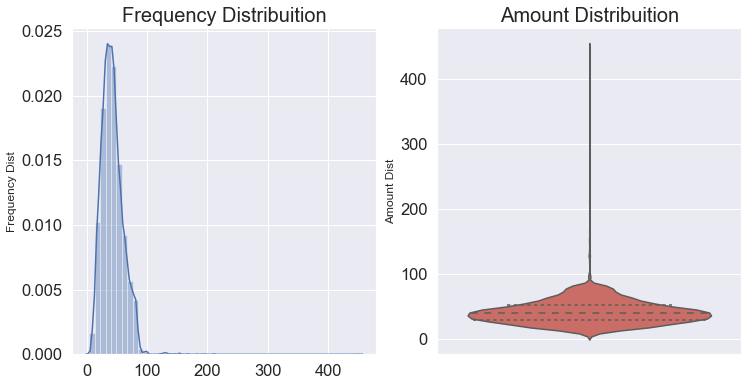

In [68]:
# title length

plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df["len_title"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="len_title", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

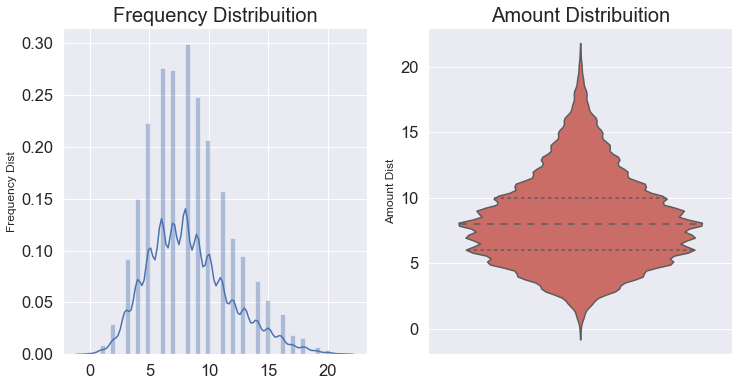

In [69]:
# title word count

plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(df["nword_title"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="nword_title", data=df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

<Figure size 2160x1440 with 0 Axes>

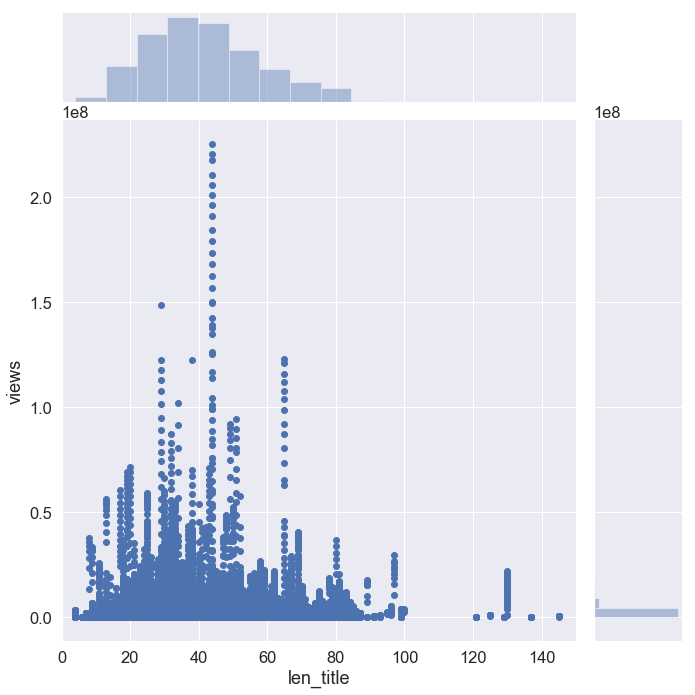

In [70]:
# title length 와 views 관계

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 20))
sns.jointplot(x = df.len_title, y = df.views, data = df, kind = 'scatter', height = 10, xlim=(0,150))
plt.show()

<Figure size 2160x1440 with 0 Axes>

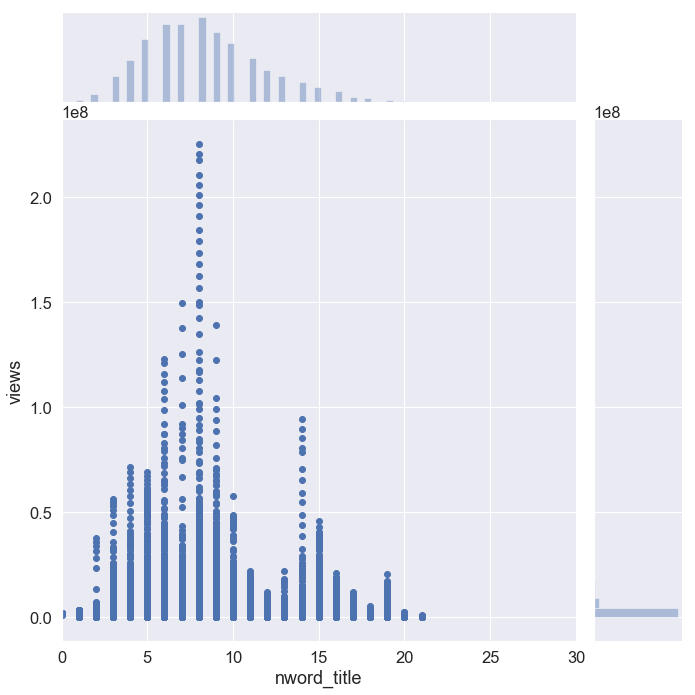

In [71]:
# word count of the title 와 views 관계

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 20))
sns.jointplot(x = df.nword_title, y = df.views, data = df, kind = 'scatter', height = 10, xlim=(0,30))
plt.show()

The titles of the videos have less than 100 characters and the views get the highest around 30 and 50 characters. If we say a single word commonly has 5 or 6 characters, this means 5 to 10 words are preferable in the title. This goes align with the second plot. The number of words is less than 20 and the views are highest at around 8. Therefore a title with 7 to 8 words is appropriate to get more views.

In [72]:
from collections import Counter
wordDict = Counter()


for i in range(len(df['title'])): #한 row씩
    for word in df['title'][i].split(): #한 문장에 들어있는 한 단어씩
        wordDict[word] += 1 #Counter에 count를 1씩 증가시킨다.     
       

In [73]:
ignore = ['the','a','if','in','it','of','or','The','A','&','-','to','_','and','is','On','in','You','I','|','How','with','To']
for igword in ignore:
    if igword in wordDict:
        del wordDict[igword]

In [74]:
wordDict

Counter({'WE': 155,
         'WANT': 7,
         'TO': 537,
         'TALK': 45,
         'ABOUT': 16,
         'OUR': 97,
         'MARRIAGE': 19,
         'Trump': 232,
         'Presidency:': 7,
         'Last': 307,
         'Week': 220,
         'Tonight': 59,
         'John': 360,
         'Oliver': 35,
         '(HBO)': 56,
         'Racist': 40,
         'Superman': 29,
         'Rudy': 85,
         'Mancuso,': 19,
         'King': 116,
         'Bach': 30,
         'Lele': 88,
         'Pons': 83,
         'Nickelback': 14,
         'Lyrics:': 7,
         'Real': 211,
         'Fake?': 7,
         'Dare': 12,
         'You:': 17,
         'GOING': 25,
         'BALD!?': 6,
         '2': 668,
         'Weeks': 7,
         'iPhone': 177,
         'X': 216,
         'Roy': 48,
         'Moore': 59,
         'Jeff': 35,
         'Sessions': 11,
         'Cold': 58,
         'Open': 155,
         'SNL': 242,
         '5': 464,
         'Ice': 113,
         'Cream': 62,
         'Ga

In [75]:
wordDict.most_common(50)

[('Video)', 1901),
 ('Trailer', 1868),
 ('2018', 1601),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017),
 ('In', 943),
 ('With', 897),
 ('Is', 828),
 ('at', 826),
 ('What', 773),
 ('MY', 739),
 ('?', 728),
 ('Music', 703),
 ('2017', 683),
 ('2', 668),
 ('Why', 657),
 ('This', 613),
 ('Me', 599),
 ('New', 575),
 ('THE', 571),
 ('from', 570),
 ('For', 560),
 ('TO', 537),
 ('It', 536),
 ('We', 535),
 ('[Official', 517),
 ('From', 513),
 ('Of', 505),
 ('Game', 504),
 ('First', 490),
 ('by', 489),
 ('10', 479),
 ('Show', 469),
 ('5', 464),
 ('Star', 452),
 ('Day', 448),
 ('Black', 447),
 ('[HD]', 445),
 ('Make', 444),
 ('Teaser', 441),
 ('(Audio)', 427),
 ('Your', 415),
 ('vs.', 414),
 ('Movie', 410),
 ('MAKEUP', 410),
 ('Out', 401)]

In [76]:
# video, Trailer, official,music, game,show ,star, black, movie, makeup, Teaser...

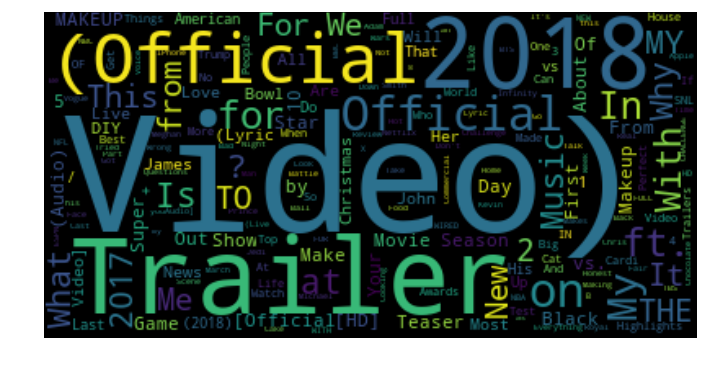

In [77]:
from wordcloud import WordCloud
wordcloud = WordCloud()

wc = WordCloud().generate_from_frequencies(wordDict)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [78]:
df.columns

Index(['channel_title', 'n', 'title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'channel_id', 'subscribe', 'len_title', 'nword_title', 'n_tags',
       'category', 'publish_date', 'days_to_trending', 'like_percentage',
       'dislike_percentage'],
      dtype='object')

### Do the more tags really mean getting more views?
Tagging is an important factor of course. But how many tags should we use? Is it really true that the more tags bring more views?

<Figure size 2160x1440 with 0 Axes>

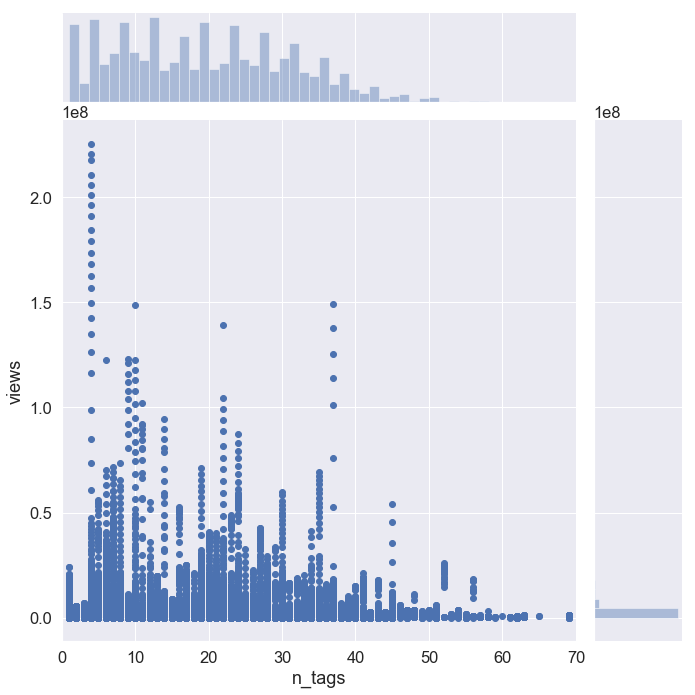

In [79]:
# number of tags 와 views 관계

plt.figure(figsize = (30, 20))
sns.jointplot(x = df['n_tags'], y = df.views, data = df, kind = 'scatter', height = 10, xlim=(0,70))
plt.show()

In [80]:
df['n_tags'].describe()

count   40926.00
mean       19.73
std        12.01
min         1.00
25%        10.00
50%        19.00
75%        29.00
max        69.00
Name: n_tags, dtype: float64

In [81]:
# the number of tags per topic

data3= []

for i in df["category"].unique():
    data3.append(go.Box(y = df[(df["category"]==i)&(df["days_to_trending"]<20)]['n_tags'], name = i)) # 조건 2개
    
layout = go.Layout(title = 'the tags numbers of trendy videos by topic', 
                   xaxis = dict(title = 'topic'), 
                   yaxis = dict(title = 'number of tags'))
fig = dict(data = data3, layout = layout)
py.iplot(fig)

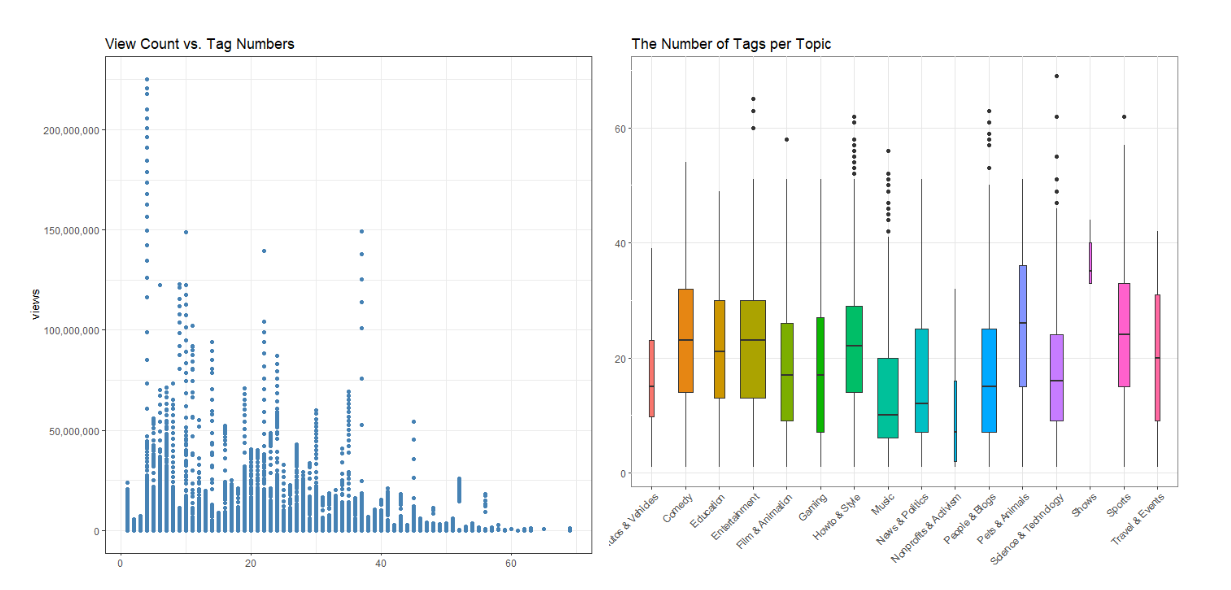

As shown, the number of tags doesn’t seem to be directly related to the views. The highest number of views is at 4 but there is no apparent tendency through the numbers. Additionally, with the right plot, we can see that they have different distributions for each topic. This indicates that it’s more about what keywords you have in your tag, not about how many you have.

#### Tag wordcloud per topic

In [82]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# 상위 25% views video 의 태그에 자주 사용된 단어들을 보자.

df_t=df[["views", "n_tags", "tags","category"]]
df_t= df_t[df_t["views"]>=1823349] 
df_t

views  n_tags  \
trending_date video_id                        
2017-11-14    1ZAPwfrtAFY   2418783       4   
              5qpjK5DgCt4   3191434      22   
              d380meD0W0M   2095731      14   
              39idVpFF7NQ   2103417      42   
              n1WpP7iowLc  17158531       6   
              DM-ni_LSOFE   2045386      28   
              0PpNlNJ6Nng   1842393      26   
              9t9u_yPEidY   9548677      17   
              ujyTQNNjjDU   2642930       4   
              8mhTWqWlQzU   2744430      25   
              t4YAyT4ihIQ   3358068      25   
              Jw1Y-zhQURU   7224515       9   
              2Vv-BfVoq4g  33523622      10   
              gEHCXl4J9Qo   2237404      13   
              b4vTZx_AtHk   2063667       9   
              kOnQocd799Y   2736733       9   
              jp9hK-jY6yY   3371669      37   
              pz95u3UVpaM   5476737      31   
              g5c1bk8weaQ   3578502      35   
              44NYFvhXmW8   1905487      28   
              9wg3v-01yKQ   9632678       4   
              DOIw62TXYkg   2457408       5   
2017-11-15    ItYOdWRo0JY   1836419       6   
              VsYmwBOYfW8   2765121      33   
              kgaO45SyaO4   3701763       5   
              2kyS6SvSYSE   2188590       1   
              1ZAPwfrtAFY   4632016       4   
              jr9QtXwC9vc   2671756      28   
              5E4ZBSInqUU   2285136      29   
              5qpjK5DgCt4   4326684      22   
...                             ...     ...   
2018-06-14    aEM2kOrrNJI  30599645      19   
              mQ055hHdxbE   5948415       7   
              au8QGTiPhEw   2611836      11   
              UKserM-i0_A   7676068      24   
              vRf3azp1pak   2826942      10   
              JNyZ49q4vrU   3388958      13   
              99t4EBwIAt8   2310794      19   
              UhiXEgqhBWs   2224667       4   
              voG07pt-KYI  21688951       4   
              3Q2j5ApzSqs  16777231       4   
              9NC2saE5MbQ   5985284      46   
              XdNOI-q70q4   2025376      13   
              QgOXIEhHU1Y  40087764      21   
              SQsPvrev_bQ   2252933       7   
              _1LdMWlNYS4   1925345      29   
              hHaUQh6Gx-Q   2653229       9   
              wI89nVn6LHk   2003345      40   
              oLDbO545aKQ   3825440      22   
              Qcj15vHJTtk   8607264      39   
              2in8XqiElwc   4945185       9   
              Xr2rgT9uEnA   3229540       8   
              v7H_Or9Nr5I   8300584       4   
              n_W54baizX8  41803845      27   
              pcJo0tIWybY   6004782       4   
              _QWZvU7VCn8   5564576      12   
              7UoP9ABJXGE   5534278      24   
              ju_inUnrLc4  23502572      24   
              1PhPYr_9zRY   8259128      27   
              oV0zkMe1K8s   5660813      22   
              ooyjaVdt-jA  10306119       4   

                                                                        tags  \
trending_date video_id                                                         
2017-11-14    1ZAPwfrtAFY  last week tonight trump presidency"|"last week...   
              5qpjK5DgCt4  racist superman"|"rudy"|"mancuso"|"king"|"bach...   
              d380meD0W0M  ryan"|"higa"|"higatv"|"nigahiga"|"i dare you"|...   
              39idVpFF7NQ  SNL"|"Saturday Night Live"|"SNL Season 43"|"Ep...   
              n1WpP7iowLc  Eminem"|"Walk"|"On"|"Water"|"Aftermath/Shady/I...   
              DM-ni_LSOFE  iPhone X"|"animojis"|"facial recognition"|"ELD...   
              0PpNlNJ6Nng  nails"|"nail art"|"nail tutorial"|"beauty tuto...   
              9t9u_yPEidY  Jennifer Lopez ft. Wisin"|"Jennifer Lopez ft. ...   
              ujyTQNNjjDU      BPG/RVG/RCA Records"|"G-Eazy"|"Rap"|"The Plan   
              8mhTWqWlQzU  wearing online dollar store makeup for a week"...   
              t4YAyT4ihIQ  getting my drivers license"|"lele"|"pons"|"get...   
              Jw1Y-zhQURU  c

In [84]:
# Groupby by country
tag = df_t.groupby("category")

# Summary statistic of all countries
tag.describe()

views                                                 \
                        count        mean         std        min         25%   
category                                                                       
Autos & Vehicles        48.00  7504596.44  6860364.15 1865148.00  2375143.00   
Comedy                 894.00  3715648.77  2851774.50 1823842.00  2250690.75   
Education              136.00  3164598.37  1087794.27 1838876.00  2286538.50   
Entertainment         2371.00  6771757.68 10601900.67 1823413.00  2472079.50   
Film & Animation       894.00  7071233.47  7448352.77 1823566.00  2633685.75   
Gaming                 366.00  4987598.01  3446717.49 1824489.00  2620050.50   
Howto & Style          627.00  3605992.57  3939529.83 1826373.00  2234720.00   
Music                 2942.00 12941270.57 21030290.53 1823701.00  3030190.25   
News & Politics        153.00  3966434.79  2392205.78 1826140.00  2179286.00   
Nonprofits & Activism    9.00 18134105.44  6958164.76 5579079.00 15808339.00   
People & Blogs         743.00  4858195.57  6049378.48 1824456.00  2415407.50   
Pets & Animals         101.00  3529232.18  1178676.59 1865661.00  2506821.00   
Science & Technology   454.00  5309461.78  6602059.14 1825705.00  2316864.50   
Sports                 469.00  7573433.53  5907380.45 1824082.00  2831479.00   
Travel & Events         25.00  4973684.16  6276030.65 1824153.00  1941810.00   

                                                            n_tags        \
                              50%         75%          max   count  mean   
category                                                                   
Autos & Vehicles       4524647.00 11053703.50  25244097.00   48.00 24.52   
Comedy                 2931583.00  3864729.75  29178096.00  894.00 24.26   
Education              2976876.50  3686580.50   7349435.00  136.00 18.19   
Entertainment          3705628.00  6359784.50 149376127.00 2371.00 22.84   
Film & Animation       4366294.00  8250528.00  54863912.00  894.00 19.76   
Gaming                 3486991.50  5806147.00  16935442.00  366.00 16.49   
Howto & Style          2594974.00  3523105.50  54155921.00  627.00 25.23   
Music                  5740516.50 14017768.00 225211923.00 2942.00 14.59   
News & Politics        2666775.00  5591222.00  10277358.00  153.00 13.86   
Nonprofits & Activism 21104436.00 23164093.00  24286474.00    9.00 15.11   
People & Blogs         3458569.00  4878260.50  56111957.00  743.00 20.44   
Pets & Animals         3493694.00  4050988.00   6187457.00  101.00 31.32   
Science & Technology   3108030.50  6226122.75  42799458.00  454.00 16.09   
Sports                 4440991.00 12482613.00  29090799.00  469.00 30.06   
Travel & Events        2015455.00  2533102.00  23932421.00   25.00  9.00   

                                                           
                        std   min   25%   50%   75%   max  
category                                                   
Autos & Vehicles       5.05 17.00 19.00 24.00 27.00 33.00  
Comedy                11.67  1.00 16.00 23.00 31.00 51.00  
Education              6.10  7.00 14.00 19.00 19.50 38.00  
Entertainment         10.45  1.00 14.00 24.00 30.00 51.00  
Film & Animation      10.05  1.00 11.00 21.00 26.00 50.00  
Gaming                 9.80  1.00  7.00 16.00 24.00 41.00  
Howto & Style         12.25  1.00 14.00 25.00 32.00 54.00  
Music                 10.97  1.00  6.00 11.00 21.00 56.00  
News & Politics       11.82  1.00  6.00  9.00 26.00 51.00  
Nonprofits & Activism  2.67  8.00 16.00 16.00 16.00 16.00  
People & Blogs        12.98  1.00  8.00 22.00 29.00 58.00  
Pets & Animals        12.33  1.00 26.00 37.00 38.00 46.00  
Science & Technology  11.91  1.00  5.00 15.00 26.00 51.00  
Sports                 9.71  1.00 25.00 32.00 36.00 51.00  
Travel & Events        8.25  1.00  7.00  7.00  9.00 29.00

In [85]:
tag.mean().sort_values(by="n_tags",ascending=False)

views  n_tags
category                                 
Pets & Animals         3529232.18   31.32
Sports                 7573433.53   30.06
Howto & Style          3605992.57   25.23
Autos & Vehicles       7504596.44   24.52
Comedy                 3715648.77   24.26
Entertainment          6771757.68   22.84
People & Blogs         4858195.57   20.44
Film & Animation       7071233.47   19.76
Education              3164598.37   18.19
Gaming                 4987598.01   16.49
Science & Technology   5309461.78   16.09
Nonprofits & Activism 18134105.44   15.11
Music                 12941270.57   14.59
News & Politics        3966434.79   13.86
Travel & Events        4973684.16    9.00

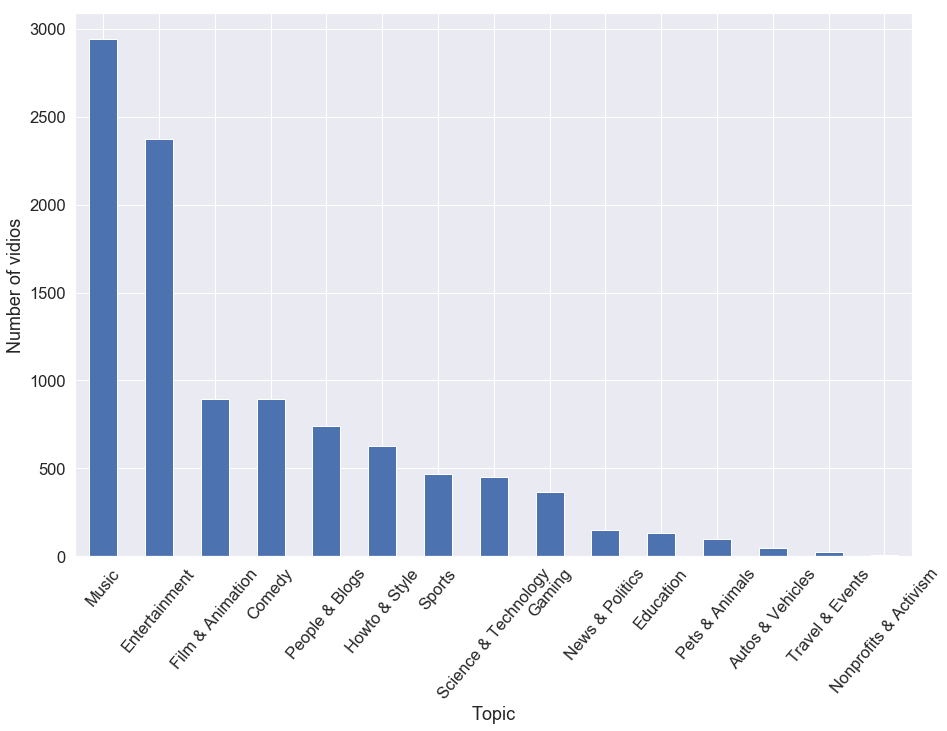

In [86]:
# 토픽 당 상위 25% 비디오의 수

plt.figure(figsize=(15,10))
tag.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Topic")
plt.ylabel("Number of vidios")
plt.show()

전체 비디오의 수는 Entertainment가 많지만 views가 높은 상위 25%의 비디오를 보면 music 이 가장 많은것을 알수있다.

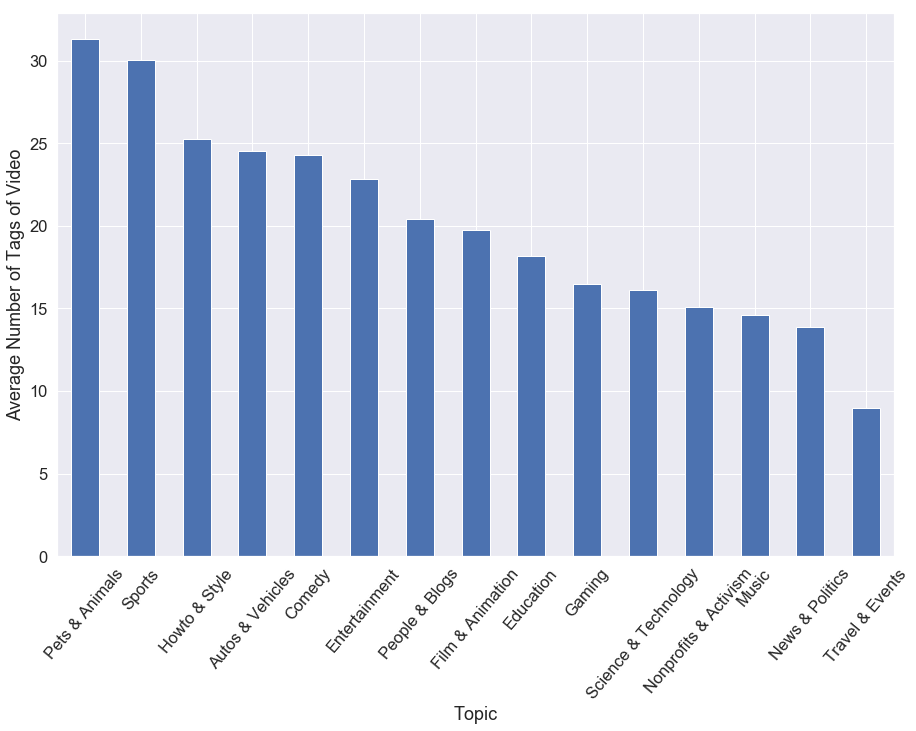

In [87]:
# Average Number of Tags of Video per Topic

plt.figure(figsize=(15,10))
tag.mean().sort_values(by="n_tags",ascending=False)["n_tags"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Topic")
plt.ylabel("Average Number of Tags of Video")
plt.show()

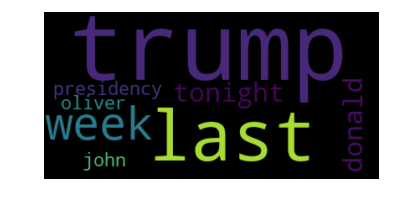

In [88]:
# Start with one review:
text = df_t.tags[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=100, max_words=10, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [90]:
text = " ".join(tag for tag in df_t.tags.unique())
print ("There are {} words in the combination of all tag word.".format(len(text)))

There are 403758 words in the combination of all tag word.


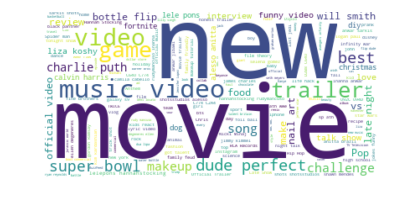

In [91]:
# wordcloud in all topic 

# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most visible tag words in the top 25 percent video are new, Movie, Music, Video, Trailer, Game, etc.
It seems like 'new, movie, music, video, trailer, and game' are the most mentioned characteristics, and 'new' is the most popular of them all. This aligns with the fact that 'new' is best represents the trend. 
it is also consistent with the fact that there are many top trend videos in music and entertainment.

In [92]:
# Words used in popular video tags by topic

In [93]:
tag.size().sort_values(ascending=False).head(10)

category
Music                   2942
Entertainment           2371
Film & Animation         894
Comedy                   894
People & Blogs           743
Howto & Style            627
Sports                   469
Science & Technology     454
Gaming                   366
News & Politics          153
dtype: int64

In [94]:
# Join all reviews of each country:
mus = " ".join(tag for tag in df_t[df_t["category"]=="Music"].tags)
ent = " ".join(tag for tag in df_t[df_t["category"]=="Entertainment"].tags)
fil = " ".join(tag for tag in df_t[df_t["category"]=="Film & Animation"].tags)
com = " ".join(tag for tag in df_t[df_t["category"]=="Comedy"].tags)
peo = " ".join(tag for tag in df_t[df_t["category"]=="People & Blogs"].tags)
sty = " ".join(tag for tag in df_t[df_t["category"]=="Howto & Style"].tags)
spo = " ".join(tag for tag in df_t[df_t["category"]=="Sports"].tags)
sci = " ".join(tag for tag in df_t[df_t["category"]=="Science & Technology"].tags)
gam = " ".join(tag for tag in df_t[df_t["category"]=="Gaming"].tags)
new = " ".join(tag for tag in df_t[df_t["category"]=="News & Politics"].tags)

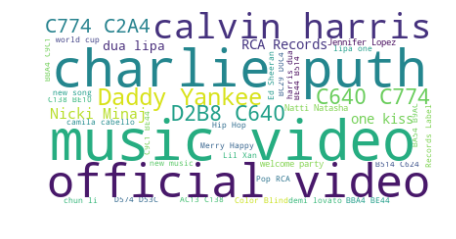

In [95]:

wordcloud_mus = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=40).generate(mus)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_mus, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

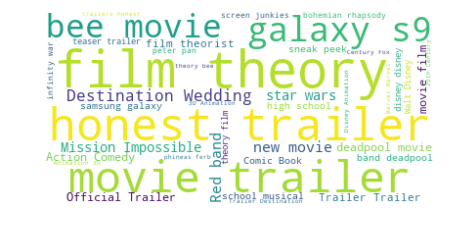

In [96]:
wordcloud_fil = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=40).generate(fil)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fil, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

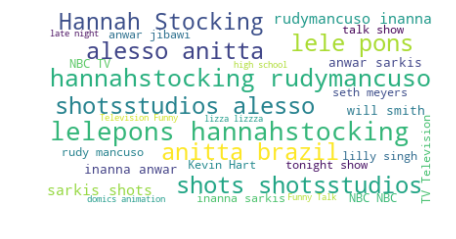

In [97]:
wordcloud_com = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=30).generate(com)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_com, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

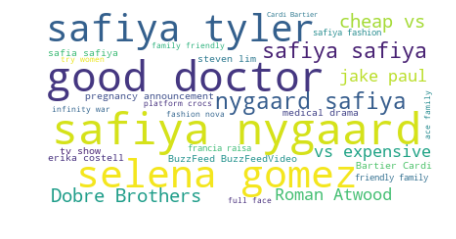

In [98]:
wordcloud_peo = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=30).generate(peo)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_peo, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

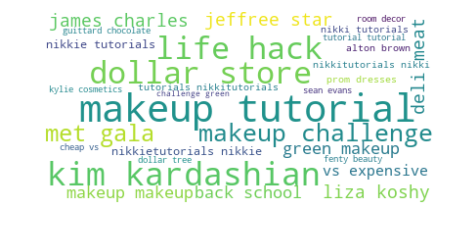

In [99]:
wordcloud_sty = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=30).generate(sty)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_sty, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

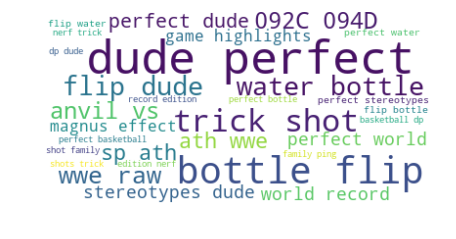

In [100]:
wordcloud_spo = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=30).generate(spo)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_spo, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

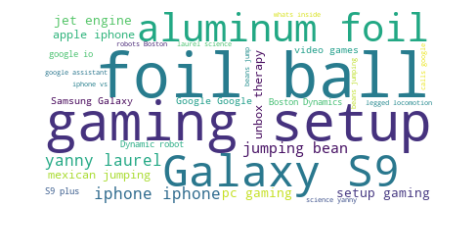

In [101]:
wordcloud_sci = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=30).generate(sci)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_sci, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

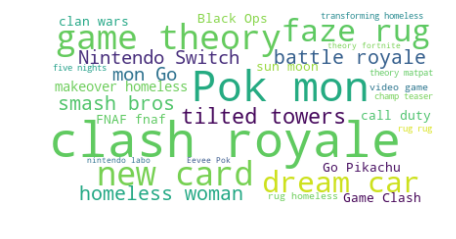

In [102]:
wordcloud_gam = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",max_words=30).generate(gam)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_gam, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

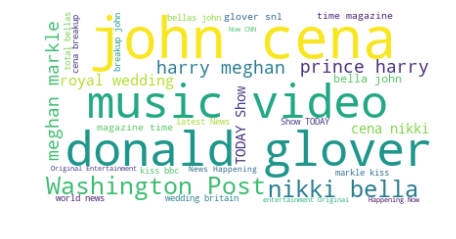

In [103]:
wordcloud_new = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=30).generate(new)

plt.figure(figsize=[7,7])
plt.imshow(wordcloud_new, interpolation="bilinear")
plt.axis("off")

# # store to file
# plt.savefig("img/us_wine.png", format="png")

plt.show()

In [104]:
# graphic wordcloud

In [105]:
youtube = np.array(Image.open("youtube.jpg"))


The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

First, you use the transform_format() function to swap number 0 to 255.


In [106]:
# def transform_format(val):
#     if val == 0:
#         return 255
#     else:
#         return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.

In [107]:
# # Transform your mask into a new one that will work with the function:
# transformed_youtube = np.ndarray((youtube.shape[0],youtube.shape[1]), np.int32)

# for i in range(len(youtube)):
#     transformed_youtube[i] = list(map(transform_format, youtube[i]))

In [108]:
# # Check the expected result of your mask
# transformed_youtube

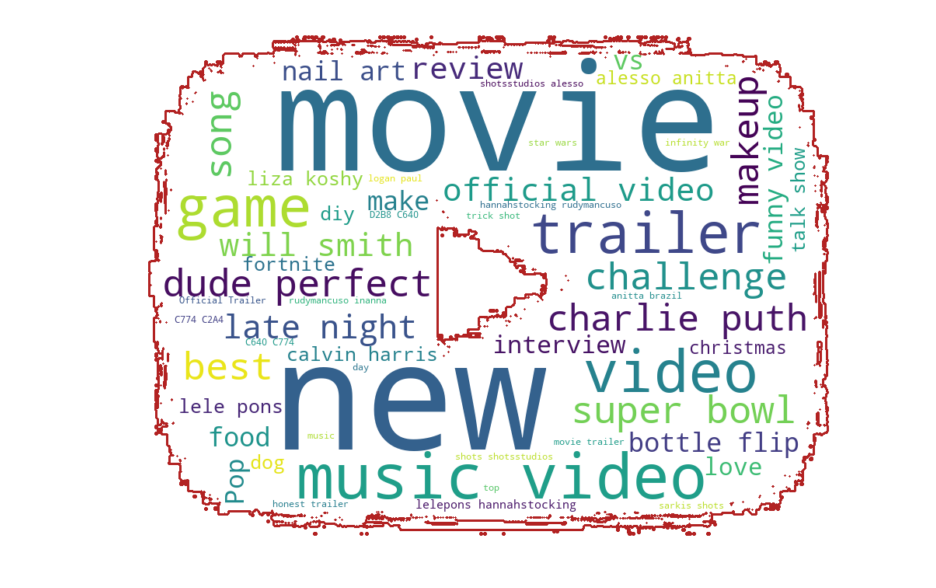

In [109]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=55, mask= youtube,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# # store to file
# wc.to_file("youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

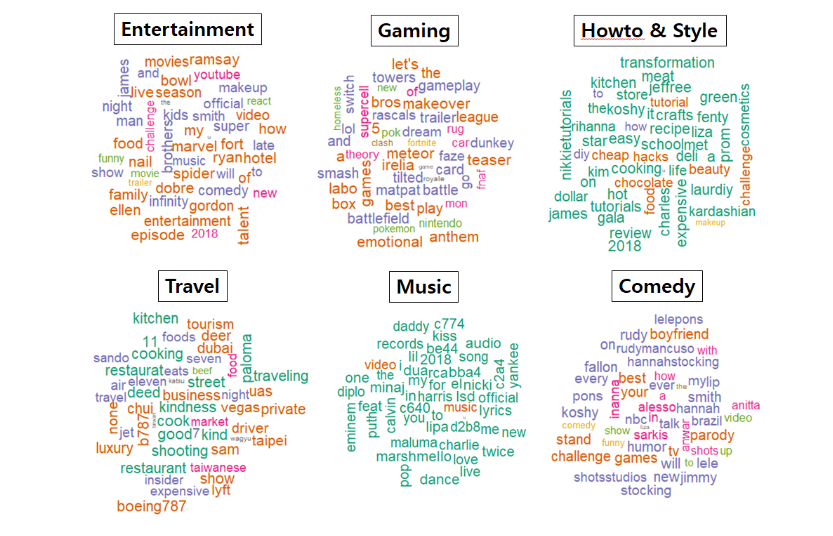

The word cloud shows what are the frequently used tags in the topics. These are from the videos which have more than 1.8 million views, which is a 3rd quantile of the total views. Although it can’t be said those views are due to the tags, at least we can infer what people are interested in and what to have in content.

In [110]:
# 이미지 만들고 이미지 안에  wordcloud 그리기

# # Generate a word cloud image
# youtube = np.array(Image.open("youtube.jpg"))
# wordcloud_new = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=100, mask= youtube,).generate(new)

# # create coloring from image
# image_colors = ImageColorGenerator(youtube)
# plt.figure(figsize=[7,7])
# plt.imshow(wordcloud_new.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")
# # # store to file
# # plt.savefig("img/us_wine.png", format="png")

# plt.show()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40926 entries, (2017-11-14 00:00:00, 2kyS6SvSYSE) to (2018-06-14 00:00:00, ooyjaVdt-jA)
Data columns (total 23 columns):
channel_title             40926 non-null object
n                         40926 non-null int64
title                     40926 non-null object
tags                      40926 non-null object
views                     40926 non-null int64
likes                     40926 non-null int64
dislikes                  40926 non-null int64
comment_count             40926 non-null int64
thumbnail_link            40926 non-null object
comments_disabled         40926 non-null bool
ratings_disabled          40926 non-null bool
video_error_or_removed    40926 non-null bool
description               40926 non-null object
channel_id                39868 non-null object
subscribe                 40926 non-null int64
len_title                 40926 non-null int64
nword_title               40926 non-null int64
n_tags                    4

In [112]:
df= df.drop('comments_disabled', axis = 1)
df= df.drop('ratings_disabled', axis = 1)
df= df.drop('video_error_or_removed', axis = 1)

In [113]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
# quantitative.remove('views')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

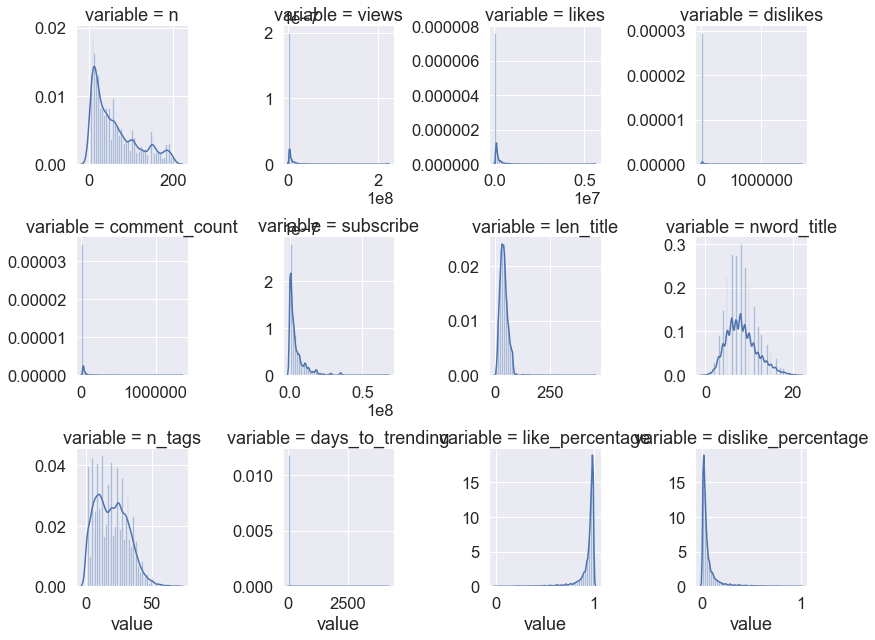

In [114]:
# quantitative data
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [115]:
# 이 분석에서 의미가 없기에 unique가 너무 많은 변수는 삭제한다.
# Summary of Object Variables
df.describe(include=[np.object])

channel_title                                       title    tags  \
count          40926                                       40926   40926   
unique          2206                                        6451    6054   
top             ESPN  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  [none]   
freq             203                                          30    1521   

                                        thumbnail_link description  \
count                                            40926       40926   
unique                                            6349        6897   
top     https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg               
freq                                                30         576   

                      channel_id       category publish_date  
count                      39868          40926        40926  
unique                      2092             16          313  
top     UCiWLfSweyRNmLpgEHekhoAg  Entertainment   2017-12-22  
freq                         201           9956          452

In [116]:
qualitative.remove('channel_title')
qualitative.remove('title')
qualitative.remove('tags')
qualitative.remove('thumbnail_link')
qualitative.remove('description')
qualitative.remove('channel_id')
qualitative.remove('publish_date')

In [117]:
# ylim을 정하자.
df.views.describe()

count       40926.00
mean      2361180.11
std       7395925.46
min           549.00
25%        242289.25
50%        681709.00
75%       1823349.00
max     225211923.00
Name: views, dtype: float64

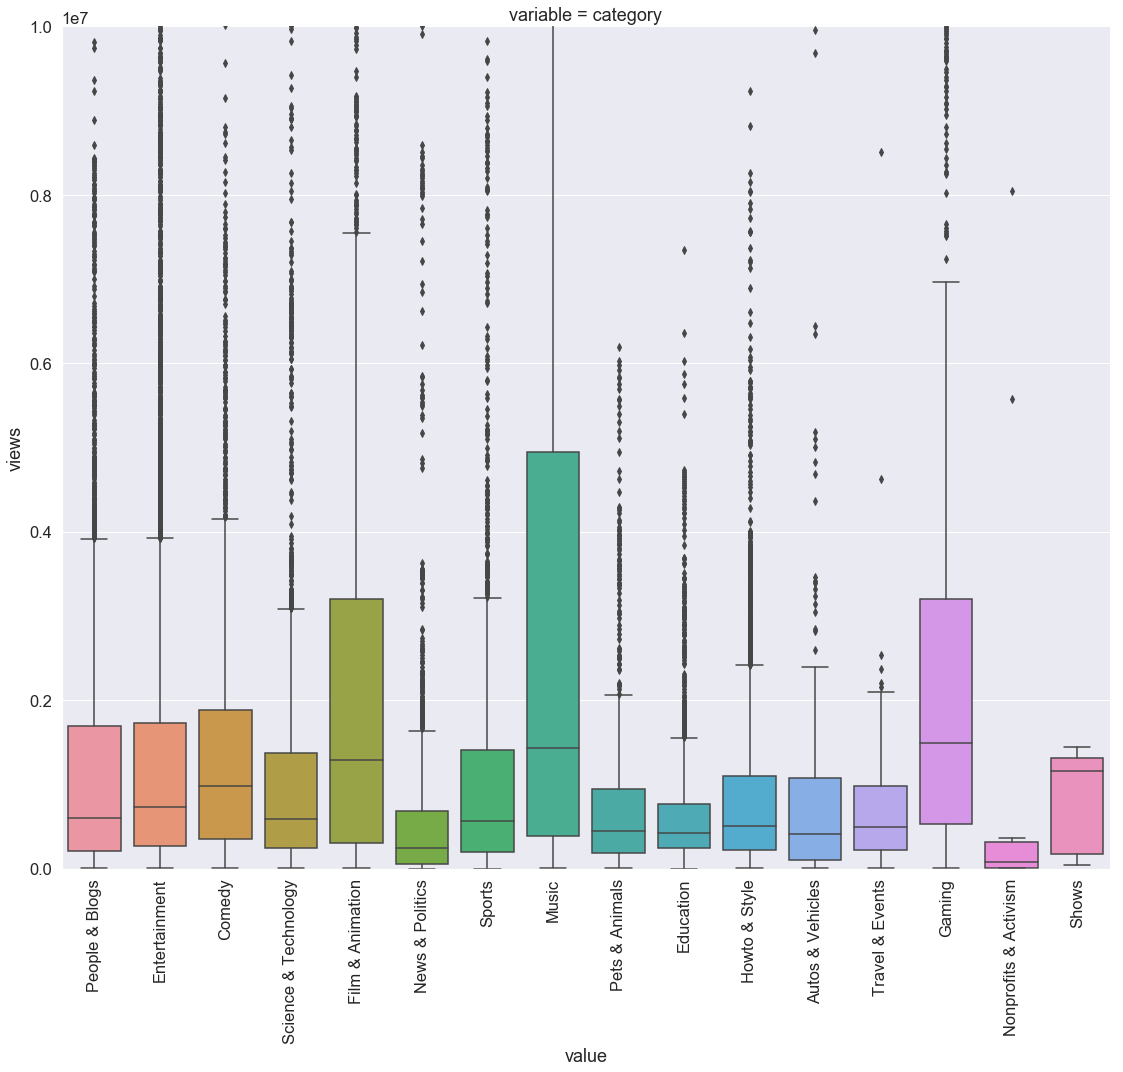

In [118]:
for c in qualitative:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')
        # null -> missing 카데고리를 만든다

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['views'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=15, ylim=(0, 10000000))
g = g.map(boxplot, "value", "views")

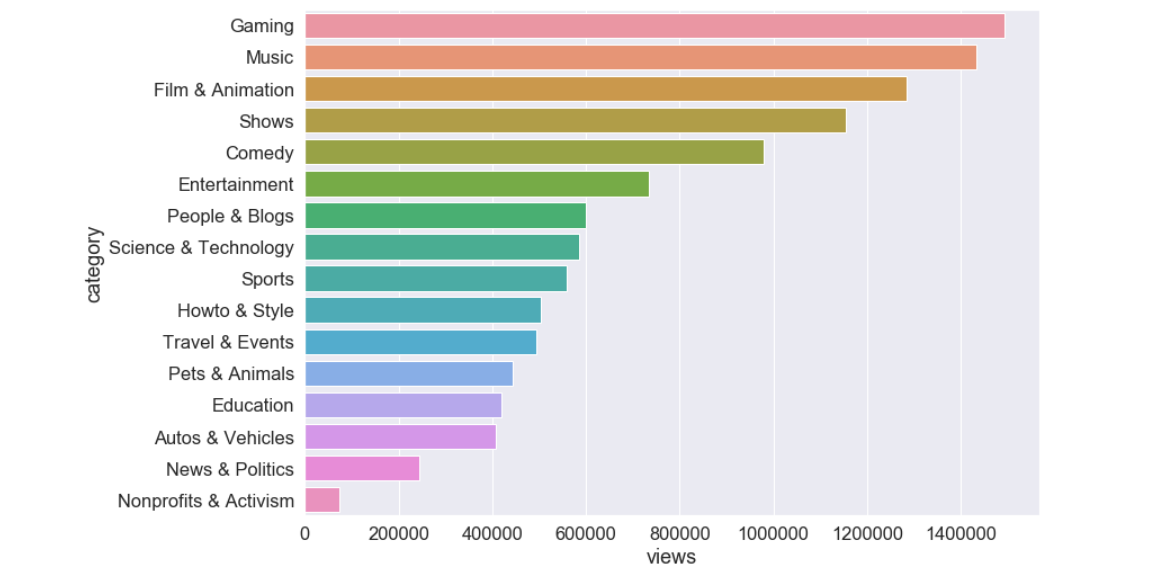

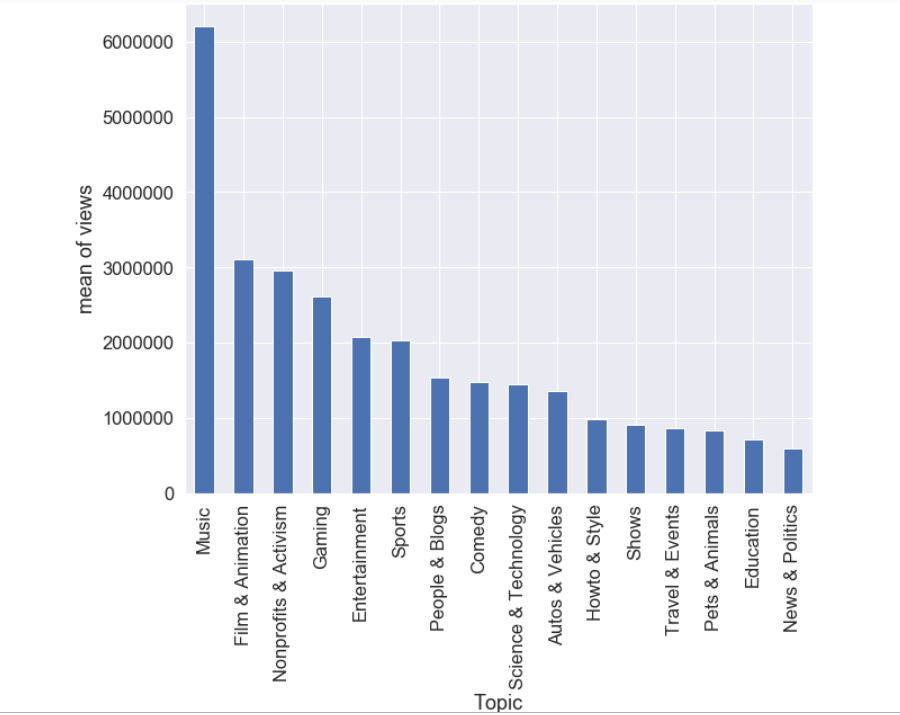

토픽 별로 views 중위값은 game 이 music 보다 높지만 범위 분포를 보면 music 의 범위가 넓은것을 알수있다. 소수 인기 뮤지션의 view가 압도적으로 높은걸을 알수있다. 토픽 별로 views의 평균을 보면 역시 music 이 압도적으로 값이 높은것을 볼수있는데 소수 인기 뮤지션이 평균을 끌어올렸음을 알수있다. 

In [119]:
#질적변수(순서형+카테고리형)를 양적변수로 변화시키며 동시에 결측치도 의미있는 순서의 넘버를 받는다.

from scipy.stats import trim_mean
# m = stats.trim_mean(train[''], 0.1) # Trim 10% at both ends of the mean 극단치 제외하기위해 mean 대신 trim_mean 사용
    
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique() #각 특성의 카테고리값을 val에 넣었다
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'views']].groupby(feature)['views'].mean() #각 특성의 카테고리값의 SalePrice 평균을 spmean에 넣는다
    ordering = ordering.sort_values('spmean') # SalePrice 평균값이 작은 카테고리부터 sort된다.
    ordering['ordering'] = range(1, ordering.shape[0]+1) # 1부터 카데고리수만큼 순서를 정한후
    ordering = ordering['ordering'].to_dict() #딕셔너리 키밸류 셋으로 만든후
    
    for cat, o in ordering.items(): # 키,밸류 뽑아서
        frame.loc[frame[feature] == cat, feature+'_E'] = o # 카테고리 이름과 변수 이름이 만나는 행렬의 밸류값 즉 SalePrice평균값을 꺼낸다.
    
qual_encoded = []
for q in qualitative:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['category_E']


## Correlations

Generally to reduce confunding only variables uncorrelated with each other should be added to regression models (which are correlated with views).

In [120]:
# 자기상관 없애기 위해
quantitative.remove('views')

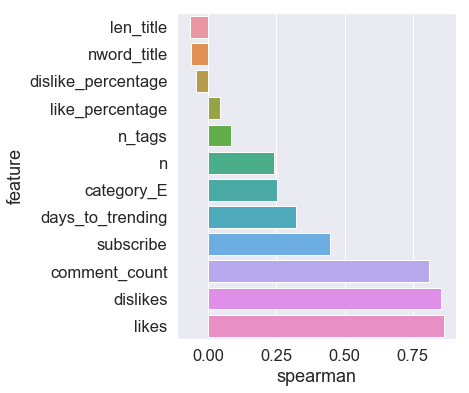

In [121]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['views'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(5, 0.5*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df, features)

Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.

The plot matrix with numeric features by using heatmap
made the plot matrix of all numeric variables. It has the number of subscribers, views, likes, dislikes, comments, the length of titles, the word numbers of titles, and the number of tags. You can easily check the scatter plot and correlation of all pairs. likes is correlated with views and comment counts. This plot matrix is very useful to see the overall relations among features before you start deeper analysis or to check the multi-collinearity before building a predictive model.

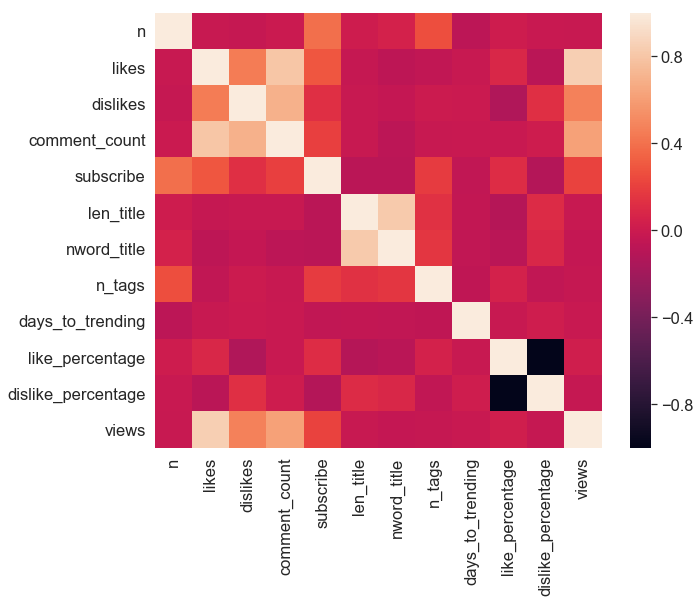

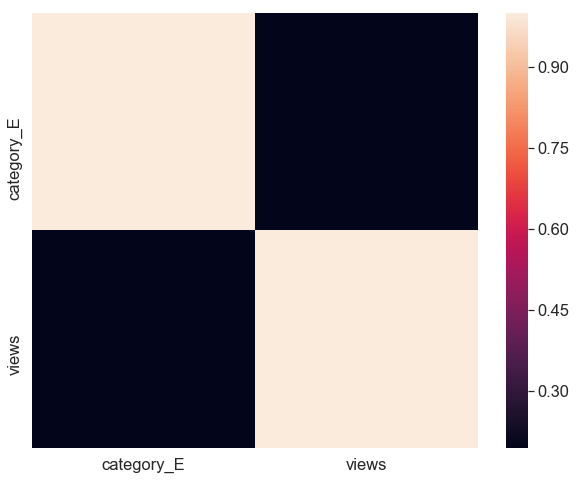

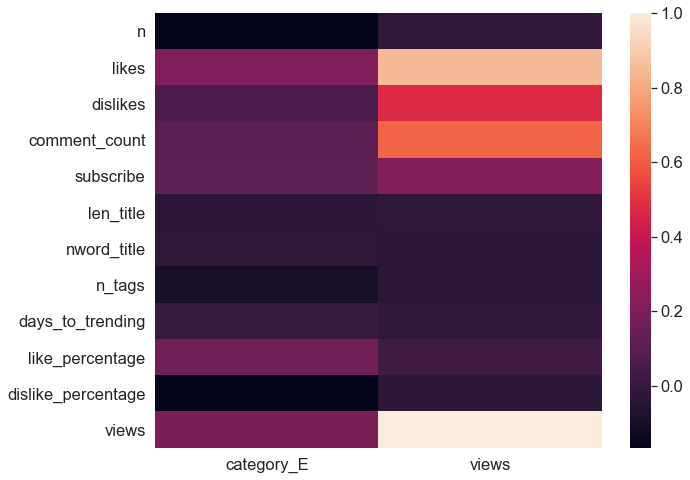

In [122]:
#변수 그룹별 상관관계
#Correlation matrix

plt.figure(figsize=(10, 8)) 
plt.figure(1)
corr = df[quantitative+['views']].corr()
sns.heatmap(corr)

plt.figure(figsize=(10, 8))
plt.figure(2)
corr = df[qual_encoded+['views']].corr()
sns.heatmap(corr)

plt.figure(figsize=(10, 8))
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['views'], columns=qual_encoded+['views'])
for q1 in quantitative +['views']:
    for q2 in qual_encoded + ['views']:
        corr.loc[q1, q2] = df[q1].corr(df[q2])
sns.heatmap(corr)

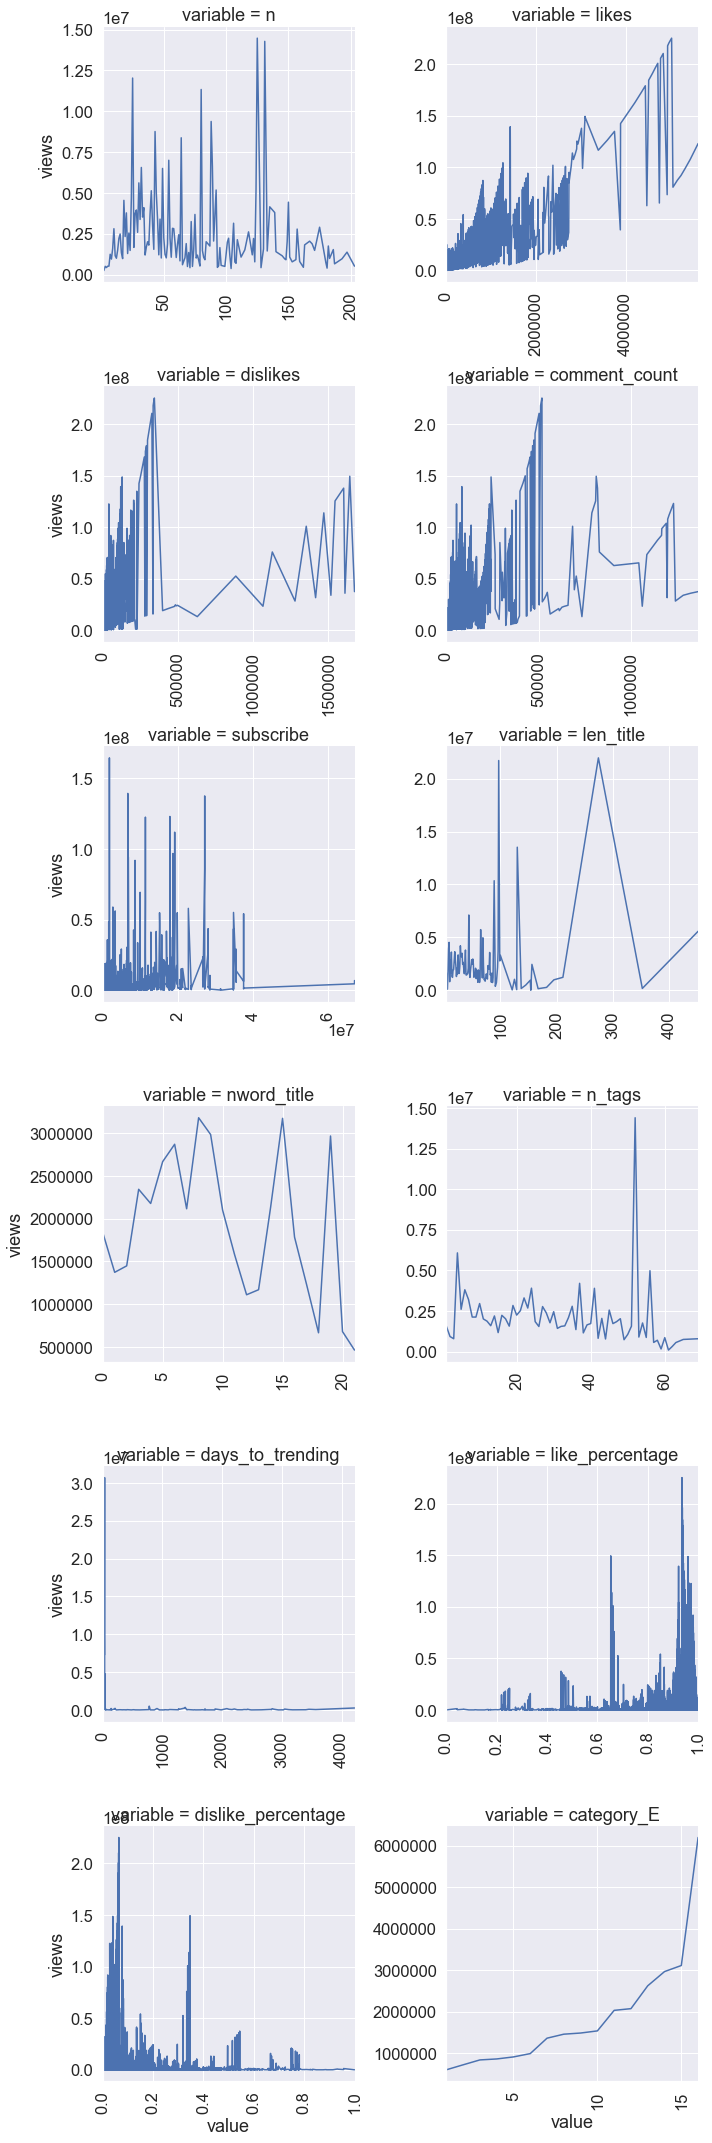

In [123]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['views'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "views")

In [124]:
# 인코딩한 데이터로 대체해서 df 새로 만듬

quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
# quantitative.remove('views')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

df_E=df[quantitative+qualitative]

In [125]:
df_E.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40926 entries, (2017-11-14 00:00:00, 2kyS6SvSYSE) to (2018-06-14 00:00:00, ooyjaVdt-jA)
Data columns (total 21 columns):
n                     40926 non-null int64
views                 40926 non-null int64
likes                 40926 non-null int64
dislikes              40926 non-null int64
comment_count         40926 non-null int64
subscribe             40926 non-null int64
len_title             40926 non-null int64
nword_title           40926 non-null int64
n_tags                40926 non-null int64
category              40926 non-null category
days_to_trending      40926 non-null int64
like_percentage       40756 non-null float64
dislike_percentage    40756 non-null float64
category_E            40926 non-null float64
channel_title         40926 non-null object
title                 40926 non-null object
tags                  40926 non-null object
thumbnail_link        40926 non-null object
description           40926 non-null objec

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40926 entries, (2017-11-14 00:00:00, 2kyS6SvSYSE) to (2018-06-14 00:00:00, ooyjaVdt-jA)
Data columns (total 21 columns):
channel_title         40926 non-null object
n                     40926 non-null int64
title                 40926 non-null object
tags                  40926 non-null object
views                 40926 non-null int64
likes                 40926 non-null int64
dislikes              40926 non-null int64
comment_count         40926 non-null int64
thumbnail_link        40926 non-null object
description           40926 non-null object
channel_id            39868 non-null object
subscribe             40926 non-null int64
len_title             40926 non-null int64
nword_title           40926 non-null int64
n_tags                40926 non-null int64
category              40926 non-null category
publish_date          40926 non-null object
days_to_trending      40926 non-null int64
like_percentage       40756 non-null float64


In [127]:
# category_E 의 의미는? 
df_c = df[["category", "category_E", "views"]]
df_c.sort_values(by=['category']).head()

category  category_E    views
trending_date video_id                                          
2018-05-16    azUbCdcAeFM  Autos & Vehicles        7.00  1006189
2017-12-06    sTvY9Llqtms  Autos & Vehicles        7.00  1355713
2018-01-23    yBXcNcBnImc  Autos & Vehicles        7.00   277651
2018-02-07    SlbY1tGARUA  Autos & Vehicles        7.00  2206213
2018-02-23    oOZ_Q6qzXuw  Autos & Vehicles        7.00   941460

In [128]:
df_c.views.describe()

count       40926.00
mean      2361180.11
std       7395925.46
min           549.00
25%        242289.25
50%        681709.00
75%       1823349.00
max     225211923.00
Name: views, dtype: float64

In [129]:
# topic별로 views 평균을 보자
df_c.groupby("category").mean().sort_values(by=['views'])

category_E      views
category                                    
News & Politics              1.00  592587.74
Education                    2.00  712940.82
Pets & Animals               3.00  831143.47
Travel & Events              4.00  854619.61
Shows                        5.00  903527.33
Howto & Style                6.00  983730.12
Autos & Vehicles             7.00 1355965.41
Science & Technology         8.00 1452626.75
Comedy                       9.00 1480308.42
People & Blogs              10.00 1531835.43
Sports                      11.00 2027832.16
Entertainment               12.00 2068829.59
Gaming                      13.00 2620830.63
Nonprofits & Activism       14.00 2963884.07
Film & Animation            15.00 3110278.58
Music                       16.00 6201003.12

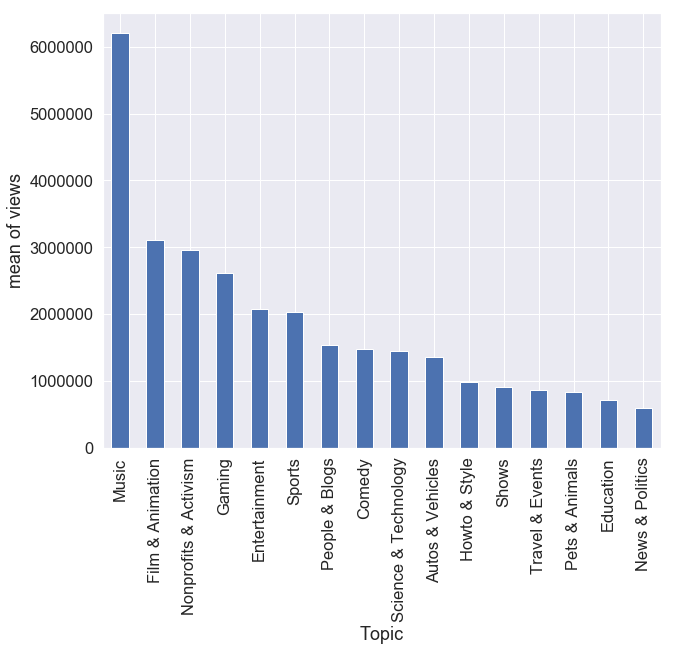

In [130]:
# topic별로 views 평균을 그래프로 보자

df_v=df_c.groupby("category")

plt.figure(figsize=(10,8))
df_v.mean().sort_values(by="views",ascending=False)['views'].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Topic")
plt.ylabel("mean of views")
plt.show()

### The channel with more trendy video, the more views?
##### groupby 해서 그래프 그리기

n은 channel_title의 개수를 의미하므로 n으로 그룹을 묶고 그중에 views 가 가장 큰 비디오, 즉 가장 최신상태의 비디오를 골라 뷰를 확인한다. 나머진 같은 비디오의 중복이므로 필요없다.

In [131]:
df

channel_title    n  \
trending_date video_id                                                   
2017-11-14    2kyS6SvSYSE                            CaseyNeistat   95   
              1ZAPwfrtAFY                         LastWeekTonight   24   
              5qpjK5DgCt4                            Rudy Mancuso   74   
              puqaWrEC7tY                   Good Mythical Morning  147   
              d380meD0W0M                                nigahiga   89   
              gHZ1Qz0KiKM                                iJustine   99   
              39idVpFF7NQ                     Saturday Night Live  175   
              nc99ccSXST0                      CrazyRussianHacker  115   
              jr9QtXwC9vc                        20th Century Fox  135   
              TUmyygCMMGA                                     Vox  193   
              9wRQljFNDW8                                     NFL  123   
              VifQlJit6A0                                     amc   23   
              5E4ZBSInqUU                              marshmello   12   
              GgVmn66oK_A                           NowThis World    5   
              TaTleo4cOs8                         The king of DIY   12   
              kgaO45SyaO4                          BostonDynamics   55   
              ZAQs-ctOqXQ                                 Cracked   26   
              YVfyYrEmzgM                                  TED-Ed  162   
              eNSN6qet1kE                             PeterSripol    6   
              B5HORANmzHw                                 SciShow  135   
              vU14JY3x81A                             Life Noggin  148   
              6VhU_T463sU                                  Tested   20   
              _-aDHxoblr4                               Tom Scott  159   
              JBZTZZAcFTw                              Refinery29   96   
              lZ68j2J_GOM                             Gus Johnson   68   
              dRpNZV18N_g                         HellthyJunkFood  153   
              fcVjitaM3LY                             Numberphile   49   
              qeWvgZLz9yU                      JerryRigEverything   43   
              iIxy3JN3-jc    Cleveland Cavaliers on cleveland.com    6   
              n30k5CwLhS4                          FaeryInLoveInc    4   
...                                                           ...  ...   
2018-06-14    vDyYMcjf500                       DidYouKnowGaming?   20   
              3Q2j5ApzSqs                           CAguileraVEVO   50   
              GfxNGjfSKRY                           BBCRadio1VEVO   46   
              amtC28yfYCM  The Tonight Show Starring Jimmy Fallon  197   
              9NC2saE5MbQ                        camelsandfriends   21   
              XdNOI-q70q4                             Matt Stonie   81   
              QgOXIEhHU1Y                                   Diplo   54   
              SQsPvrev_bQ                      Tyler, The Creator   22   
              _1LdMWlNYS4                                PBS Eons   54   
              AFbu21AGSho                            Nat Geo WILD   22   
              hHaUQh6Gx-Q                             MustardVEVO   20   
              wI89nVn6LHk                           American Idol   87   
              oLDbO545aKQ                            Rudy Mancuso   74   
              tiF9SzzzX_o                               The Voice  121   
              Gs26bZTRkdU                                 SciShow  135   
              Qcj15vHJTtk                     Saturday Night Live  175   
              2in8XqiElwc                        NickiMinajAtVEVO   40   
              Xr2rgT9uEnA                              miniminter   25   
              v7H_Or9Nr5I                        Lucas the Spider   72   
              n_W54baizX8                            Daddy Yankee   25   
              pcJo0tIWybY                                 SZAVEVO   41   
              _QWZvU7VCn8                  The Graham No

In [132]:
num = df[["n", "views"]]

# Groupby by n
num = num.groupby("n")

# Summary statistic of all countries
num.describe().head()

views                                                                     
   count      mean        std    min      25%       50%       75%         max
n                                                                            
1 127.00 265731.50  669364.32 773.00  8077.50  45096.00 178281.50  5579079.00
2 270.00 256033.87  780060.39 687.00  8264.75  49914.50 175316.00  9893438.00
3 507.00 511245.37 1604221.09 658.00  7291.50  43426.00 220298.00 24004779.00
4 559.00 436307.17 1672214.06 884.00 16435.00  59596.00 196972.00 19177871.00
5 940.00 518429.21 1221063.16 945.00 36777.75 109633.00 344033.00 12030454.00

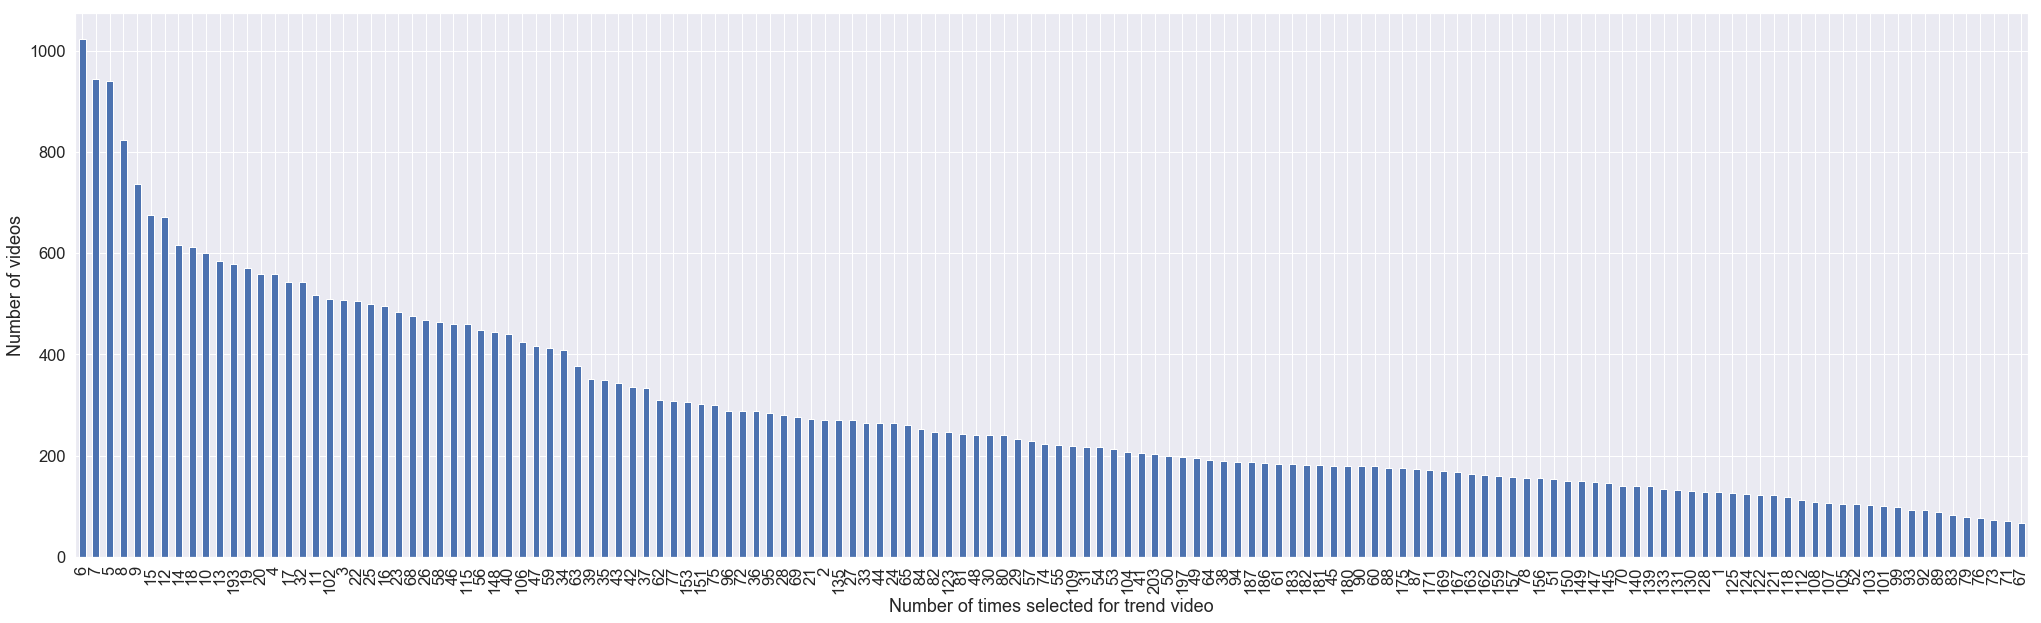

In [133]:
plt.figure(figsize=(35,10))
num.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Number of times selected for trend video")
plt.ylabel("Number of videos")
plt.show()

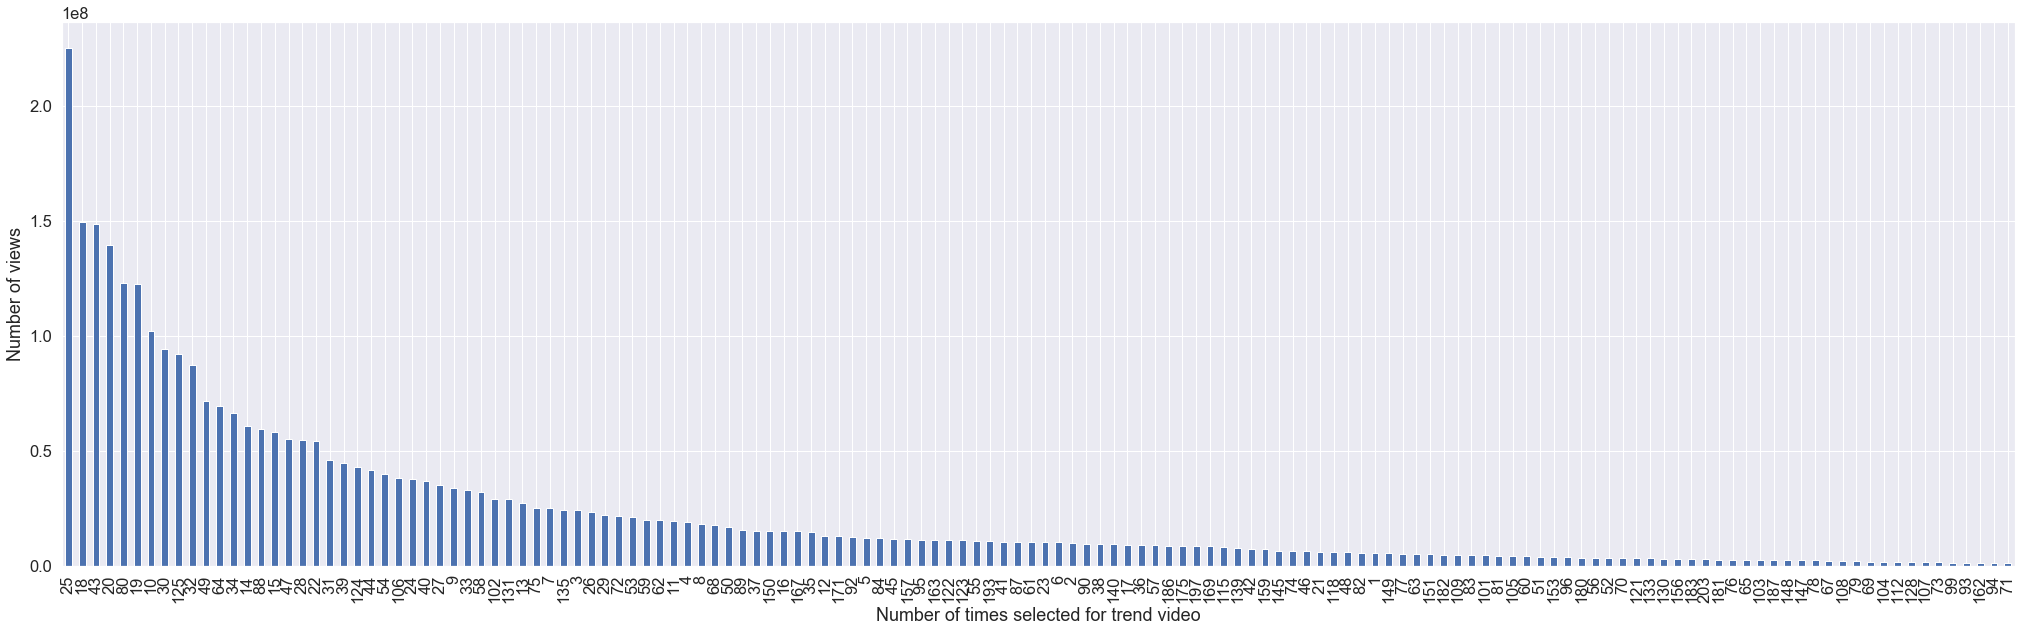

In [134]:
plt.figure(figsize=(35,10))
num.max().sort_values(by="views",ascending=False)["views"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Number of times selected for trend video")
plt.ylabel("Number of views")
plt.show()

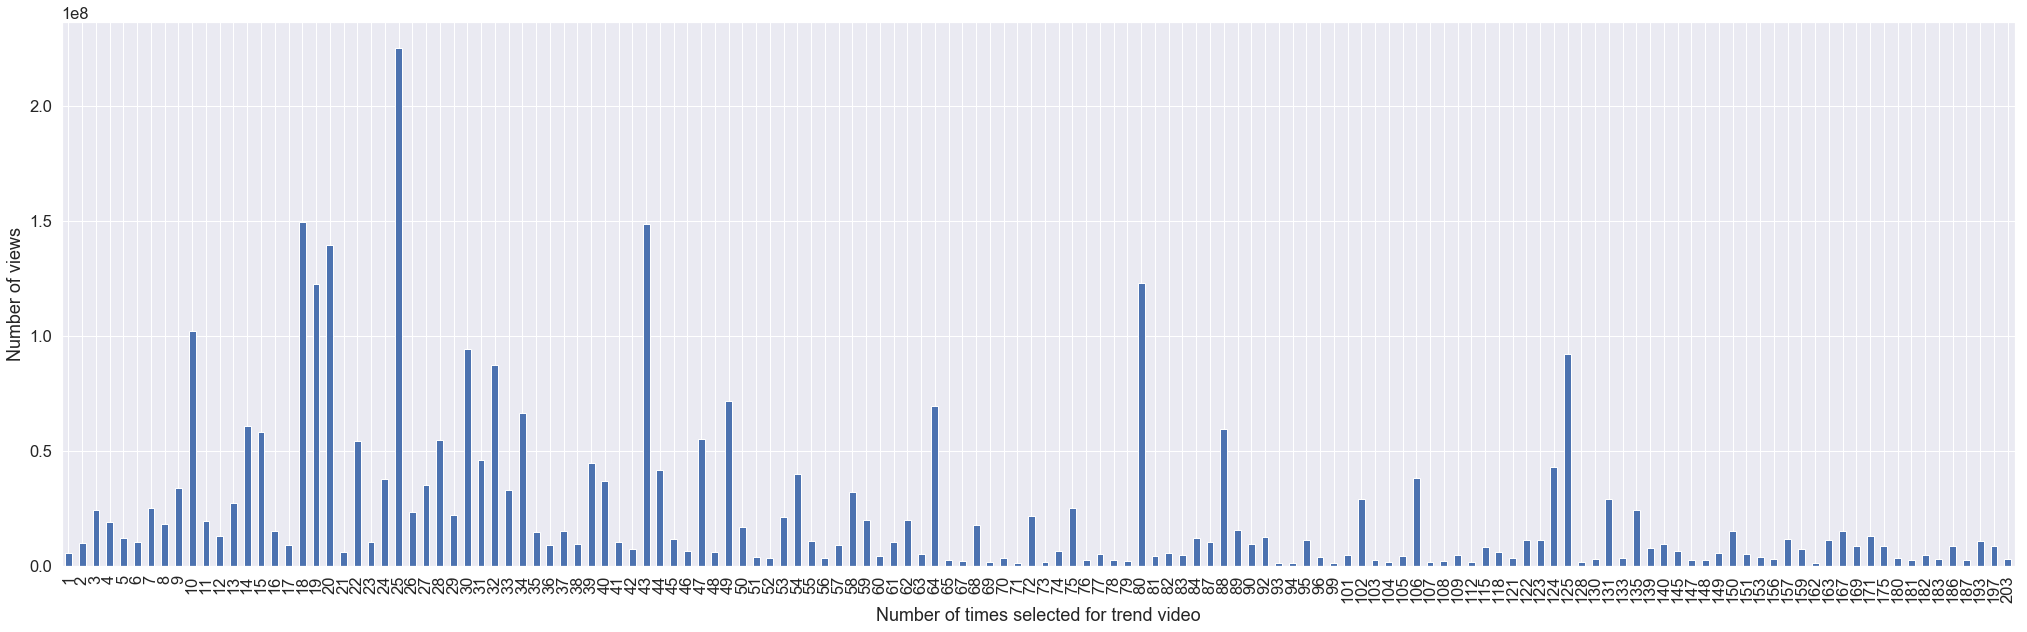

In [135]:
#max of view

plt.figure(figsize=(35,10))
num.max().sort_values(by="n",ascending=True)["views"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Number of times selected for trend video")
plt.ylabel("Number of views")
plt.show()

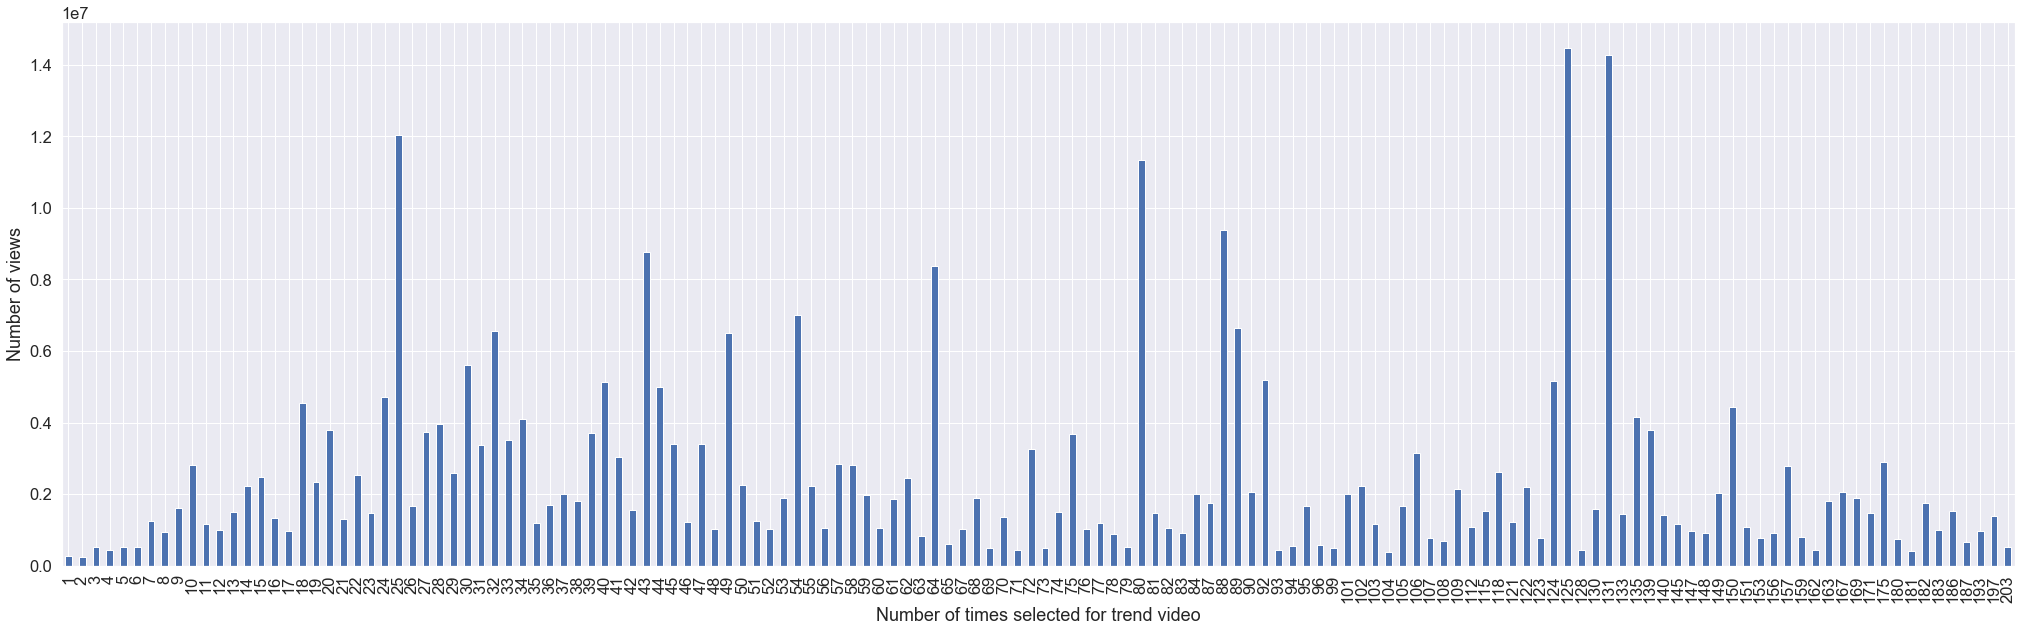

In [136]:
#mean of view
plt.figure(figsize=(35,10))
num.mean().sort_values(by="n",ascending=True)["views"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Number of times selected for trend video")
plt.ylabel("Number of views")
plt.show()

트렌드 비디오를 5~7번 정도 가진 채널들이 가장 많다. 가장 많이 뽑힌 채널은 203개의 동영상이 뽑혔다. 그러나 25개의 비디오를 가진 채널이 가장 많은 views를 기록하였다. 관계를 보기쉽게 트렌드 비디오 횟수로 정렬을 해서 보면 두변수는 관계가 없는것을 볼수있다. 오히려 적은 트렌드 비디오를 가진 채널이 더 많은 view를 보여주고 있다. 트렌드 비디오 보유수당 뷰 평균으로 봐도 아무런 관계가 없는걸 볼수있다. 이것으로 보아 트렌드한 비디오를 많이 가지고 있는 채널일수록 뷰가 더 많은것이 아니란 것을 알수있다. 


In [137]:
df.columns

Index(['channel_title', 'n', 'title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'description', 'channel_id',
       'subscribe', 'len_title', 'nword_title', 'n_tags', 'category',
       'publish_date', 'days_to_trending', 'like_percentage',
       'dislike_percentage', 'category_E'],
      dtype='object')

### Relationship of Number of times selected for trend video and views 

In [138]:
df_f=df[["title", "views","days_to_trending",'channel_title','thumbnail_link','category']]

In [139]:
# Groupby by country
tit = df_f.groupby("title")

# Summary statistic of all countries
tit.describe()

views              \
                                                   count        mean   
title                                                                  
#184 Making a PCB using EasyEDA. // Review          1.00     3237.00   
#23 Feed The Homeless | One List, One Life          6.00    40253.33   
#57: AM and SSB explained                           4.00     3489.50   
#AboveTheNoise feat. Serena Williams, Neymar Jr...  1.00  2152261.00   
#DisneyParksLIVE: Fantasy In The Sky New Years ...  4.00   136094.00   
#DisneyParksLIVE: Super Bowl Celebration | Walt...  4.00    37727.25   
#EDGYTOKEI                                          2.00     6393.50   
#GuacWorld :60 | 2018 Big Game Commercial | Avo...  4.00   716912.75   
#HurtBae 2: One Year Later - Kourtney and Leona... 11.00  1278527.45   
#LightTheWorld Christmas Concert with The Piano...  4.00   222888.00   
#MeToo Backlash | January 17, 2018 Act 1 | Full...  7.00  1113833.14   
#PepsiHalftime Choreography BTS | Justin Timber...  7.00    63574.57   
#ProudToCreate: Pride 2018                          7.00  1155692.57   
#StarOnFox Exclusive Clip for TheYBF.com            3.00     2035.00   
#VeteransDay: Thank You for Everything              3.00   832529.33   
#boogiedown CONTEST WINNERS ANNOUNCED               9.00  3787939.11   
$1 Bagel vs. $1,000 Bagel                           4.00  3683287.25   
$1,500 Rent: New York Vs. Houston                   9.00  1502991.00   
$10 Cheesesteak Vs. $120 Cheesesteak                7.00  3712912.00   
$10 Vegan vs. $135 Vegan                            6.00  4000234.17   
$1000 PR Unboxing With Beauty Editor | Beauty W...  2.00    21139.50   
$1000 Survival Kit in a Case                        8.00  1459117.50   
$11.99 FOUNDATION VS. $40 FOUNDATION: Who Wins ???  3.00  1832308.00   
$120 McGriddle Taste Test | FANCY FAST FOOD        16.00  1131165.06   
$14,000 GOLD bar vs 60,000 PSI Waterjet - with ...  4.00   305432.25   
$150 Bed Vs. $159,000 Bed                           7.00  2373817.86   
$17 Pet vs. $100,000 Pet                           16.00  4586399.62   
$2 Bacon Vs. $100 Bacon                             4.00  4771426.25   
$3 Fries Vs. $100 Fries                             6.00  6995018.67   
$3 date night with Julianna, clearly worth it       8.00   638033.12   
...                                                  ...         ...   
kanye west / charlamagne interview                 23.00  7724317.39   
looking back                                        7.00   135197.86   
love                                                9.00   277071.00   
mad eye moody - moving eyeball prop                 3.00     3663.67   
maybe i could eat blades of grass                   6.00  1362768.67   
my wife telling me about her weird dream            6.00    52679.83   
notting-hill-movie-clip-last-brownie                2.00    26214.00   
old dodge stratus commercial                        4.00     3187.25   
overprotective dog parent 2                         4.00   131752.00   
philbert's pet                                      6.00   162320.50   
ranking up your friendship                         15.00  1137262.40   
ready player one                                    8.00  1958772.50   
room tour 2018                                      4.00    81851.75   
singing the same song 6 years later..              10.00  2975785.30   
star wars || war pigs                               6.00   109832.17   
tWitch Surprises a High School Senior for His Prom  4.00  1387319.50   
teens react to nothing.                             6.00  3094388.33   
the CASEY NEISTAT shoutout                          4.00    67580.25   
the life-changing magic of tidying up               6.00   173168.00   
there's something we've been hiding from you.       8.00  2062248.38   
unboxing video                                      9.00  1720520.11   
usa gymnastics + larry nassar | i am disgusted.     6.00   415948.17   
vegan eggs benedict

In [140]:
df_c=df_f.groupby(["title"]).size().reset_index(name='count')
df_c.head(5)

title  count
0         #184 Making a PCB using EasyEDA. // Review      1
1         #23 Feed The Homeless | One List, One Life      6
2                          #57: AM and SSB explained      4
3  #AboveTheNoise feat. Serena Williams, Neymar J...      1
4  #DisneyParksLIVE: Fantasy In The Sky New Years...      4

In [141]:
# groupby 결과를 df 로 변환

df_tit= pd.DataFrame(tit.max().reset_index())
df_tit.head(5)

title    views  \
0         #184 Making a PCB using EasyEDA. // Review     3237   
1         #23 Feed The Homeless | One List, One Life    43012   
2                          #57: AM and SSB explained     3635   
3  #AboveTheNoise feat. Serena Williams, Neymar J...  2152261   
4  #DisneyParksLIVE: Fantasy In The Sky New Years...   140520   

   days_to_trending                  channel_title  \
0                 5                       MickMake   
1                 6            One List , One Life   
2                14  Radio Physics and Electronics   
3                 7                   Beats by Dre   
4                 8                   Disney Parks   

                                   thumbnail_link  
0  https://i.ytimg.com/vi/BPmgDhwbd1w/default.jpg  
1  https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg  
2  https://i.ytimg.com/vi/l7n58h-Zj3I/default.jpg  
3  https://i.ytimg.com/vi/oWithLP0VlQ/default.jpg  
4  https://i.ytimg.com/vi/FQp6F0PjfpI/default.jpg

In [142]:
df_mer= pd.merge(df_tit, df_c, how='left', on='title')
df_mer.head(5)

title    views  \
0         #184 Making a PCB using EasyEDA. // Review     3237   
1         #23 Feed The Homeless | One List, One Life    43012   
2                          #57: AM and SSB explained     3635   
3  #AboveTheNoise feat. Serena Williams, Neymar J...  2152261   
4  #DisneyParksLIVE: Fantasy In The Sky New Years...   140520   

   days_to_trending                  channel_title  \
0                 5                       MickMake   
1                 6            One List , One Life   
2                14  Radio Physics and Electronics   
3                 7                   Beats by Dre   
4                 8                   Disney Parks   

                                   thumbnail_link  count  
0  https://i.ytimg.com/vi/BPmgDhwbd1w/default.jpg      1  
1  https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg      6  
2  https://i.ytimg.com/vi/l7n58h-Zj3I/default.jpg      4  
3  https://i.ytimg.com/vi/oWithLP0VlQ/default.jpg      1  
4  https://i.ytimg.com/vi/FQp6F0PjfpI/default.jpg      4

<Figure size 2160x1440 with 0 Axes>

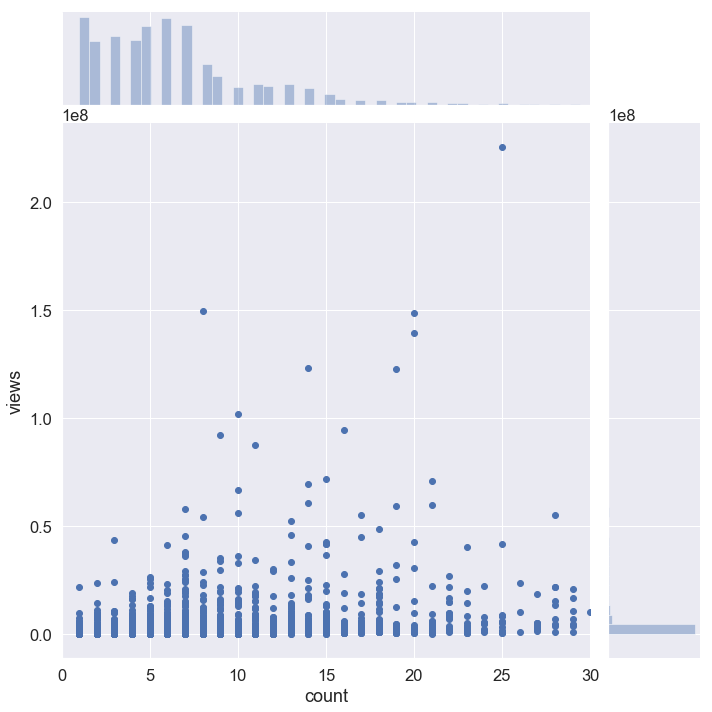

In [143]:
# Number of times selected for trend video 와 views 관계

plt.figure(figsize = (30, 20))
sns.jointplot(x = df_mer['count'], y = df_mer['views'], data = df_mer, kind = 'scatter', height = 10, xlim=(0,30))
plt.show()

<Figure size 2160x1440 with 0 Axes>

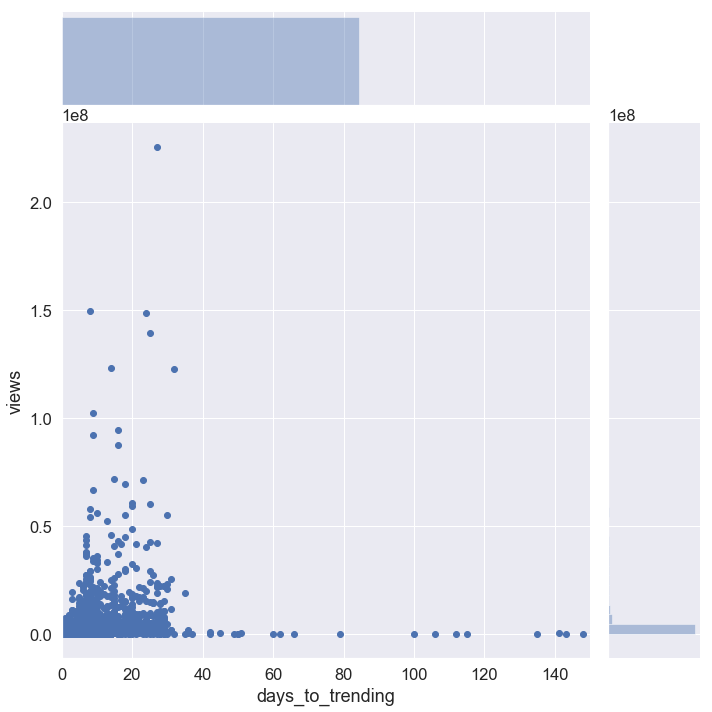

In [144]:
# days_to_trending 와 views 관계
plt.figure(figsize = (30, 20))
sns.jointplot(x = df_mer['days_to_trending'], y = df_mer['views'], data = df_mer, kind = 'scatter', height = 10, xlim=(0,150))
plt.show()

Number of times selected for trend video 와 views의 관계는 소수의 비디오는 상관성을 보이나 전체적으로는 관계가 적다.
트렌드 비디오가 되는데 걸리는 시간을 보면 대부분 경우는 30일 이전에 몰려있다. 트렌드를 반영하기 위해서 비디오의 신선함은 아주 중요하다.


In [145]:
# Video Level Stats Using first Occurence Values (by freq) 
video_f = tit.first()
video_f 

views  \
title                                                          
#184 Making a PCB using EasyEDA. // Review              3237   
#23 Feed The Homeless | One List, One Life             32385   
#57: AM and SSB explained                               3287   
#AboveTheNoise feat. Serena Williams, Neymar Jr...   2152261   
#DisneyParksLIVE: Fantasy In The Sky New Years ...    130416   
#DisneyParksLIVE: Super Bowl Celebration | Walt...     33968   
#EDGYTOKEI                                              4810   
#GuacWorld :60 | 2018 Big Game Commercial | Avo...     21278   
#HurtBae 2: One Year Later - Kourtney and Leona...    676024   
#LightTheWorld Christmas Concert with The Piano...    196922   
#MeToo Backlash | January 17, 2018 Act 1 | Full...    635686   
#PepsiHalftime Choreography BTS | Justin Timber...     17143   
#ProudToCreate: Pride 2018                            597669   
#StarOnFox Exclusive Clip for TheYBF.com                1975   
#VeteransDay: Thank You for Everything                812516   
#boogiedown CONTEST WINNERS ANNOUNCED                2437916   
$1 Bagel vs. $1,000 Bagel                            2249046   
$1,500 Rent: New York Vs. Houston                    1199071   
$10 Cheesesteak Vs. $120 Cheesesteak                 1761039   
$10 Vegan vs. $135 Vegan                             2215998   
$1000 PR Unboxing With Beauty Editor | Beauty W...     17372   
$1000 Survival Kit in a Case                         1289899   
$11.99 FOUNDATION VS. $40 FOUNDATION: Who Wins ???   1671069   
$120 McGriddle Taste Test | FANCY FAST FOOD           742310   
$14,000 GOLD bar vs 60,000 PSI Waterjet - with ...    283173   
$150 Bed Vs. $159,000 Bed                            1420770   
$17 Pet vs. $100,000 Pet                             1659538   
$2 Bacon Vs. $100 Bacon                              2789452   
$3 Fries Vs. $100 Fries                              3920011   
$3 date night with Julianna, clearly worth it         553637   
...                                                      ...   
kanye west / charlamagne interview                   3134765   
looking back                                          123811   
love                                                   85234   
mad eye moody - moving eyeball prop                     3390   
maybe i could eat blades of grass                     996318   
my wife telling me about her weird dream               35244   
notting-hill-movie-clip-last-brownie                   26185   
old dodge stratus commercial                            2860   
overprotective dog parent 2                           108294   
philbert's pet                                         51240   
ranking up your friendship                            646634   
ready player one                                      489367   
room tour 2018                                         69028   
singing the same song 6 years later..                2239777   
star wars || war pigs                                  50741   
tWitch Surprises a High School Senior for His Prom   1069358   
teens react to nothing.                              1768640   
the CASEY NEISTAT shoutout                             61837   
the life-changing magic of tidying up                 102110   
there's something we've been hiding from you.        1130965   
unboxing video                                        559257   
usa gymnastics + larry nassar | i am disgusted.       273354   
vegan eggs benedict *hunger warning*                  151631   
venting online about a hard part in a video game      394709   
washing dishes by hand is better than using a d...     73685   
we broke up                                         16884972   
what working tech support is REALLY like              109050   
will.i.am?s Mother Wouldn?t Let Him Be In Micha...    190694   
working a day at my first job (McDonalds)             169569   
20 IN PARIS vs $20 IN NY                              63544   

                      

In [146]:
# groupby 결과를 df 로 변환

v_f= pd.DataFrame(tit.first().reset_index())
v_f.head(5)

title    views  \
0         #184 Making a PCB using EasyEDA. // Review     3237   
1         #23 Feed The Homeless | One List, One Life    32385   
2                          #57: AM and SSB explained     3287   
3  #AboveTheNoise feat. Serena Williams, Neymar J...  2152261   
4  #DisneyParksLIVE: Fantasy In The Sky New Years...   130416   

   days_to_trending                  channel_title  \
0                 5                       MickMake   
1                 1            One List , One Life   
2                11  Radio Physics and Electronics   
3                 7                   Beats by Dre   
4                 5                   Disney Parks   

                                   thumbnail_link              category  
0  https://i.ytimg.com/vi/BPmgDhwbd1w/default.jpg  Science & Technology  
1  https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg        People & Blogs  
2  https://i.ytimg.com/vi/l7n58h-Zj3I/default.jpg  Science & Technology  
3  https://i.ytimg.com/vi/oWithLP0VlQ/default.jpg                 Music  
4  https://i.ytimg.com/vi/FQp6F0PjfpI/default.jpg         Entertainment

In [147]:
v_f[['views_f','days_to_trending_f']]= v_f[['views','days_to_trending']]

v_f= v_f[['title','views_f','category','days_to_trending_f']]
v_f.head(5)

title  views_f  \
0         #184 Making a PCB using EasyEDA. // Review     3237   
1         #23 Feed The Homeless | One List, One Life    32385   
2                          #57: AM and SSB explained     3287   
3  #AboveTheNoise feat. Serena Williams, Neymar J...  2152261   
4  #DisneyParksLIVE: Fantasy In The Sky New Years...   130416   

               category  days_to_trending_f  
0  Science & Technology                   5  
1        People & Blogs                   1  
2  Science & Technology                  11  
3                 Music                   7  
4         Entertainment                   5

In [148]:
df_mer= pd.merge(df_mer,v_f, how='left', on='title')
df_mer.head(5)

title    views  \
0         #184 Making a PCB using EasyEDA. // Review     3237   
1         #23 Feed The Homeless | One List, One Life    43012   
2                          #57: AM and SSB explained     3635   
3  #AboveTheNoise feat. Serena Williams, Neymar J...  2152261   
4  #DisneyParksLIVE: Fantasy In The Sky New Years...   140520   

   days_to_trending                  channel_title  \
0                 5                       MickMake   
1                 6            One List , One Life   
2                14  Radio Physics and Electronics   
3                 7                   Beats by Dre   
4                 8                   Disney Parks   

                                   thumbnail_link  count  views_f  \
0  https://i.ytimg.com/vi/BPmgDhwbd1w/default.jpg      1     3237   
1  https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg      6    32385   
2  https://i.ytimg.com/vi/l7n58h-Zj3I/default.jpg      4     3287   
3  https://i.ytimg.com/vi/oWithLP0VlQ/default.jpg      1  2152261   
4  https://i.ytimg.com/vi/FQp6F0PjfpI/default.jpg      4   130416   

               category  days_to_trending_f  
0  Science & Technology                   5  
1        People & Blogs                   1  
2  Science & Technology                  11  
3                 Music                   7  
4         Entertainment                   5

In [149]:
# 최신과 최초의 veiw 차이를 보자.
df_mer['views_ratio'] = round(df_mer['views'] / df_mer['views_f'],2)
df_mer['views_differ'] = round((df_mer['views'] - df_mer['views_f'])/df_mer['count'])

df_mer.head(10)

title    views  \
0         #184 Making a PCB using EasyEDA. // Review     3237   
1         #23 Feed The Homeless | One List, One Life    43012   
2                          #57: AM and SSB explained     3635   
3  #AboveTheNoise feat. Serena Williams, Neymar J...  2152261   
4  #DisneyParksLIVE: Fantasy In The Sky New Years...   140520   
5  #DisneyParksLIVE: Super Bowl Celebration | Wal...    41165   
6                                         #EDGYTOKEI     7977   
7  #GuacWorld :60 | 2018 Big Game Commercial | Av...  1843404   
8  #HurtBae 2: One Year Later - Kourtney and Leon...  1820485   
9  #LightTheWorld Christmas Concert with The Pian...   249897   

   days_to_trending                  channel_title  \
0                 5                       MickMake   
1                 6            One List , One Life   
2                14  Radio Physics and Electronics   
3                 7                   Beats by Dre   
4                 8                   Disney Parks   
5                 6                   Disney Parks   
6                 6           ekaggrat singh kalsi   
7                 6           Avocados From Mexico   
8                13                           Iris   
9                 7                   ThePianoGuys   

                                   thumbnail_link  count  views_f  \
0  https://i.ytimg.com/vi/BPmgDhwbd1w/default.jpg      1     3237   
1  https://i.ytimg.com/vi/4qakFfGRV4E/default.jpg      6    32385   
2  https://i.ytimg.com/vi/l7n58h-Zj3I/default.jpg      4     3287   
3  https://i.ytimg.com/vi/oWithLP0VlQ/default.jpg      1  2152261   
4  https://i.ytimg.com/vi/FQp6F0PjfpI/default.jpg      4   130416   
5  https://i.ytimg.com/vi/HhGJBBPVpqQ/default.jpg      4    33968   
6  https://i.ytimg.com/vi/k-Uw58mxLV4/default.jpg      2     4810   
7  https://i.ytimg.com/vi/ijVLdH5dt-c/default.jpg      4    21278   
8  https://i.ytimg.com/vi/gmp6AGFPhzY/default.jpg     11   676024   
9  https://i.ytimg.com/vi/t7Fa1GUf-LE/default.jpg      4   196922   

               category  days_to_trending_f  views_ratio  views_differ  
0  Science & Technology                   5         1.00          0.00  
1        People & Blogs                   1         1.33       1771.00  
2  Science & Technology                  11         1.11         87.00  
3                 Music                   7         1.00          0.00  
4         Entertainment                   5         1.08       2526.00  
5       Travel & Events                   3         1.21       1799.00  
6  Science & Technology                   5         1.66       1584.00  
7         Entertainment                   3        86.63     455532.00  
8         Entertainment                   3         2.69     104042.00  
9                 Music                   4         1.27      13244.00

In [150]:
df_mer.columns

Index(['title', 'views', 'days_to_trending', 'channel_title', 'thumbnail_link',
       'count', 'views_f', 'category', 'days_to_trending_f', 'views_ratio',
       'views_differ'],
      dtype='object')

In [151]:
from IPython.display import HTML, display

# First Occurrence of the 10 Frequect videos on list and first views count
tmp = df_mer.sort_values(by=['views'],ascending=False).head(10)
#
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Top 10 Videos with high views </h1><table>'

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th>'
table += '<th>treding count</th><th>Days to Trending</th><th>Views</th><th>views_ratio</th><th>views_differ</th>'
table += '</tr>'

max_title_length = 50

for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{count}</td>'.format(**row)
    table += '<td>{days_to_trending_f}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '<td>{views_ratio:3}</td>'.format(**row)
    table += '<td>{views_differ:11}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))

In [152]:
df_mer.sort_values(by=['views'],ascending=False).head(10).mean()

views                128363288.50
days_to_trending            18.00
count                       15.20
views_f               22135950.40
days_to_trending_f           1.60
views_ratio                 28.10
views_differ           7366880.20
dtype: float64

In [153]:
df_mer

title     views  \
0            #184 Making a PCB using EasyEDA. // Review      3237   
1            #23 Feed The Homeless | One List, One Life     43012   
2                             #57: AM and SSB explained      3635   
3     #AboveTheNoise feat. Serena Williams, Neymar J...   2152261   
4     #DisneyParksLIVE: Fantasy In The Sky New Years...    140520   
5     #DisneyParksLIVE: Super Bowl Celebration | Wal...     41165   
6                                            #EDGYTOKEI      7977   
7     #GuacWorld :60 | 2018 Big Game Commercial | Av...   1843404   
8     #HurtBae 2: One Year Later - Kourtney and Leon...   1820485   
9     #LightTheWorld Christmas Concert with The Pian...    249897   
10    #MeToo Backlash | January 17, 2018 Act 1 | Ful...   1357946   
11    #PepsiHalftime Choreography BTS | Justin Timbe...     91161   
12                           #ProudToCreate: Pride 2018   1329391   
13             #StarOnFox Exclusive Clip for TheYBF.com      2087   
14               #VeteransDay: Thank You for Everything    849499   
15                #boogiedown CONTEST WINNERS ANNOUNCED   4610501   
16                            $1 Bagel vs. $1,000 Bagel   4541899   
17                    $1,500 Rent: New York Vs. Houston   1687323   
18                 $10 Cheesesteak Vs. $120 Cheesesteak   4502927   
19                             $10 Vegan vs. $135 Vegan   4787793   
20    $1000 PR Unboxing With Beauty Editor | Beauty ...     24907   
21                         $1000 Survival Kit in a Case   1649128   
22    $11.99 FOUNDATION VS. $40 FOUNDATION: Who Wins...   1966994   
23          $120 McGriddle Taste Test | FANCY FAST FOOD   1259565   
24    $14,000 GOLD bar vs 60,000 PSI Waterjet - with...    322747   
25                            $150 Bed Vs. $159,000 Bed   2898292   
26                             $17 Pet vs. $100,000 Pet   5613561   
27                              $2 Bacon Vs. $100 Bacon   6037731   
28                              $3 Fries Vs. $100 Fries   8403143   
29        $3 date night with Julianna, clearly worth it    661502   
...                                                 ...       ...   
6421                 kanye west / charlamagne interview   8442986   
6422                                       looking back    141366   
6423                                               love    343756   
6424                mad eye moody - moving eyeball prop      3896   
6425                  maybe i could eat blades of grass   1578774   
6426           my wife telling me about her weird dream     61584   
6427               notting-hill-movie-clip-last-brownie     26243   
6428                       old dodge stratus commercial      3362   
6429                        overprotective dog parent 2    149005   
6430                                     philbert's pet    213433   
6431                         ranking up your friendship   1271958   
6432                                   ready player one   3180207   
6433                                     room tour 2018     92301   
6434              singing the same song 6 years later..   3564336   
6435                              star wars || war pigs    163440   
6436  tWitch Surprises a High School Senior for His ...   1650078   
6437                            teens react to nothing.   3695752   
6438                         the CASEY NEISTAT shoutout     72522   
6439              the life-changing magic of tidying up    212075   
6440      there's something we've been hiding from you.   2410536   
6441                                     unboxing video   2005054   
6442    usa gymnastics + larry nassar | i am disgusted.    495854   
6443               vegan eggs benedict *hunger warning*    244228   
6444   venting online about a hard part in a video game    643737   
6445  washing dishes by hand is better than using a ...     73902   
6446                                        we broke up  33627806   
6447           what working tech support is REAL

In [154]:
from IPython.display import HTML, display

# First Occurrence of the 10 Frequect videos on list and first views count
tmp = df_mer.sort_values(by=['count'],ascending=False).head(10)
#
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Top 10 Videos with often selected for trends</h1><table>'

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th>'
table += '<th>treding count</th><th>Days to Trending</th><th>Views</th><th>views_ratio</th><th>views_differ</th>'
table += '</tr>'

max_title_length = 50

for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{count}</td>'.format(**row)
    table += '<td>{days_to_trending_f}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '<td>{views_ratio:3}</td>'.format(**row)
    table += '<td>{views_differ:11}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))

In [155]:
df_mer.sort_values(by=['count'],ascending=False).head(10).mean()

views                9768568.10
days_to_trending          27.90
count                     28.90
views_f              1630233.20
days_to_trending_f         1.10
views_ratio                7.90
views_differ          282121.80
dtype: float64

In [156]:
from IPython.display import HTML, display

# First Occurrence of the 10 Frequect videos on list and first views count
tmp = df_mer.sort_values(by=['days_to_trending'],ascending=False).head(10)
#
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Top 10 video Remains in Long Trend Video</h1><table>'

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th>'
table += '<th>treding count</th><th>Days to Trending</th><th>Views</th><th>views_ratio</th><th>views_differ</th>'
table += '</tr>'

max_title_length = 50

for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{count}</td>'.format(**row)
    table += '<td>{days_to_trending_f}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '<td>{views_ratio:3}</td>'.format(**row)
    table += '<td>{views_differ:11}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))

In [157]:
df_mer.sort_values(by=['days_to_trending'],ascending=False).head(100).mean()

views                79155.76
days_to_trending      1297.60
count                    3.62
views_f              61819.59
days_to_trending_f    1294.80
views_ratio              1.39
views_differ          3261.27
dtype: float64

In [158]:
from IPython.display import HTML, display

# First Occurrence of the 10 Frequect videos on list and first views count
tmp = df_mer.sort_values(by=['views_ratio'],ascending=False).head(10)
#
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Top 10 most Rapidly Growing Videos</h1><table>'

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th>'
table += '<th>treding count</th><th>Days to Trending</th><th>Views</th><th>views_ratio</th><th>views_differ</th>'
table += '</tr>'

max_title_length = 50

for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{count}</td>'.format(**row)
    table += '<td>{days_to_trending_f}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '<td>{views_ratio:3}</td>'.format(**row)
    table += '<td>{views_differ:11}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))

In [159]:
df_mer.sort_values(by=['views_ratio'],ascending=False).head(100).mean()

views                8965492.50
days_to_trending           9.49
count                      9.38
views_f               326861.27
days_to_trending_f         0.78
views_ratio               37.57
views_differ          883562.51
dtype: float64

같은 비디오들의 유니크한 한값만 쓰기위해 title 이나 video_id로 그룹을 지어 최초(first)와 최신(last or max)로 두개의 테이블을 만들어 조인. days_to_trending은 최초 트렌드비디오가 된 기간을 사용하고 view는 최초와 최신의 비율을 보고 또,차이를 트렌드비디오가 된 횟수(count)로 나누어 간 간격간 평균차이를 보았다. 이 조건으로 view(얼마나 많이보는지), count(얼마나 빈번한지), days_to_trending(얼마나 오래 트렌드비디오로 남아있는지),views_ratio(얼마나 급격한게 성장했는지) 를 기준으로 sort하였다.

In [160]:
df_mer

title     views  \
0            #184 Making a PCB using EasyEDA. // Review      3237   
1            #23 Feed The Homeless | One List, One Life     43012   
2                             #57: AM and SSB explained      3635   
3     #AboveTheNoise feat. Serena Williams, Neymar J...   2152261   
4     #DisneyParksLIVE: Fantasy In The Sky New Years...    140520   
5     #DisneyParksLIVE: Super Bowl Celebration | Wal...     41165   
6                                            #EDGYTOKEI      7977   
7     #GuacWorld :60 | 2018 Big Game Commercial | Av...   1843404   
8     #HurtBae 2: One Year Later - Kourtney and Leon...   1820485   
9     #LightTheWorld Christmas Concert with The Pian...    249897   
10    #MeToo Backlash | January 17, 2018 Act 1 | Ful...   1357946   
11    #PepsiHalftime Choreography BTS | Justin Timbe...     91161   
12                           #ProudToCreate: Pride 2018   1329391   
13             #StarOnFox Exclusive Clip for TheYBF.com      2087   
14               #VeteransDay: Thank You for Everything    849499   
15                #boogiedown CONTEST WINNERS ANNOUNCED   4610501   
16                            $1 Bagel vs. $1,000 Bagel   4541899   
17                    $1,500 Rent: New York Vs. Houston   1687323   
18                 $10 Cheesesteak Vs. $120 Cheesesteak   4502927   
19                             $10 Vegan vs. $135 Vegan   4787793   
20    $1000 PR Unboxing With Beauty Editor | Beauty ...     24907   
21                         $1000 Survival Kit in a Case   1649128   
22    $11.99 FOUNDATION VS. $40 FOUNDATION: Who Wins...   1966994   
23          $120 McGriddle Taste Test | FANCY FAST FOOD   1259565   
24    $14,000 GOLD bar vs 60,000 PSI Waterjet - with...    322747   
25                            $150 Bed Vs. $159,000 Bed   2898292   
26                             $17 Pet vs. $100,000 Pet   5613561   
27                              $2 Bacon Vs. $100 Bacon   6037731   
28                              $3 Fries Vs. $100 Fries   8403143   
29        $3 date night with Julianna, clearly worth it    661502   
...                                                 ...       ...   
6421                 kanye west / charlamagne interview   8442986   
6422                                       looking back    141366   
6423                                               love    343756   
6424                mad eye moody - moving eyeball prop      3896   
6425                  maybe i could eat blades of grass   1578774   
6426           my wife telling me about her weird dream     61584   
6427               notting-hill-movie-clip-last-brownie     26243   
6428                       old dodge stratus commercial      3362   
6429                        overprotective dog parent 2    149005   
6430                                     philbert's pet    213433   
6431                         ranking up your friendship   1271958   
6432                                   ready player one   3180207   
6433                                     room tour 2018     92301   
6434              singing the same song 6 years later..   3564336   
6435                              star wars || war pigs    163440   
6436  tWitch Surprises a High School Senior for His ...   1650078   
6437                            teens react to nothing.   3695752   
6438                         the CASEY NEISTAT shoutout     72522   
6439              the life-changing magic of tidying up    212075   
6440      there's something we've been hiding from you.   2410536   
6441                                     unboxing video   2005054   
6442    usa gymnastics + larry nassar | i am disgusted.    495854   
6443               vegan eggs benedict *hunger warning*    244228   
6444   venting online about a hard part in a video game    643737   
6445  washing dishes by hand is better than using a ...     73902   
6446                                        we broke up  33627806   
6447           what working tech support is REAL

In [161]:
df_mer.groupby('category')[['count','views_ratio']].max()

count  views_ratio
category                                 
Autos & Vehicles          12        30.80
Comedy                    27        80.78
Education                 28         9.95
Entertainment             30       103.49
Film & Animation          29        56.86
Gaming                    26        35.84
Howto & Style             29        39.62
Music                     29       204.05
News & Politics           22        57.92
Nonprofits & Activism      9         3.32
People & Blogs            25       115.31
Pets & Animals            23        31.00
Science & Technology      29        73.02
Shows                     25         2.20
Sports                    23        76.51
Travel & Events           23        69.50

In [162]:
df_mer.groupby('category')[['count','views_ratio']].mean()

count  views_ratio
category                                 
Autos & Vehicles        5.19         3.34
Comedy                  6.30         2.29
Education               6.46         1.78
Entertainment           6.07         2.73
Film & Animation        7.30         3.07
Gaming                  7.86         2.34
Howto & Style           6.89         1.98
Music                   7.89         4.82
News & Politics         4.86         2.45
Nonprofits & Activism   3.80         1.63
People & Blogs          6.40         2.73
Pets & Animals          6.37         2.96
Science & Technology    6.15         2.33
Shows                  14.25         1.89
Sports                  4.80         1.96
Travel & Events         6.23         3.78

<Figure size 2160x1440 with 0 Axes>

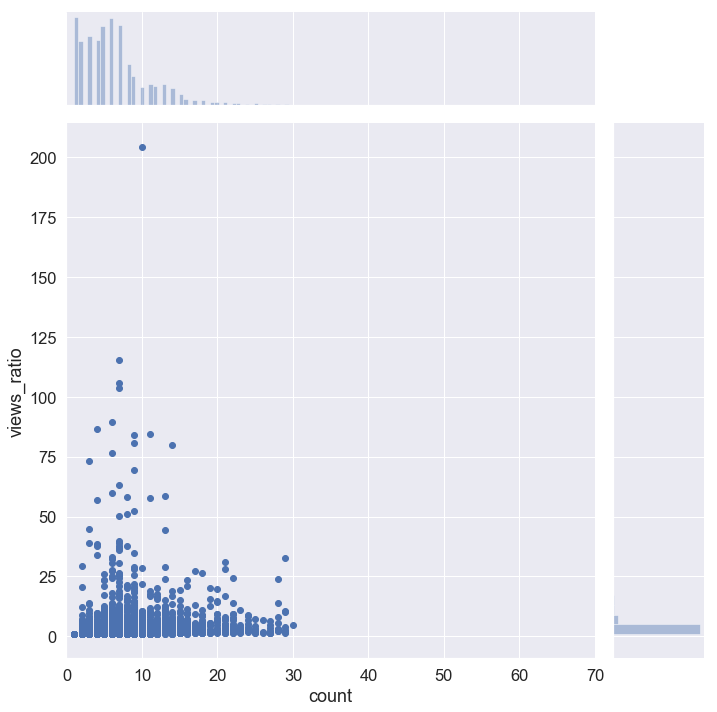

In [163]:
# view 의 성장속도와 트렌드 비디오 선정과의 관계.
plt.figure(figsize = (30, 20))
sns.jointplot(x = df_mer['count'], y = df_mer['views_ratio'], data = df, kind = 'scatter', height = 10, xlim=(0,70))
plt.show()

### Conclusion

Let me recap on what we’ve been walked through so far.

We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018. It contains 40949 video entry.

The number of videos and subscribers can be applied to evaluating the hotness and competitiveness. When it’s considered with topics, Entertainment and Music are the most popular.

The response rate can be thought in two ways. When it’s considered with the number of likes, dislikes, and comments, Gaming is the hottest topic with highly active users. In the view of the time period, the channels delivering latest issues like News & Politics and Sports get the quickest response.

Title phrasing is important and 6 to 7 words are appropriate to get more views.

When it comes to tagging, including keywords is more important than just having many tags. Therefore knowing what are the main issues are required.

To be a successful youtuber, having thousands of subscribers is obviously significant. However, making videos that contains what people really care about is as much important as the subscriber numbers. Therefore it is required to have the ability to read what are the trends and what kind of needs people are having.


For further analysis, we can choose one specific topic and work on subtopics. It will give us more detailed information. Time series analysis with a channel is also possible. Researching the growth pattern of popular channels can be a good example. This kind of research can be used not only for youtubers but also for digital marketers. If they go further analysis with comments, they can withdraw an insight on how to target their customers.

In [164]:
df

channel_title    n  \
trending_date video_id                                                   
2017-11-14    2kyS6SvSYSE                            CaseyNeistat   95   
              1ZAPwfrtAFY                         LastWeekTonight   24   
              5qpjK5DgCt4                            Rudy Mancuso   74   
              puqaWrEC7tY                   Good Mythical Morning  147   
              d380meD0W0M                                nigahiga   89   
              gHZ1Qz0KiKM                                iJustine   99   
              39idVpFF7NQ                     Saturday Night Live  175   
              nc99ccSXST0                      CrazyRussianHacker  115   
              jr9QtXwC9vc                        20th Century Fox  135   
              TUmyygCMMGA                                     Vox  193   
              9wRQljFNDW8                                     NFL  123   
              VifQlJit6A0                                     amc   23   
              5E4ZBSInqUU                              marshmello   12   
              GgVmn66oK_A                           NowThis World    5   
              TaTleo4cOs8                         The king of DIY   12   
              kgaO45SyaO4                          BostonDynamics   55   
              ZAQs-ctOqXQ                                 Cracked   26   
              YVfyYrEmzgM                                  TED-Ed  162   
              eNSN6qet1kE                             PeterSripol    6   
              B5HORANmzHw                                 SciShow  135   
              vU14JY3x81A                             Life Noggin  148   
              6VhU_T463sU                                  Tested   20   
              _-aDHxoblr4                               Tom Scott  159   
              JBZTZZAcFTw                              Refinery29   96   
              lZ68j2J_GOM                             Gus Johnson   68   
              dRpNZV18N_g                         HellthyJunkFood  153   
              fcVjitaM3LY                             Numberphile   49   
              qeWvgZLz9yU                      JerryRigEverything   43   
              iIxy3JN3-jc    Cleveland Cavaliers on cleveland.com    6   
              n30k5CwLhS4                          FaeryInLoveInc    4   
...                                                           ...  ...   
2018-06-14    vDyYMcjf500                       DidYouKnowGaming?   20   
              3Q2j5ApzSqs                           CAguileraVEVO   50   
              GfxNGjfSKRY                           BBCRadio1VEVO   46   
              amtC28yfYCM  The Tonight Show Starring Jimmy Fallon  197   
              9NC2saE5MbQ                        camelsandfriends   21   
              XdNOI-q70q4                             Matt Stonie   81   
              QgOXIEhHU1Y                                   Diplo   54   
              SQsPvrev_bQ                      Tyler, The Creator   22   
              _1LdMWlNYS4                                PBS Eons   54   
              AFbu21AGSho                            Nat Geo WILD   22   
              hHaUQh6Gx-Q                             MustardVEVO   20   
              wI89nVn6LHk                           American Idol   87   
              oLDbO545aKQ                            Rudy Mancuso   74   
              tiF9SzzzX_o                               The Voice  121   
              Gs26bZTRkdU                                 SciShow  135   
              Qcj15vHJTtk                     Saturday Night Live  175   
              2in8XqiElwc                        NickiMinajAtVEVO   40   
              Xr2rgT9uEnA                              miniminter   25   
              v7H_Or9Nr5I                        Lucas the Spider   72   
              n_W54baizX8                            Daddy Yankee   25   
              pcJo0tIWybY                                 SZAVEVO   41   
              _QWZvU7VCn8                  The Graham No

## Date modeling for Regression 

In [165]:
df.columns

Index(['channel_title', 'n', 'title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'description', 'channel_id',
       'subscribe', 'len_title', 'nword_title', 'n_tags', 'category',
       'publish_date', 'days_to_trending', 'like_percentage',
       'dislike_percentage', 'category_E'],
      dtype='object')

In [166]:
df_model= df[['n', 'subscribe', 'nword_title','n_tags','category_E','days_to_trending','views']]

In [167]:
# views와 상관성이 높은 comment를 제외하고 'len_title' ,'nword_title'도 상관성이 높으니 'nword_title'만 사용하기로 하자.

In [168]:
Label = df_model['views']
features = df_model[['n', 'subscribe','nword_title','n_tags','category_E','days_to_trending']]

In [169]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    features, Label, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("train 세트의 크기: {}   validate 세트의 크기: {}   test 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


# X_train, y_train  //  X_valid, y_valid  //  X_test, y_test

train 세트의 크기: 23020   validate 세트의 크기: 7674   test 세트의 크기: 10232



In [170]:
### 데이터 전처리 - 데이터 표준화 작업 (scaling)
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
transformer = sc.fit(X_train)
transformer


RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [171]:
#위에서 training set으로 fit 시킨 평균,분산 값을 이용하여 각 세트의 독립변수(X)들을 변환시킨다. 
X_train_std=transformer.transform(X_train)
X_valid_std=transformer.transform(X_valid)
X_test_std=transformer.transform(X_test)



### Model 
(이번 모델의 목적은 view에 가장 큰 영향을 끼치는 요인을 찾고 새로운 동영상의 미래 잠재 view을 예측하는것이다)

In [172]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_std, y_train)

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [173]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_valid_std, y_valid)))

훈련 세트 정확도: 0.979
테스트 세트 정확도: 0.915


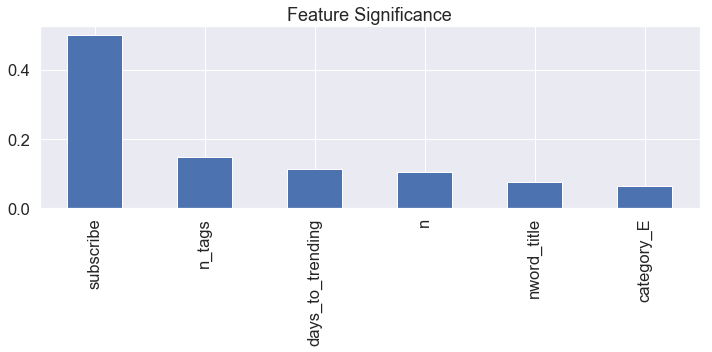

In [174]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(forest.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=42)
gbrt.fit(X_train_std, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_valid_std, y_valid)))

훈련 세트 정확도: 0.574
테스트 세트 정확도: 0.524


In [176]:
gbrt = GradientBoostingRegressor(random_state=42, learning_rate=0.3,max_depth=3)
gbrt.fit(X_train_std, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_valid_std, y_valid)))

훈련 세트 정확도: 0.804
테스트 세트 정확도: 0.727


In [177]:
gbrt = GradientBoostingRegressor(random_state=42, learning_rate=0.2)
gbrt.fit(X_train_std, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_valid_std, y_valid)))


훈련 세트 정확도: 0.734
테스트 세트 정확도: 0.665


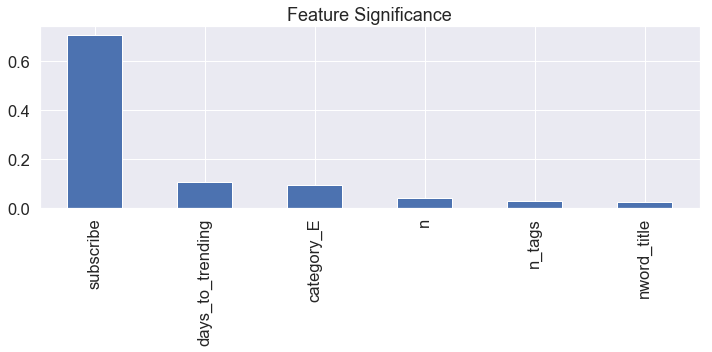

In [178]:
gbrt = GradientBoostingRegressor(random_state=42, learning_rate=0.3,max_depth=3) #best model 선택
gbrt.fit(X_train_std, y_train)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(gbrt.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [179]:
# 최종 테스트 (위에서 가장 성능좋은것 실행후 하자 이름이 모두 gbrt로 같기 때문.)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test_std, y_test)))

훈련 세트 정확도: 0.804
테스트 세트 정확도: 0.744


In [180]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test_std, y_test)))

훈련 세트 정확도: 0.979
테스트 세트 정확도: 0.920


Variable: subscribe            Importance: 0.5
Variable: n_tags               Importance: 0.15
Variable: days_to_trending     Importance: 0.11
Variable: n                    Importance: 0.1
Variable: nword_title          Importance: 0.07
Variable: category_E           Importance: 0.06


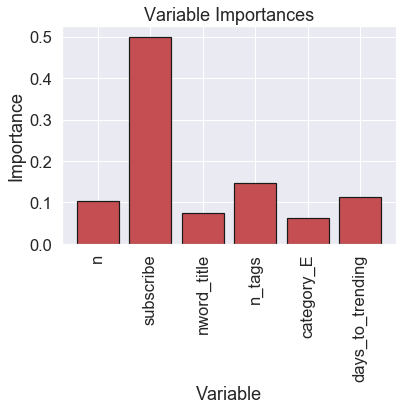

In [181]:
# Get numerical feature importances

feature_list = list(X_train.columns)
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

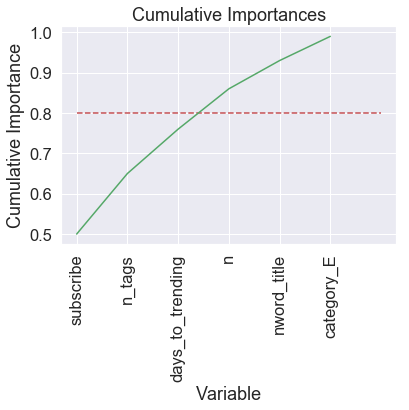

In [182]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 80% of importance retained
plt.hlines(y = 0.80, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

주요변수 3개가 model 75%를 설명하는 것을 볼수있다
주요 변수를 바탕으로 views 에 끼치는 영향을 본다

In [183]:
df.columns

Index(['channel_title', 'n', 'title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'description', 'channel_id',
       'subscribe', 'len_title', 'nword_title', 'n_tags', 'category',
       'publish_date', 'days_to_trending', 'like_percentage',
       'dislike_percentage', 'category_E'],
      dtype='object')

In [184]:
df_p=df[['subscribe','n_tags','days_to_trending','views']]
df_p.head()

subscribe  n_tags  days_to_trending    views
trending_date video_id                                                 
2017-11-14    2kyS6SvSYSE   10460409       1                 1   748374
              1ZAPwfrtAFY    6505413       4                 1  2418783
              5qpjK5DgCt4    5487024      22                 2  3191434
              puqaWrEC7tY   14395362      27                 1   343168
              d380meD0W0M   21284569      14                 2  2095731

In [185]:
df_p.groupby(df_p.views).mean()


subscribe  n_tags  days_to_trending
views                                          
549          95288.00   11.00              3.00
554          95288.00   11.00              4.00
559          95288.00   11.00              5.00
658           1908.00    1.00             17.00
687          42846.00   10.00              3.00
704          42846.00   10.00              4.00
713           1908.00    1.00             18.00
745           1908.00    1.00             19.00
748         915562.00   31.00              2.00
773           3421.00    2.00            228.00
789            218.00   15.00             59.00
798              0.00   36.00              0.00
810         915562.00   12.00              3.00
820         915562.00   12.00              4.00
835         915562.00   12.00              5.00
884              5.00   18.00              2.00
917            218.00   15.00             60.00
920           4984.00   24.00              3.00
934              5.00   18.00              3.00
943            195.00    4.00            146.00
945            497.00    1.00              1.00
967              5.00   18.00              4.00
983        2085551.00    5.00              3.00
987             13.00    1.00             59.00
988              5.00   18.00              5.00
999           4984.00   24.00              4.00
1028           195.00    4.00            147.00
1032          4984.00   24.00              5.00
1073       2085551.00    5.00              4.00
1082           195.00    4.00            148.00
...               ...     ...               ...
115664850 17878831.00    9.00             12.00
116581406  1783503.00    4.00              9.00
117735467 19157020.00   10.00             18.00
121219886 17878840.00    9.00             13.00
122544931 11366250.00    6.00             32.00
122581156 19157020.00   10.00             19.00
123010920 17878845.00    9.00             14.00
125432237 27144791.00   37.00              6.00
126191952  1783503.00    4.00             10.00
134839555  1783503.00    4.00             11.00
137843120 27144791.00   37.00              7.00
139334502  6675297.00   22.00             25.00
142421830  1783503.00    4.00             12.00
148689896 19157020.00   10.00             24.00
149376127 27144791.00   37.00              8.00
149830680  1783503.00    4.00             13.00
156612892  1783503.00    4.00             14.00
162556776  1783503.00    4.00             15.00
167997997  1783503.00    4.00             16.00
173478072  1783503.00    4.00             17.00
179045286  1783503.00    4.00             18.00
184446490  1783503.00    4.00             19.00
190950401  1783503.00    4.00             20.00
196222618  1783503.00    4.00             21.00
200820941  1783503.00    4.00             22.00
205643016  1783503.00    4.00             23.00
210338856  1783503.00    4.00             24.00
217750076  1783503.00    4.00             25.00
220490543  1783503.00    4.00             26.00
225211923  1783503.00    4.00             27.00

[40478 rows x 3 columns]

In [186]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [187]:
# X_train_std, y_train

X = sm.add_constant(X_train_std) # adding a constant
Y= y_train

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     330.0
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:32:48   Log-Likelihood:            -3.9502e+05
No. Observations:               23020   AIC:                         7.901e+05
Df Residuals:                   23013   BIC:                         7.901e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.139e+06   5.01e+04     42.662      0.0

In [188]:
X_train.head()

n  subscribe  nword_title  n_tags  category_E  \
trending_date video_id                                                       
2017-12-05    DQQN_79QrDY   36    2093159            6      33       12.00   
2018-02-23    YBpdL9hSac4   40    1660340            5      22       15.00   
2017-11-23    lJM8qqEy35c    8     860500            8       3        1.00   
2018-05-04    SXkxheJ1dQ0   56    6147550            8      17        6.00   
2018-01-15    sBC9r4HuKu0  203    4080401           19      30       11.00   

                           days_to_trending  
trending_date video_id                       
2017-12-05    DQQN_79QrDY                 3  
2018-02-23    YBpdL9hSac4                 8  
2017-11-23    lJM8qqEy35c                 1  
2018-05-04    SXkxheJ1dQ0                11  
2018-01-15    sBC9r4HuKu0                 5

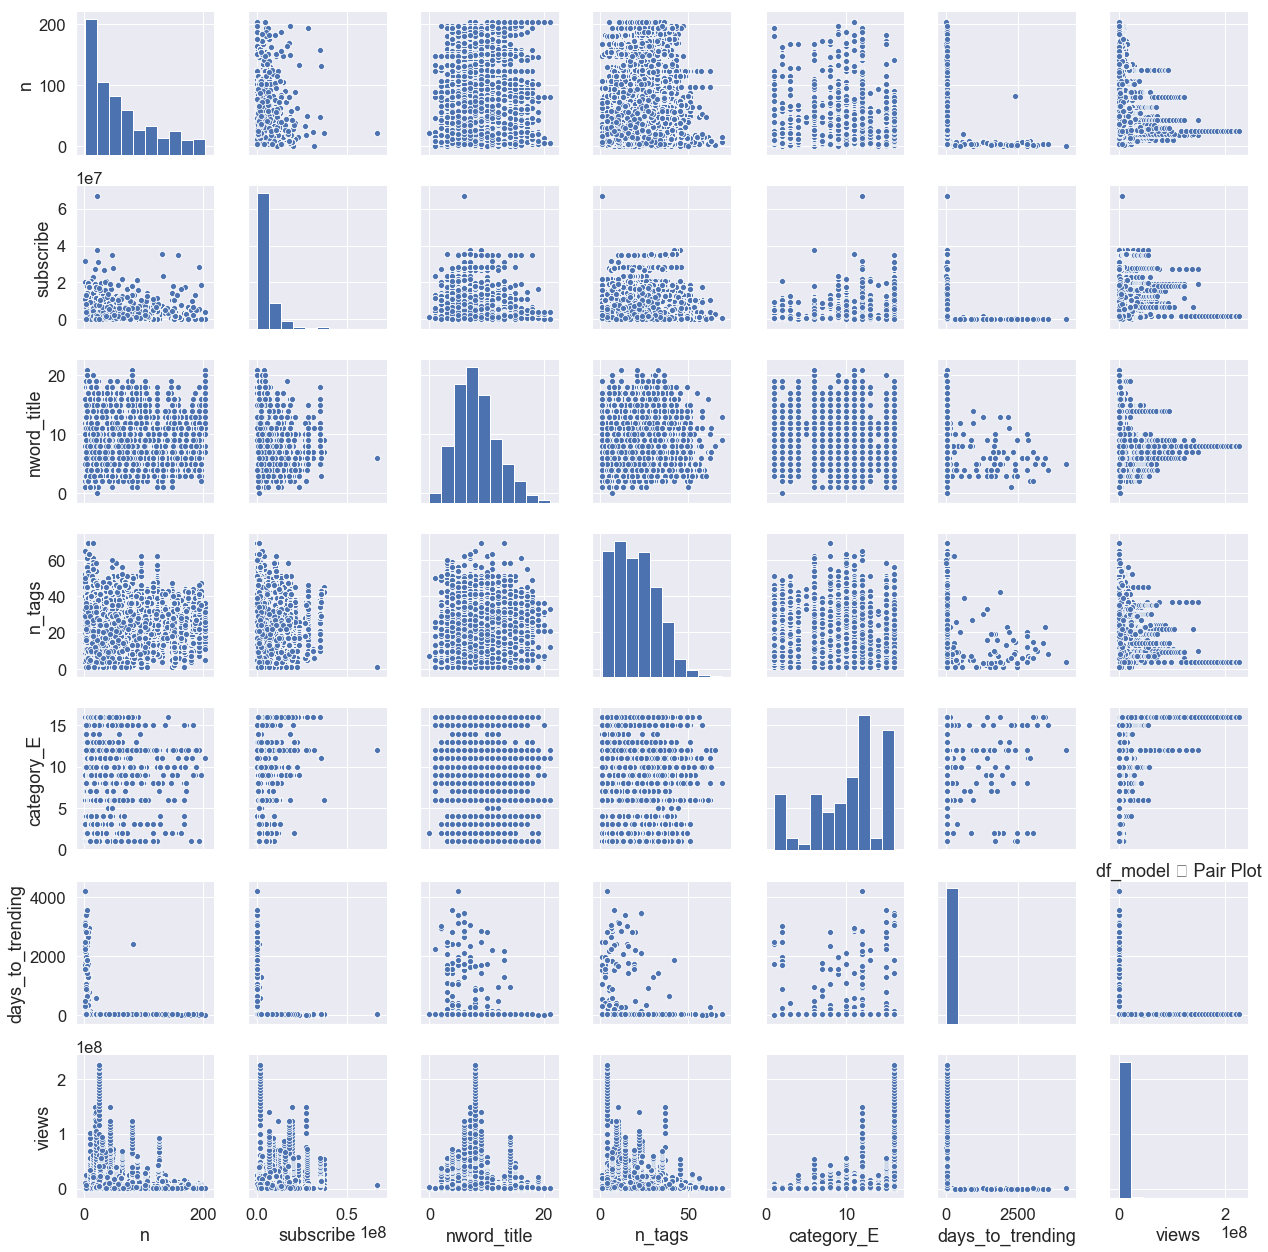

In [189]:
#_=sns.pairplot(df_model)
sns.pairplot(df_model)
plt.title("df_model 의 Pair Plot")
plt.show()

## 데이터 분포를 변환시켜서 다시 분석.

### 데이터 분포 변환
대부분의 모델은 변수가 특정 분포를 따른다는 가정을 기반으로 한다. 예를 들어 선형 모델의 경우, 설명 및 종속변수 모두가 정규분포와 유사할 경우 성능이 높아지는 것으로 알려져 있다. 자주 쓰이는 방법은 Log, Exp, Sqrt 등 함수를 이용해 데이터 분포를 변환하는 것이다. 

밑에 방법 외에도 분포의 특성에 따라 제곱, 자연로그, 지수 등 다양한 함수가 사용될 수 있다. 가이드는 아래와 같다.

left_distribution: X^3
mild_left: X^2
mild_right: sqrt(X)
right: ln(X)
servere right: 1/X

In [190]:
df_model= df[['n', 'subscribe', 'nword_title','n_tags','category_E','days_to_trending','views']]

In [191]:
import math
from sklearn import preprocessing

# 특정 변수에만 함수 적용
# df['X_log'] = preprocessing.scale(np.log(df['X']+1)) # 로그
# df['X_sqrt'] = preprocessing.scale(np.sqrt(df['X']+1)) # 제곱근

# # 데이터 프레임 전체에 함수 적용 (단, 숫자형 변수만 있어야 함)
# df_log = df_model.apply(lambda x: np.log(x+1))    

df_model['subscribe_log']= preprocessing.scale(np.log(df_model['subscribe']+1))
df_model['days_to_trending_log']= preprocessing.scale(np.log(df_model['days_to_trending']+1))
df_model['views_log']= preprocessing.scale(np.log(df_model['views']+1))

In [192]:
df_model.drop('views',axis=1,inplace=True)
df_model.drop('subscribe',axis=1,inplace=True)
df_model.drop('days_to_trending',axis=1,inplace=True)

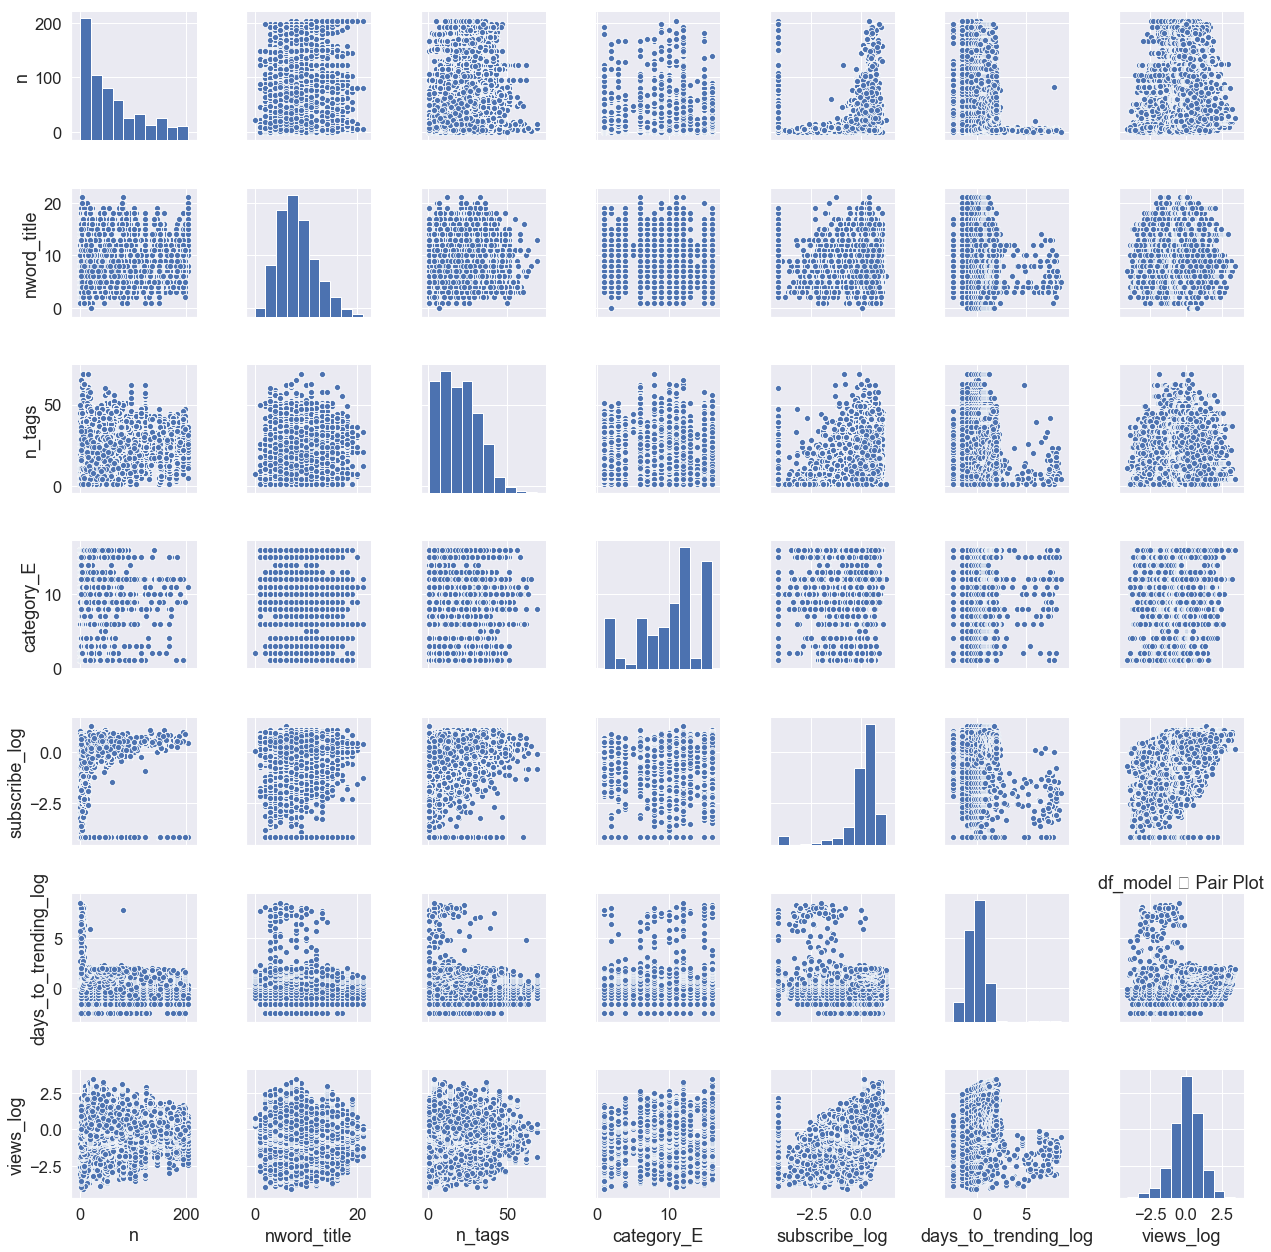

In [193]:
#_=sns.pairplot(df_model)
# views, subscribe 변수를 로그전환 하였다
sns.pairplot(df_model)
plt.title("df_model 의 Pair Plot")
plt.show()

### 데이터 단위 변환
데이터의 스케일(측정단위)이 다를 경우 특히 거리를 기반으로 분류하는 모델(KNN 등)에 부정적인 영향을 미치므로, 스케일링을 통해 단위를 일정하게 맞추는 작업을 진행해야 한다. 아래 방식이 주로 스케일링을 위해 쓰이는 방법이다. 대부분의 통계 분석 방법이 정규성 가정을 기반으로 하므로 완벽하지 않더라도 최대한 정규분포로 변환하는 노력이 필요하다.

Scaling: 평균이 0, 분산이 1인 분포로 변환
MinMax Scaling: 특정 범위 (예, 0~1)로 모든 데이터를 변환
Box-Cox: 여러 k 값중 가장 작은 SSE 선택
Robust_scale: median, interquartile range 사용(outlier 영향 최소화)

In [194]:
# from scipy.stats import boxcox

# # 변수별 scaling 적용
# df['X_scale'] = preprocessing.scale(df['X']) 
# df['X_minmax_scale'] = preprocessing.MinMaxScaler(df['X']
# df['X_boxcox'] = preprocessing.scale(boxcox(df['X']+1)[0])
# df['X_robust_scale'] = preprocessing.robust_scale(df['X'])

# # 데이터 프레임 전체에 scaling 적용
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# # StandardScaler
# for c in df:
#     df_sc[c] = StandardScaler().fit_transform(df[c].reshape(-1,1)).round(4)

# # MinMaxScaler
# for c in df:
#     df_minmax[c] = MinMaxScaler().fit_transform(df[c].reshape(-1,1).round(4))


In [195]:
Label = df_model['views_log']
features = df_model[['n', 'subscribe_log','nword_title','n_tags','category_E','days_to_trending_log']]

In [196]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    features, Label, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("train 세트의 크기: {}   validate 세트의 크기: {}   test 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


# X_train, y_train  //  X_valid, y_valid  //  X_test, y_test

train 세트의 크기: 23020   validate 세트의 크기: 7674   test 세트의 크기: 10232



In [197]:
### 데이터 전처리 - 데이터 표준화 작업 (scaling)
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
transformer = sc.fit(X_train)
transformer


RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [198]:
#위에서 training set으로 fit 시킨 평균,분산 값을 이용하여 각 세트의 독립변수(X)들을 변환시킨다. 
X_train_std=transformer.transform(X_train)
X_valid_std=transformer.transform(X_valid)
X_test_std=transformer.transform(X_test)


In [199]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_std, y_train)

C:\Users\dojin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [200]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_valid_std, y_valid)))

훈련 세트 정확도: 0.968
테스트 세트 정확도: 0.833


In [201]:
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train_std, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test_std, y_test)))

훈련 세트 정확도: 0.968
테스트 세트 정확도: 0.836


Variable: subscribe_log        Importance: 0.4
Variable: n                    Importance: 0.16
Variable: days_to_trending_log Importance: 0.14
Variable: n_tags               Importance: 0.11
Variable: category_E           Importance: 0.1
Variable: nword_title          Importance: 0.08


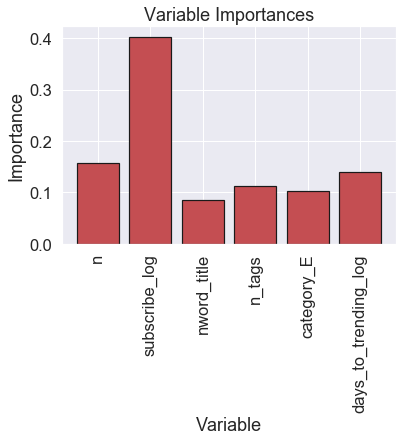

In [202]:
# Get numerical feature importances

feature_list = list(X_train.columns)
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

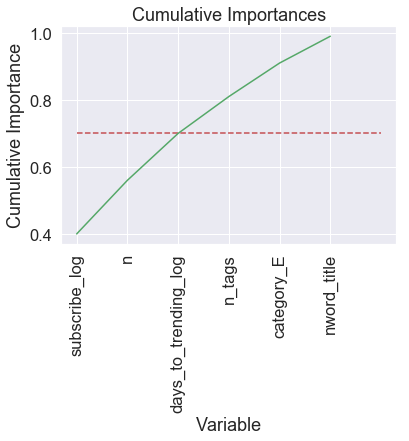

In [203]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 70% of importance retained
plt.hlines(y = 0.70, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

주요변수 3개가 model 70%를 설명하는 것을 볼수있다 주요 변수를 바탕으로 views 에 끼치는 영향을 본다

In [204]:
df_p=df[['subscribe','n','days_to_trending','views']]
df_p.head()

subscribe    n  days_to_trending    views
trending_date video_id                                              
2017-11-14    2kyS6SvSYSE   10460409   95                 1   748374
              1ZAPwfrtAFY    6505413   24                 1  2418783
              5qpjK5DgCt4    5487024   74                 2  3191434
              puqaWrEC7tY   14395362  147                 1   343168
              d380meD0W0M   21284569   89                 2  2095731

In [205]:
df_p.groupby(df_p.views).mean()

subscribe     n  days_to_trending
views                                        
549          95288.00  6.00              3.00
554          95288.00  6.00              4.00
559          95288.00  6.00              5.00
658           1908.00  3.00             17.00
687          42846.00  2.00              3.00
704          42846.00  2.00              4.00
713           1908.00  3.00             18.00
745           1908.00  3.00             19.00
748         915562.00 39.00              2.00
773           3421.00  1.00            228.00
789            218.00  2.00             59.00
798              0.00 10.00              0.00
810         915562.00 39.00              3.00
820         915562.00 39.00              4.00
835         915562.00 39.00              5.00
884              5.00  4.00              2.00
917            218.00  2.00             60.00
920           4984.00  3.00              3.00
934              5.00  4.00              3.00
943            195.00  3.00            146.00
945            497.00  5.00              1.00
967              5.00  4.00              4.00
983        2085551.00 13.00              3.00
987             13.00  4.00             59.00
988              5.00  4.00              5.00
999           4984.00  3.00              4.00
1028           195.00  3.00            147.00
1032          4984.00  3.00              5.00
1073       2085551.00 13.00              4.00
1082           195.00  3.00            148.00
...               ...   ...               ...
115664850 17878831.00 80.00             12.00
116581406  1783503.00 25.00              9.00
117735467 19157020.00 43.00             18.00
121219886 17878840.00 80.00             13.00
122544931 11366250.00 19.00             32.00
122581156 19157020.00 43.00             19.00
123010920 17878845.00 80.00             14.00
125432237 27144791.00 18.00              6.00
126191952  1783503.00 25.00             10.00
134839555  1783503.00 25.00             11.00
137843120 27144791.00 18.00              7.00
139334502  6675297.00 20.00             25.00
142421830  1783503.00 25.00             12.00
148689896 19157020.00 43.00             24.00
149376127 27144791.00 18.00              8.00
149830680  1783503.00 25.00             13.00
156612892  1783503.00 25.00             14.00
162556776  1783503.00 25.00             15.00
167997997  1783503.00 25.00             16.00
173478072  1783503.00 25.00             17.00
179045286  1783503.00 25.00             18.00
184446490  1783503.00 25.00             19.00
190950401  1783503.00 25.00             20.00
196222618  1783503.00 25.00             21.00
200820941  1783503.00 25.00             22.00
205643016  1783503.00 25.00             23.00
210338856  1783503.00 25.00             24.00
217750076  1783503.00 25.00             25.00
220490543  1783503.00 25.00             26.00
225211923  1783503.00 25.00             27.00

[40478 rows x 3 columns]

In [206]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# X_train_std, y_train

X = sm.add_constant(X_train_std) # adding a constant
Y= y_train

model = sm.OLS(Y, X).fit()

predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              views_log   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     1227.
Date:                Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:33:32   Log-Likelihood:                -29429.
No. Observations:               23020   AIC:                         5.887e+04
Df Residuals:                   23013   BIC:                         5.893e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.007     12.477      0.0

In [207]:
X_train.head()

n  subscribe_log  nword_title  n_tags  \
trending_date video_id                                               
2017-12-05    DQQN_79QrDY   36           0.23            6      33   
2018-02-23    YBpdL9hSac4   40           0.16            5      22   
2017-11-23    lJM8qqEy35c    8          -0.04            8       3   
2018-05-04    SXkxheJ1dQ0   56           0.55            8      17   
2018-01-15    sBC9r4HuKu0  203           0.43           19      30   

                           category_E  days_to_trending_log  
trending_date video_id                                       
2017-12-05    DQQN_79QrDY       12.00                 -0.65  
2018-02-23    YBpdL9hSac4       15.00                  0.43  
2017-11-23    lJM8qqEy35c        1.00                 -1.57  
2018-05-04    SXkxheJ1dQ0        6.00                  0.81  
2018-01-15    sBC9r4HuKu0       11.00                 -0.11